#### Exploratory Data Analysis

In [63]:
data <- read.csv(file="HistoryDataforforecast.csv", header=TRUE, sep=",")

In [75]:
head(data)

Rental_Division_Id,Brand,Date,Forecast_Segment,Transactions,Time_And_Mileage,Rental_Days,LOR,RPD,date
8001,AVIS,01/04/2013,ASSOCIATIONS,74466,13085559,354707,4.763339,36.89120,2013-01-04
8001,AVIS,01/04/2013,BUSINESS OTHER,33988,6499712,156560,4.606328,41.51582,2013-01-04
8001,AVIS,01/04/2013,DAILY UNAFFILIATED,44160,5423394,75564,1.711152,71.77174,2013-01-04
8001,AVIS,01/04/2013,GOVERNMENT,11529,2314296,71061,6.163712,32.56753,2013-01-04
8001,AVIS,01/04/2013,INBOUND LEISURE,53042,14410061,327216,6.169001,44.03836,2013-01-04
8001,AVIS,01/04/2013,LARGE COMMERCIAL,387785,52695371,1303158,3.360515,40.43669,2013-01-04


In [76]:
head(timeseriesdata)

Rental_Division_Id,Brand,Date,Forecast_Segment,Transactions,Time_And_Mileage,Rental_Days,LOR,RPD
8001,AVIS,NA,ASSOCIATIONS,74466,13085559,354707,4.763339,36.89120
8001,AVIS,NA,BUSINESS OTHER,33988,6499712,156560,4.606328,41.51582
8001,AVIS,NA,DAILY UNAFFILIATED,44160,5423394,75564,1.711152,71.77174
8001,AVIS,NA,GOVERNMENT,11529,2314296,71061,6.163712,32.56753
8001,AVIS,NA,INBOUND LEISURE,53042,14410061,327216,6.169001,44.03836
8001,AVIS,NA,LARGE COMMERCIAL,387785,52695371,1303158,3.360515,40.43669


In [4]:
sapply(timeseriesdata, class)

Rental_Division_Id              Brand               Date   Forecast_Segment 
         "integer"           "factor"             "Date"           "factor" 
      Transactions   Time_And_Mileage        Rental_Days                LOR 
         "integer"          "integer"          "integer"          "numeric" 
               RPD 
         "numeric"

In [5]:
library(dplyr,warn.conflicts = FALSE)
library(rpart,warn.conflicts = FALSE)
library(ggplot2,warn.conflicts = FALSE)

In [6]:
year1_data <- subset(timeseriesdata, Date < "2014-12-31")

In [7]:
nrow(year1_data)

[1] 525

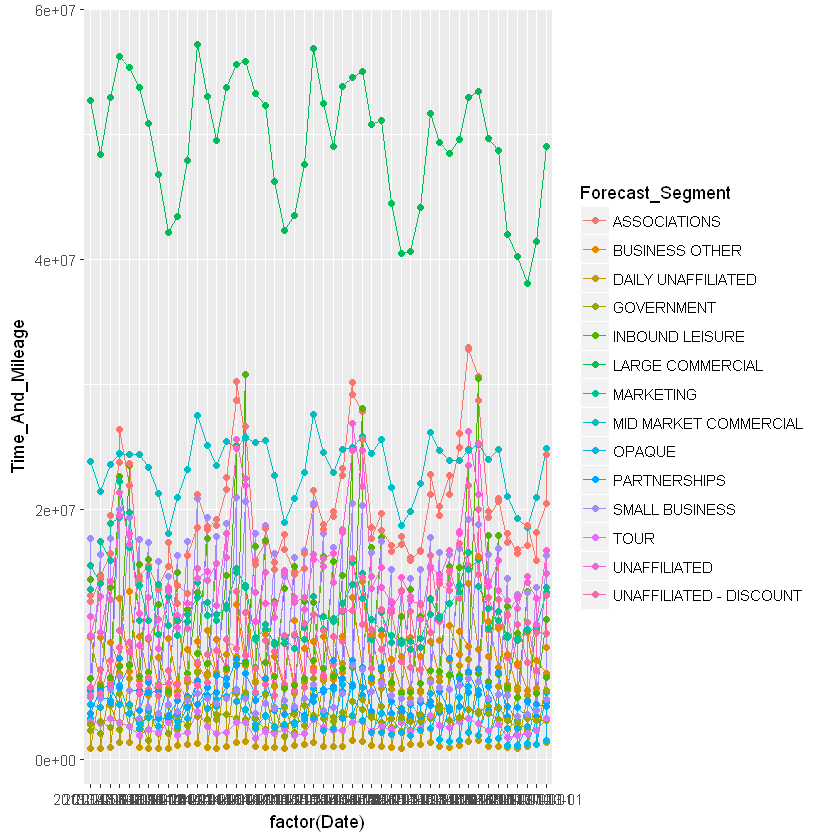

In [8]:
ggplot(data = timeseriesdata, aes(x = factor(Date), y = Time_And_Mileage, color = Forecast_Segment)) +       
  geom_line(aes(group = Forecast_Segment)) + geom_point()

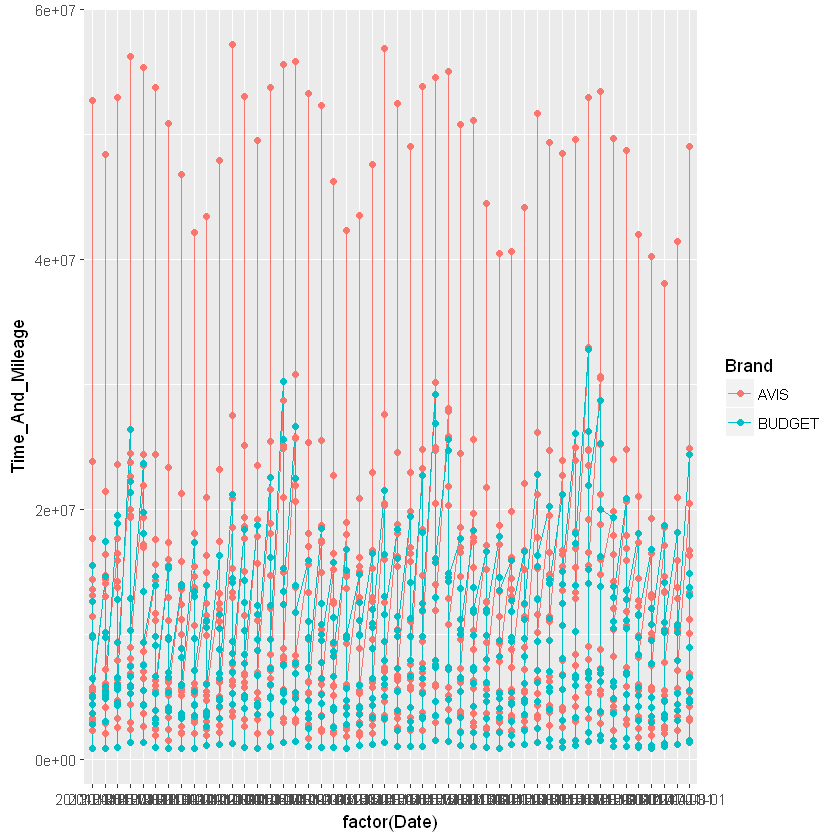

In [9]:
ggplot(data = timeseriesdata, aes(x = factor(Date), y = Time_And_Mileage, color = Brand)) +       
  geom_line(aes(group = Brand)) + geom_point()

In [10]:
colnames <- colnames(timeseriesdata)
class(colnames)

[1] "character"

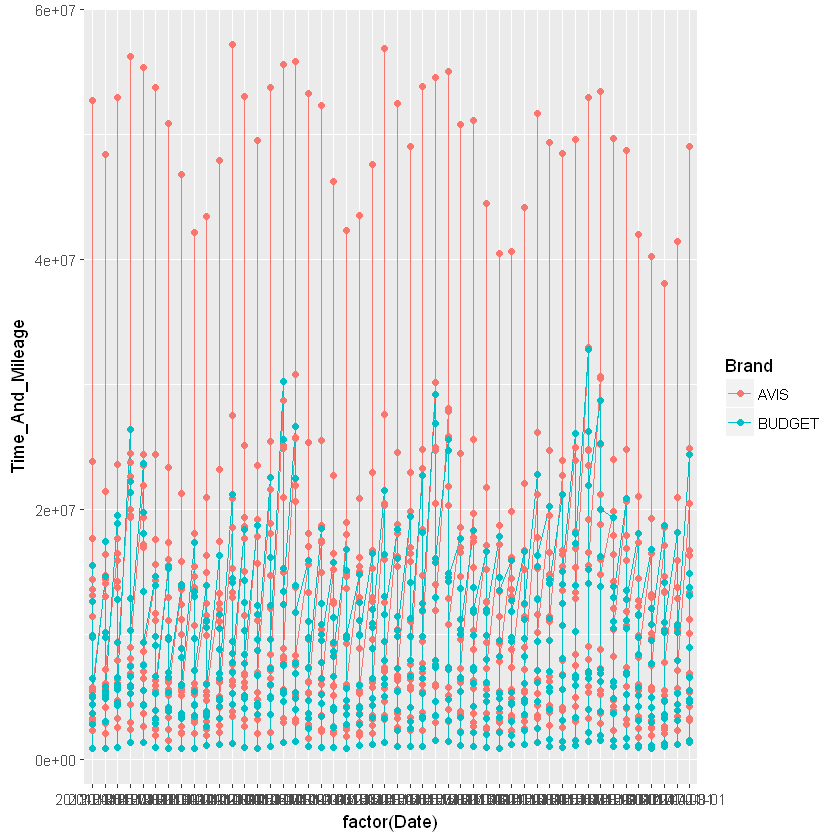

In [11]:
ggplot(data = timeseriesdata, aes(x = factor(Date), y = Time_And_Mileage, color = Brand)) +       
  geom_line(aes(group = Brand)) + geom_point()

In [12]:
summary(timeseriesdata)

 Rental_Division_Id    Brand          Date           
 Min.   :8001       AVIS  :672   Min.   :2013-04-01  
 1st Qu.:8001       BUDGET:528   1st Qu.:2014-03-24  
 Median :8001                    Median :2015-03-16  
 Mean   :8001                    Mean   :2015-03-17  
 3rd Qu.:8001                    3rd Qu.:2016-03-08  
 Max.   :8001                    Max.   :2017-03-01  
                                                     
           Forecast_Segment  Transactions    Time_And_Mileage  
 ASSOCIATIONS      : 96     Min.   :   938   Min.   :  827350  
 BUSINESS OTHER    : 96     1st Qu.: 28957   1st Qu.: 4407612  
 DAILY UNAFFILIATED: 96     Median : 45802   Median : 7793710  
 GOVERNMENT        : 96     Mean   : 64278   Mean   :11276339  
 INBOUND LEISURE   : 96     3rd Qu.: 72791   3rd Qu.:15037434  
 MARKETING         : 96     Max.   :413425   Max.   :57218989  
 (Other)           :624                                        
  Rental_Days           LOR              RPD       
 Min

In [14]:
avis_data <- data[data$Brand == 'AVIS',]

In [15]:
bgt_data <- data[data$Brand == 'BUDGET',]

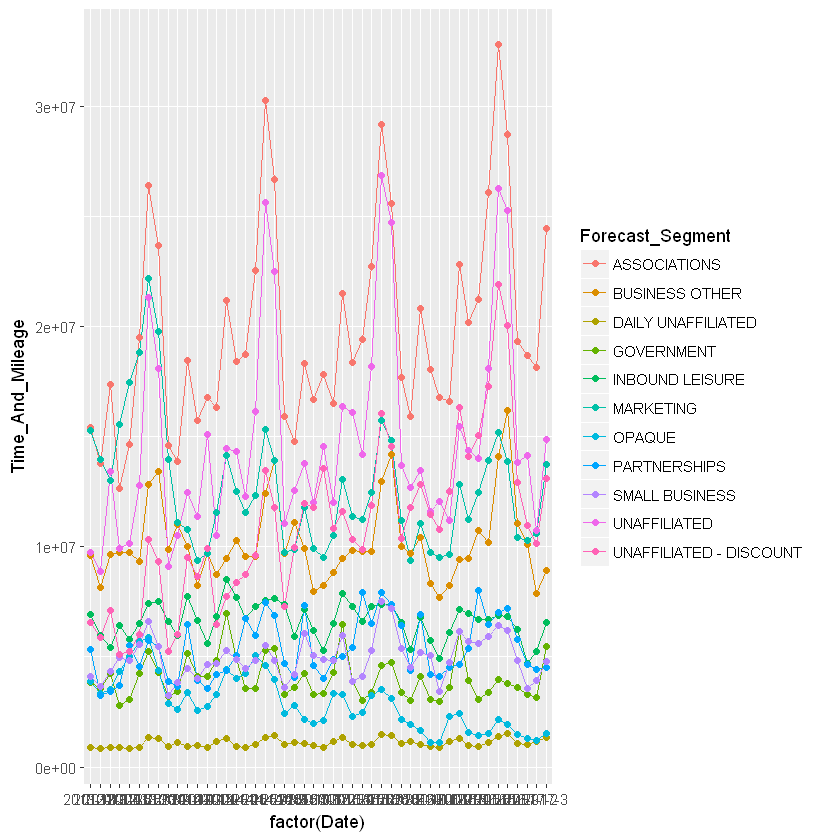

In [16]:
ggplot(data = bgt_data, aes(x = factor(Date), y = Time_And_Mileage, color =Forecast_Segment )) +       
  geom_line(aes(group = Forecast_Segment)) + geom_point()

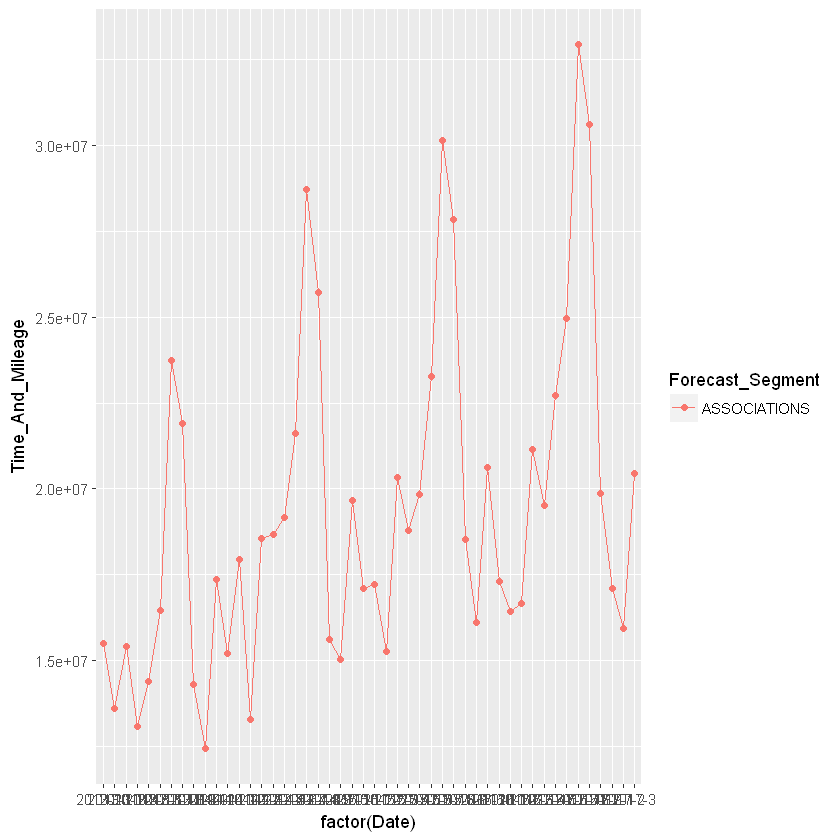

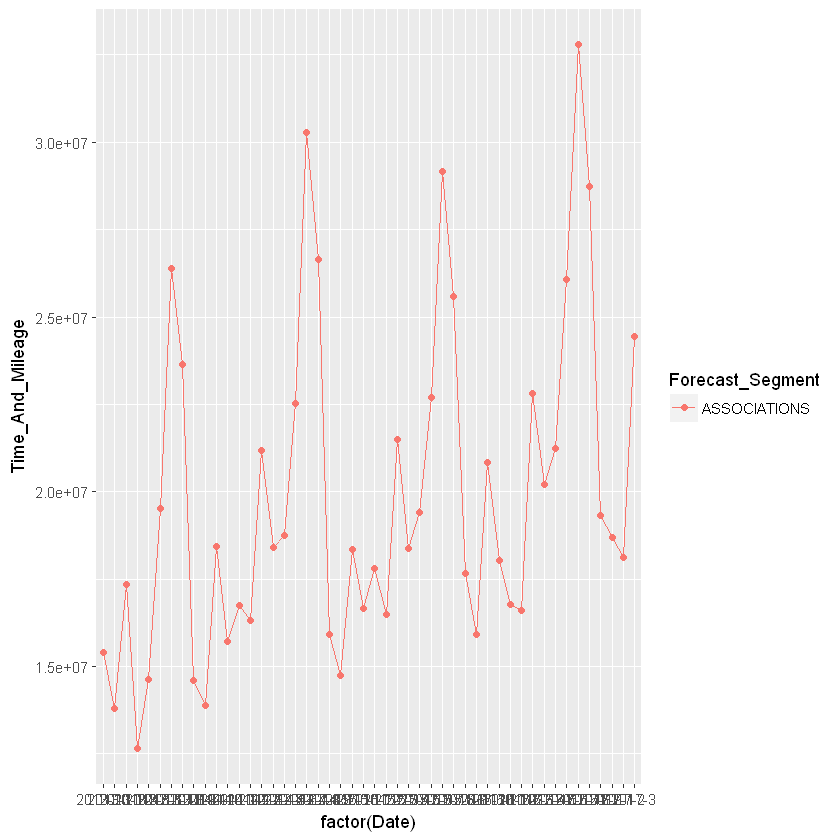

In [17]:
avis_data_ass <- data[data$Brand == 'AVIS' & data$Forecast_Segment == 'ASSOCIATIONS',]
bgt_data_ass <- data[data$Brand == 'BUDGET'& data$Forecast_Segment == 'ASSOCIATIONS',]
ggplot(data = avis_data_ass, aes(x = factor(Date), y = Time_And_Mileage, color =Forecast_Segment )) +       
  geom_line(aes(group = Forecast_Segment)) + geom_point()
ggplot(data = bgt_data_ass, aes(x = factor(Date), y = Time_And_Mileage, color =Forecast_Segment )) +       
  geom_line(aes(group = Forecast_Segment)) + geom_point()

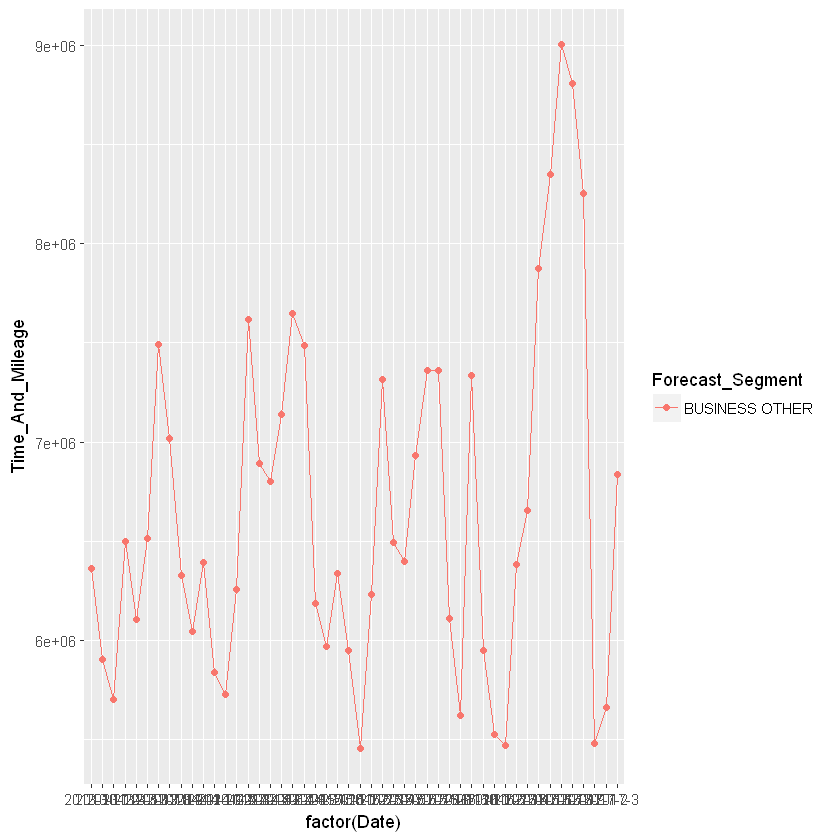

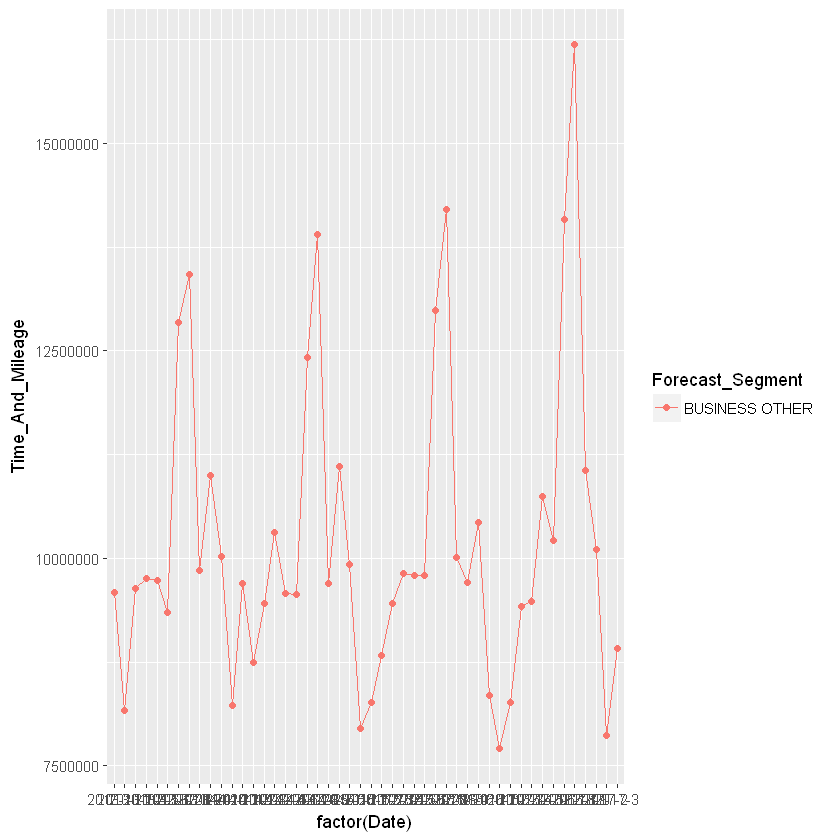

In [18]:
avis_data_ass <- data[data$Brand == 'AVIS' & data$Forecast_Segment == 'BUSINESS OTHER',]
bgt_data_ass <- data[data$Brand == 'BUDGET'& data$Forecast_Segment == 'BUSINESS OTHER',]
ggplot(data = avis_data_ass, aes(x = factor(Date), y = Time_And_Mileage, color =Forecast_Segment )) +       
  geom_line(aes(group = Forecast_Segment)) + geom_point()
ggplot(data = bgt_data_ass, aes(x = factor(Date), y = Time_And_Mileage, color =Forecast_Segment )) +       
  geom_line(aes(group = Forecast_Segment)) + geom_point()

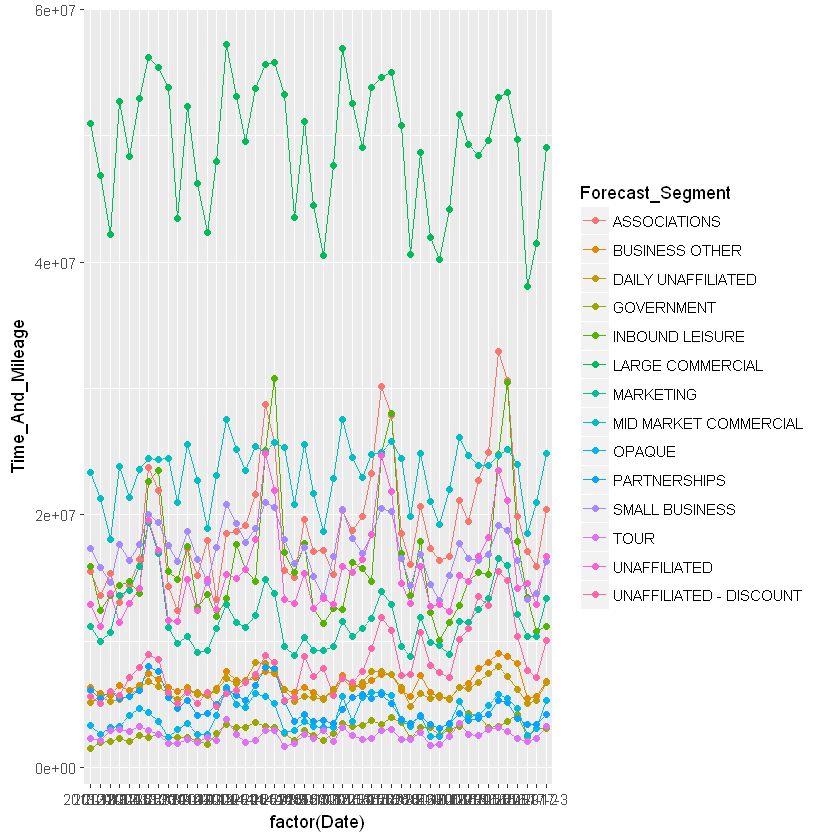

In [19]:
ggplot(data = avis_data, aes(x = factor(Date), y = Time_And_Mileage, color =Forecast_Segment )) +      
  geom_line(aes(group = Forecast_Segment)) + geom_point()

#### Plot for each Brand-Segmentation combo

In [20]:
uni_seg <- unique(data$Forecast_Segment)
uni_brand <- unique(data$Brand)

In [21]:
uni_seg

[1] ASSOCIATIONS            BUSINESS OTHER          DAILY UNAFFILIATED     
 [4] GOVERNMENT              INBOUND LEISURE         LARGE COMMERCIAL       
 [7] MARKETING               MID MARKET COMMERCIAL   OPAQUE                 
[10] PARTNERSHIPS            SMALL BUSINESS          TOUR                   
[13] UNAFFILIATED            UNAFFILIATED - DISCOUNT
14 Levels: ASSOCIATIONS BUSINESS OTHER DAILY UNAFFILIATED ... UNAFFILIATED - DISCOUNT

In [22]:
uni_brand

[1] AVIS   BUDGET
Levels: AVIS BUDGET

In [23]:
vocallGrp <- split(data,list(data$Brand,data$Forecast_Segment))

In [25]:
uni_brand <- ("AVIS")

[1] "AVIS"
[1] "ASSOCIATIONS"


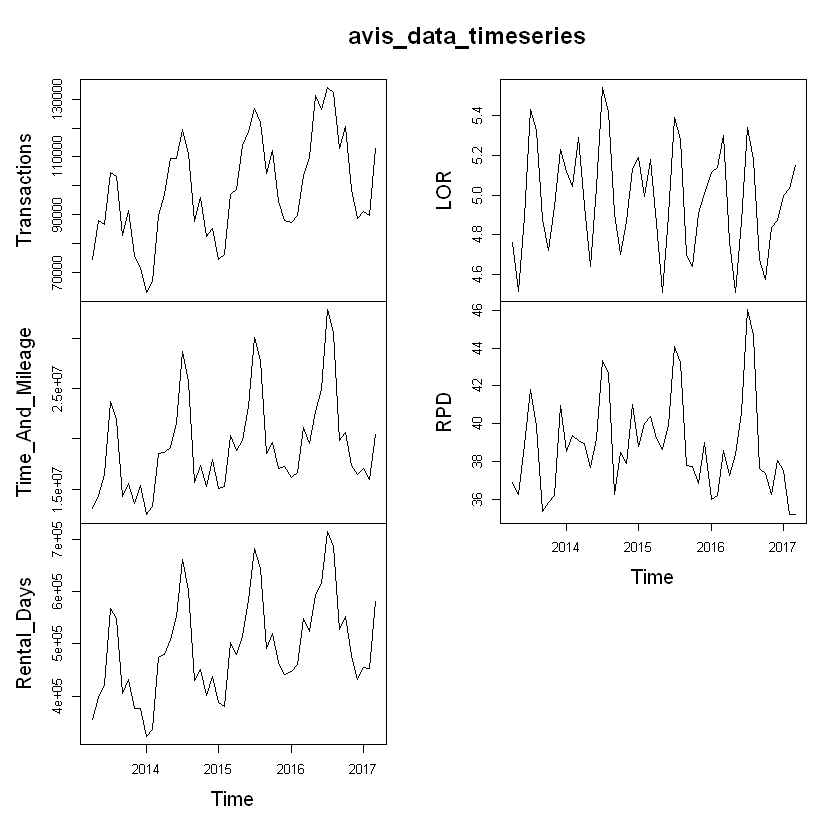

[1] "AVIS"
[1] "BUSINESS OTHER"


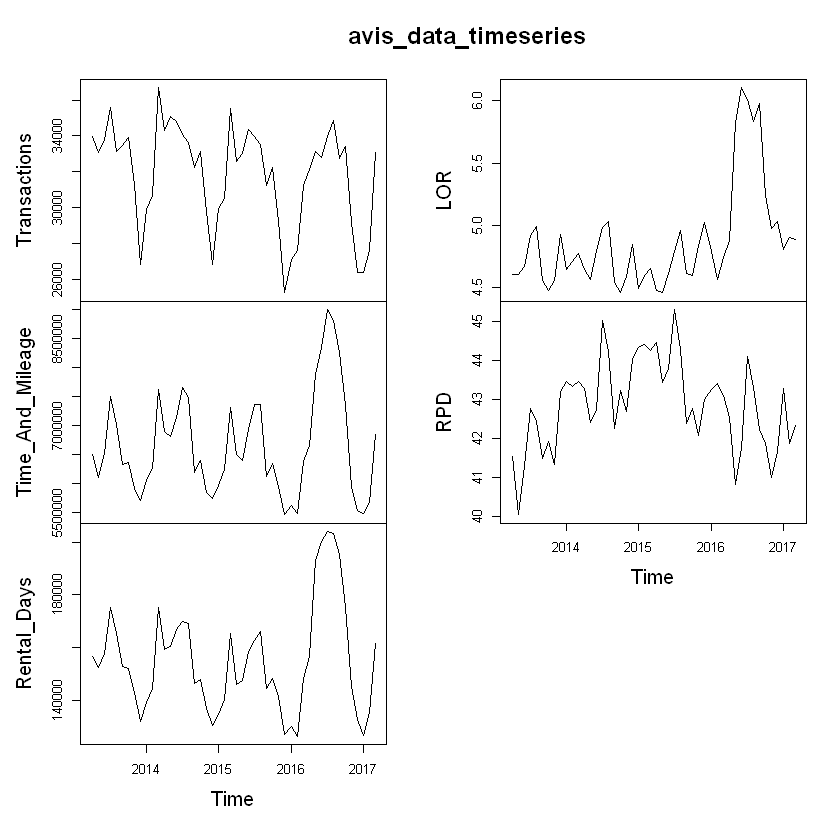

[1] "AVIS"
[1] "DAILY UNAFFILIATED"


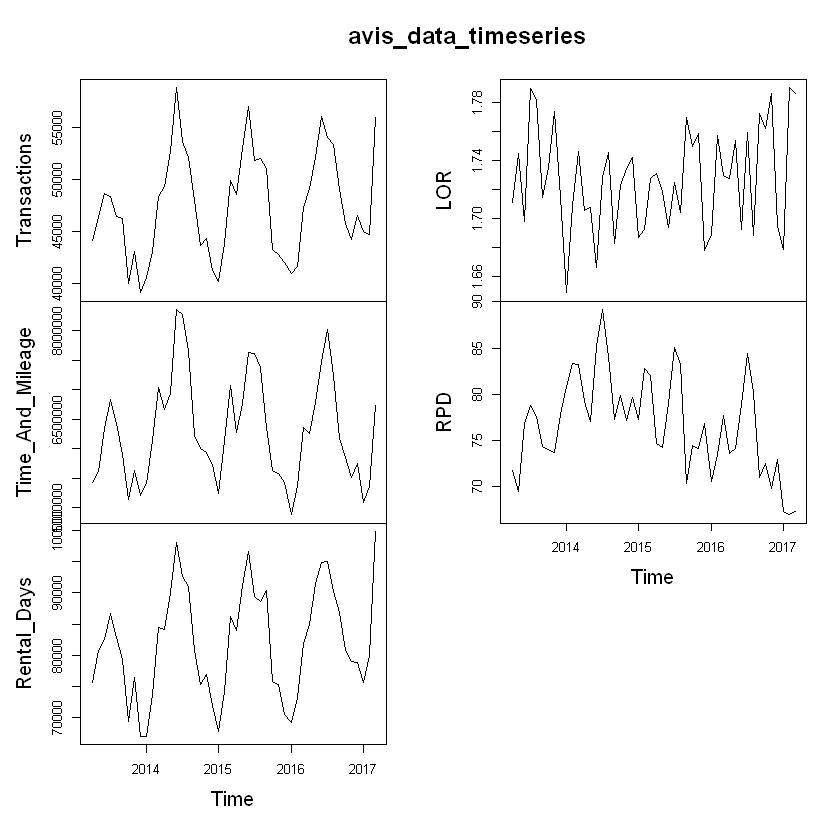

[1] "AVIS"
[1] "GOVERNMENT"


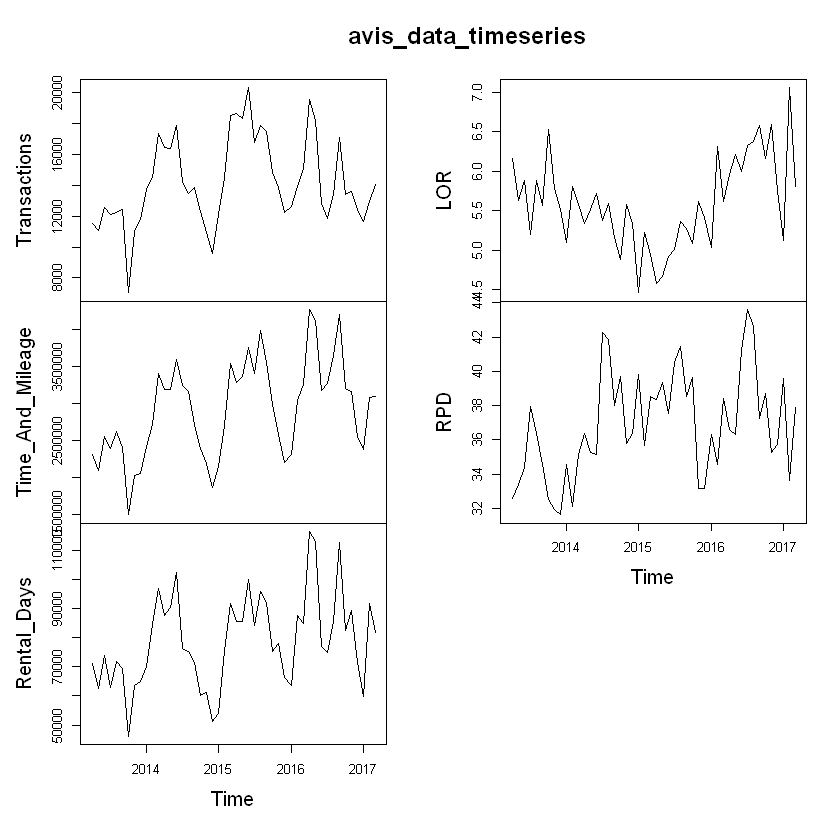

[1] "AVIS"
[1] "INBOUND LEISURE"


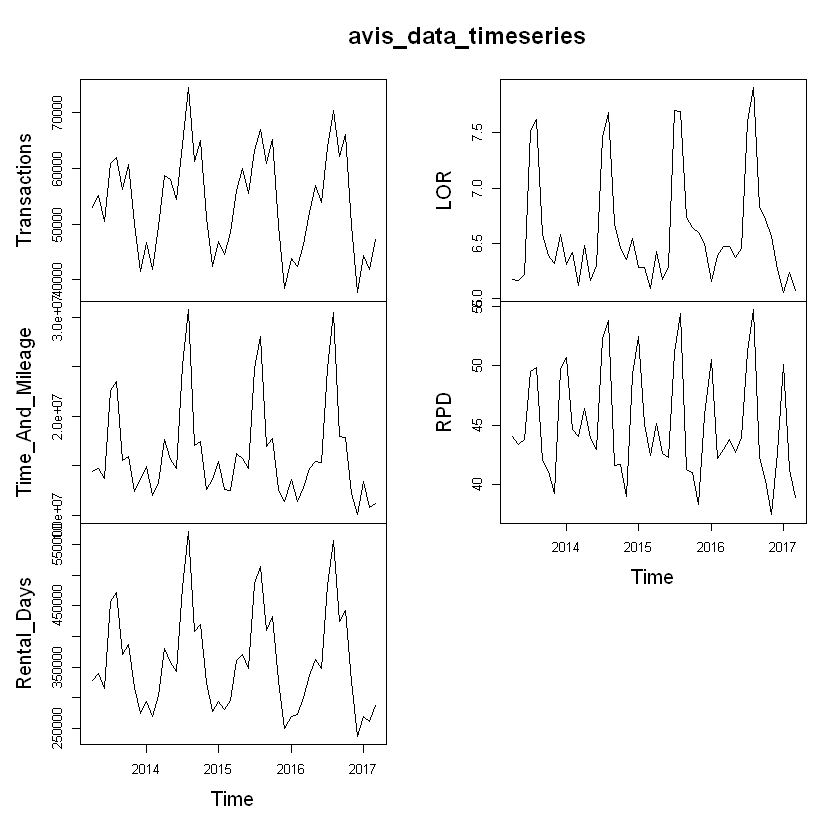

[1] "AVIS"
[1] "LARGE COMMERCIAL"


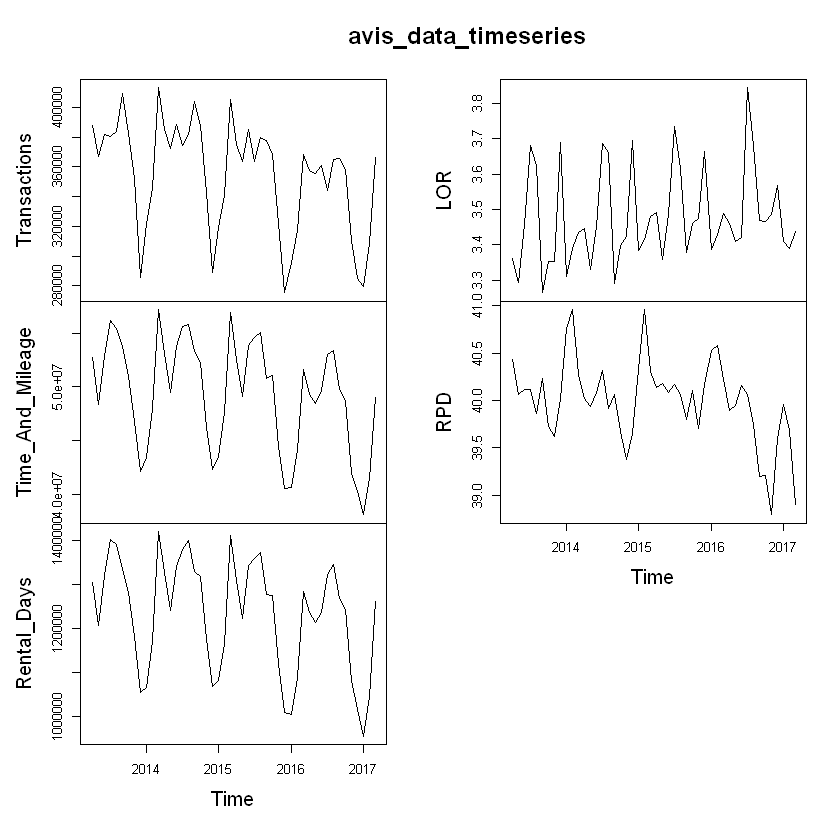

[1] "AVIS"
[1] "MARKETING"


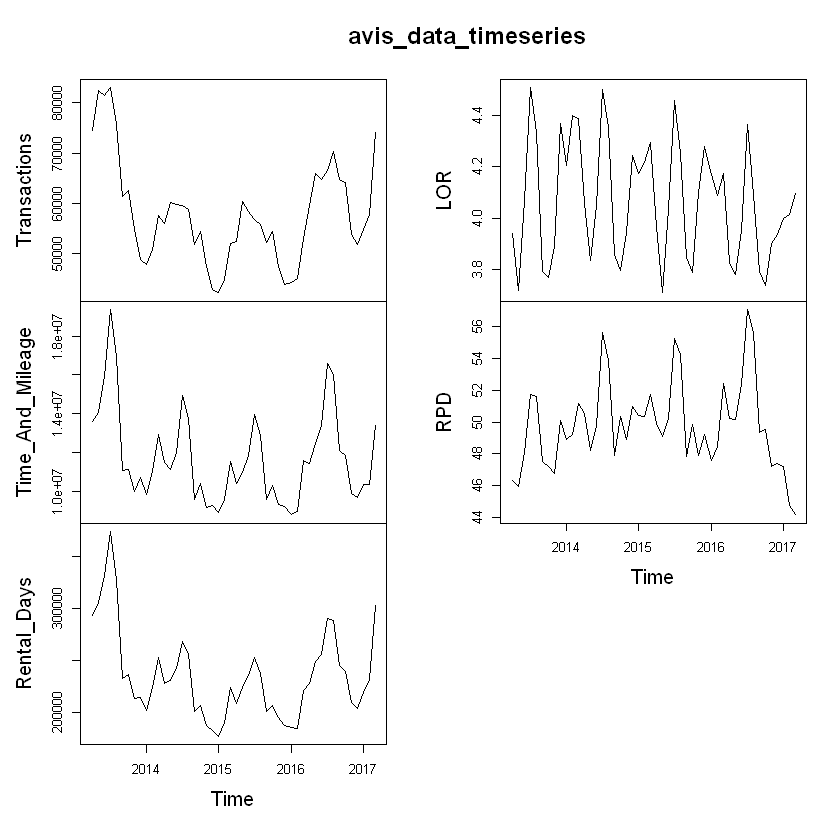

[1] "AVIS"
[1] "MID MARKET COMMERCIAL"


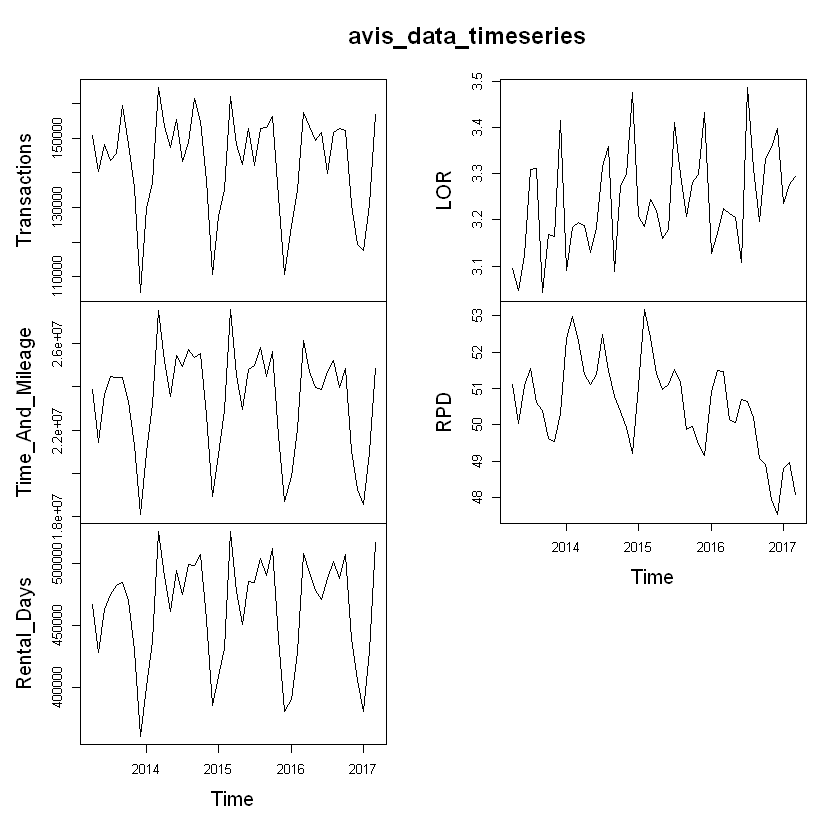

[1] "AVIS"
[1] "OPAQUE"


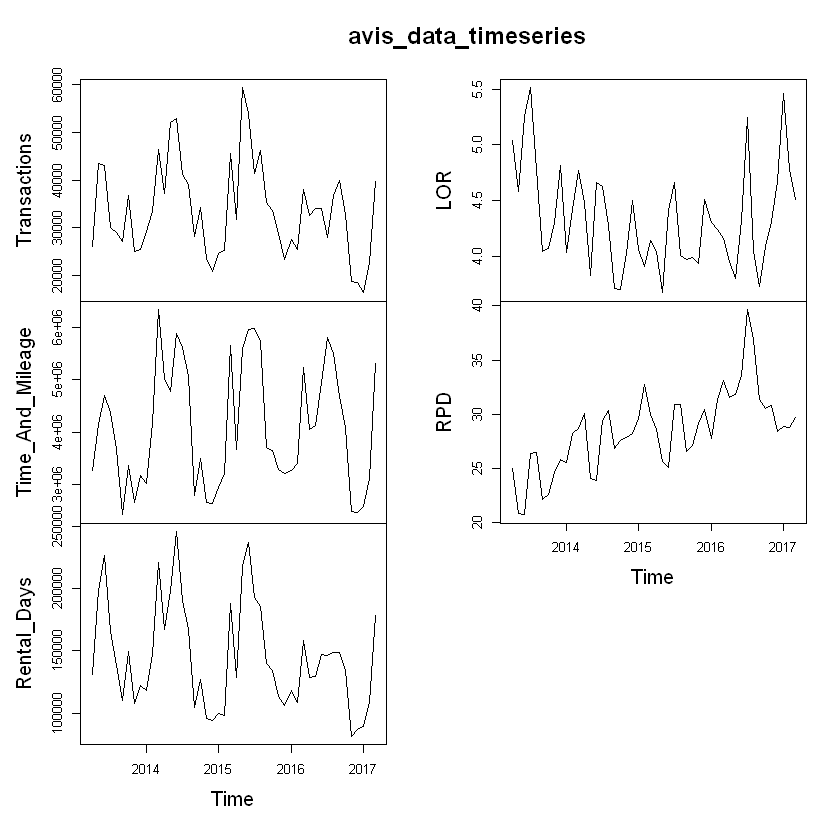

[1] "AVIS"
[1] "PARTNERSHIPS"


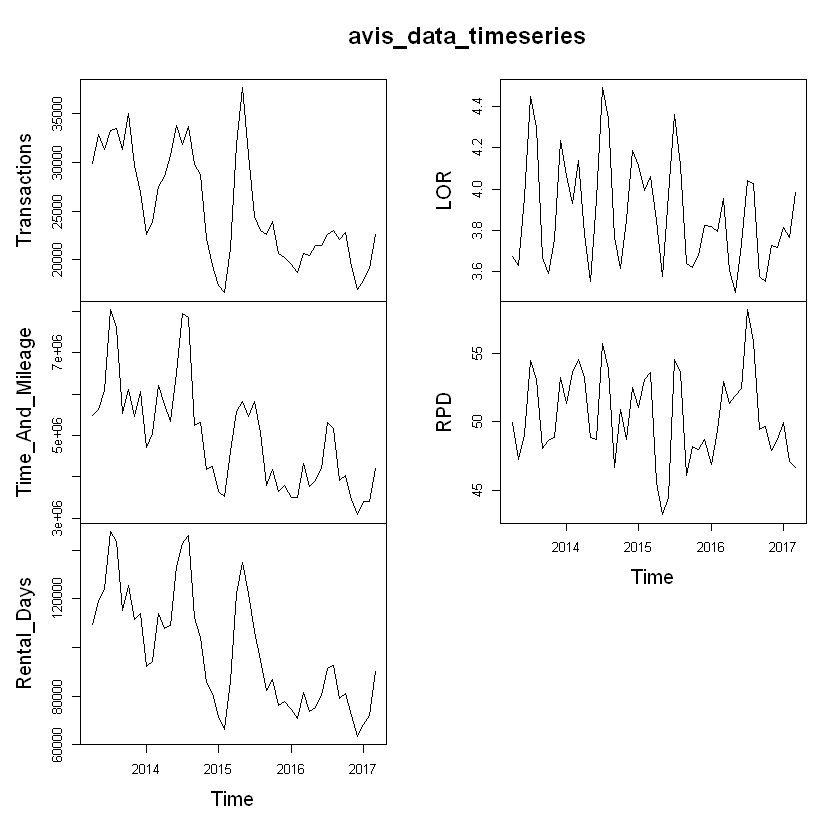

[1] "AVIS"
[1] "SMALL BUSINESS"


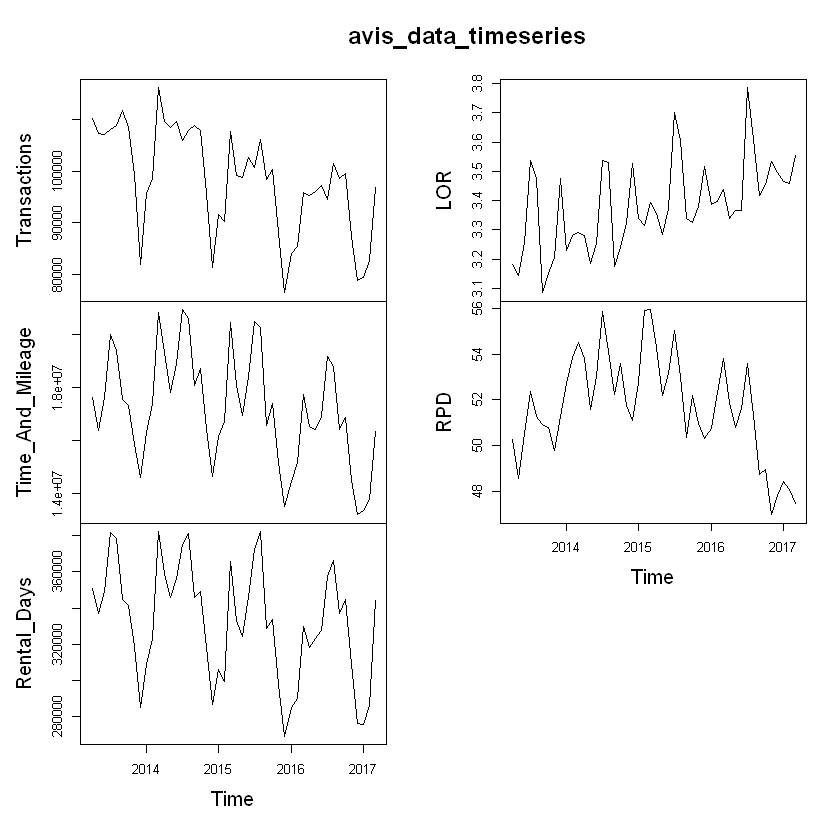

[1] "AVIS"
[1] "TOUR"


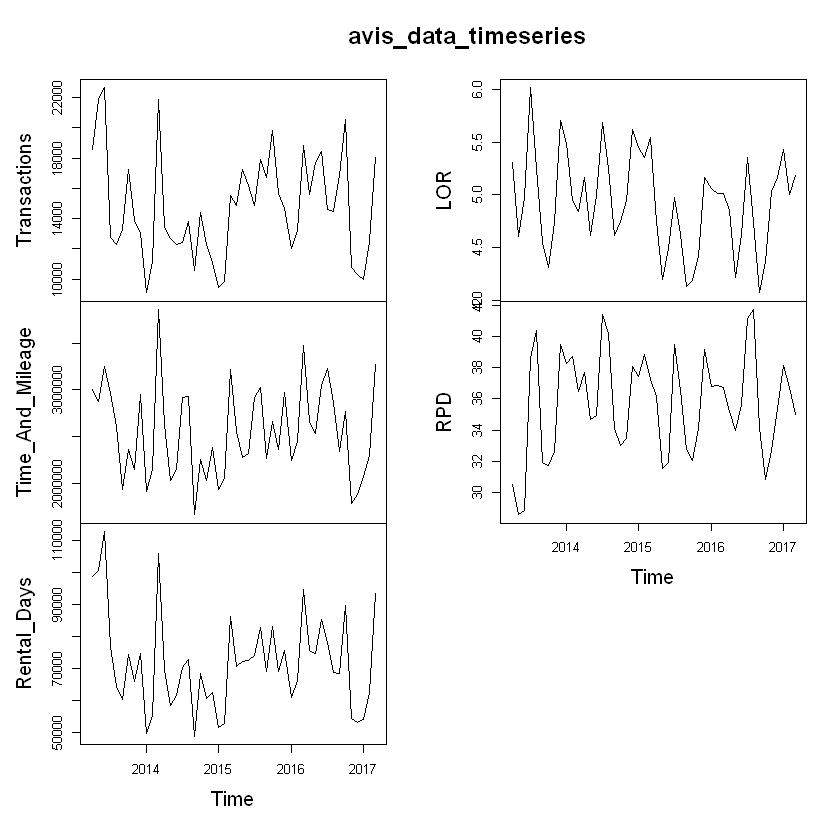

[1] "AVIS"
[1] "UNAFFILIATED"


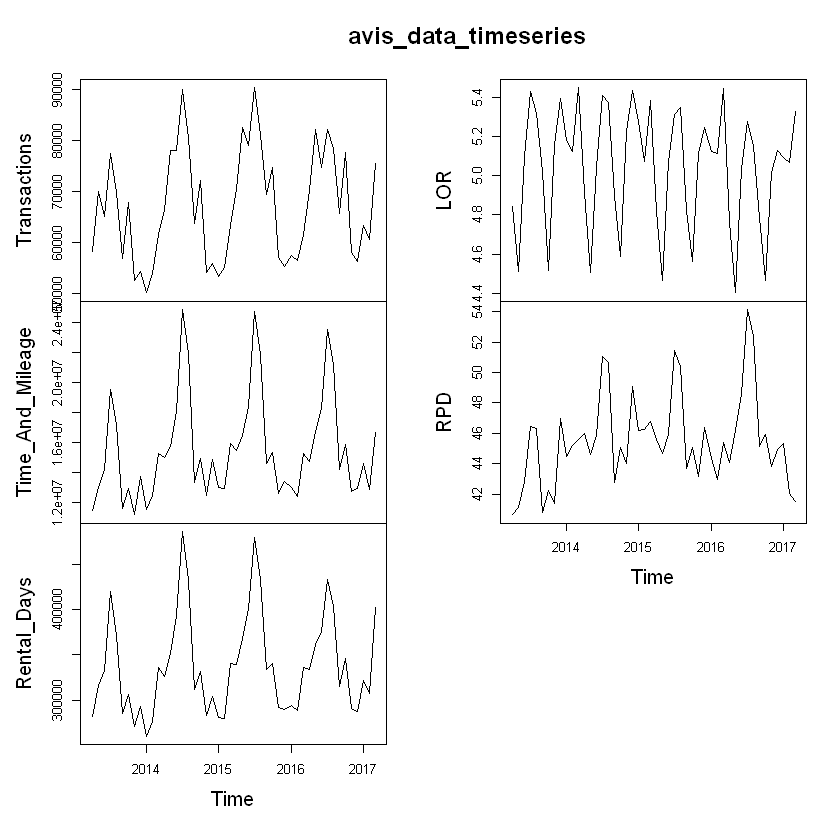

[1] "AVIS"
[1] "UNAFFILIATED - DISCOUNT"


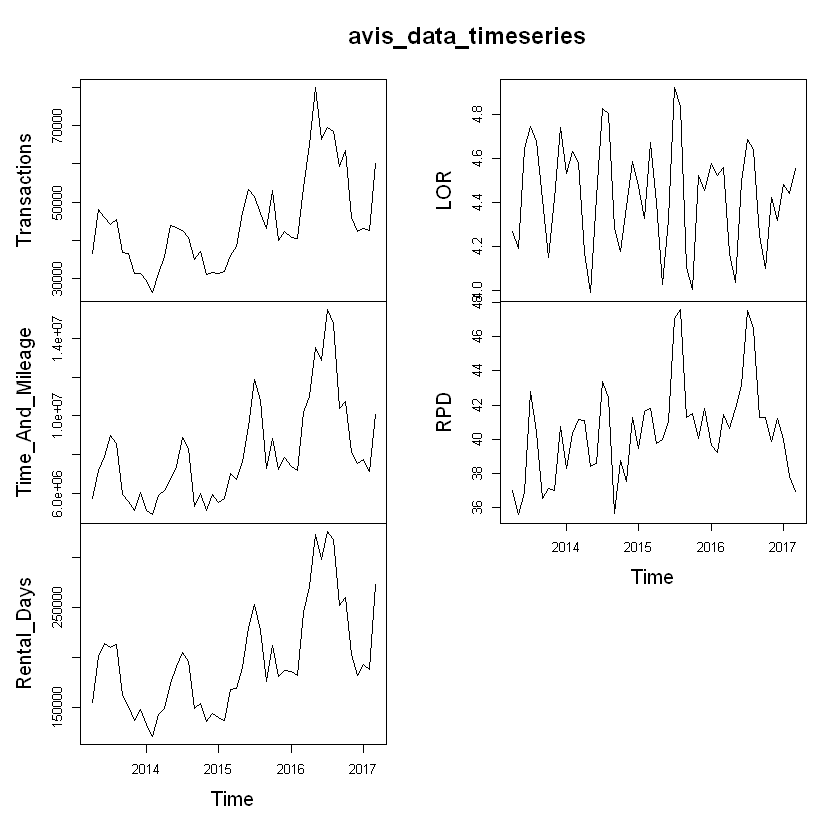

In [26]:
for (i in uni_brand){
    for (j in uni_seg){
        temp <- paste(i,j, sep = " ")
        avis_data_ass <- data[data$Brand == i & data$Forecast_Segment == j,]
        avis_data <- subset(avis_data_ass, select=-c(Brand,Date,Rental_Division_Id,Forecast_Segment))
        avis_data_timeseries <- ts(avis_data, frequency = 12, start = c(2013,4))
        plot.ts(avis_data_timeseries)
        print (i)
        print (j)
    }
}

[1] "BUDGET"
[1] "ASSOCIATIONS"


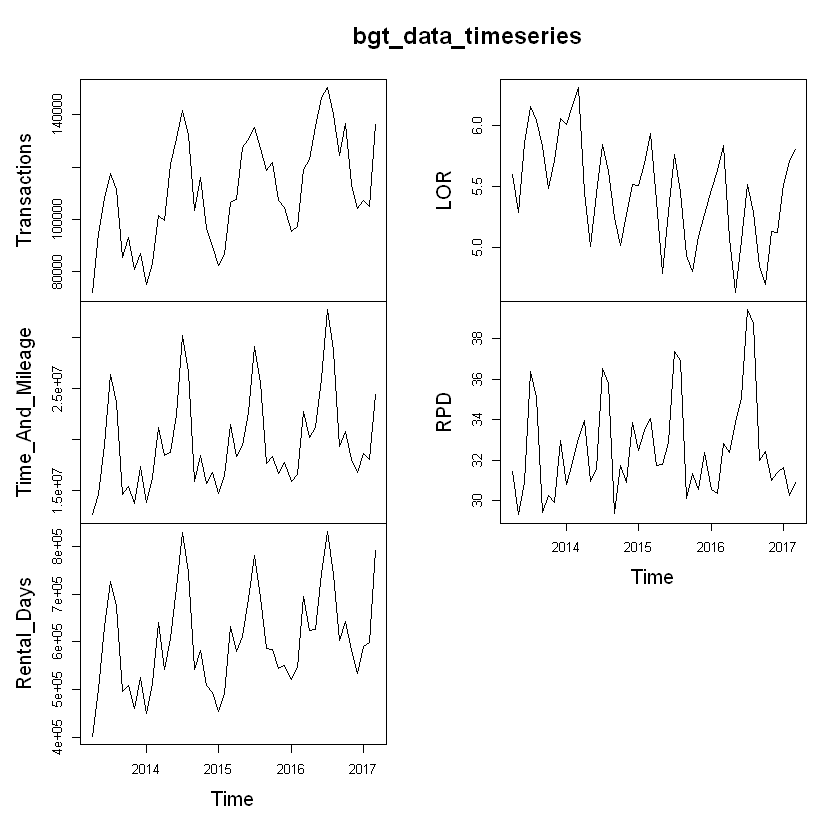

[1] "BUDGET"
[1] "BUSINESS OTHER"


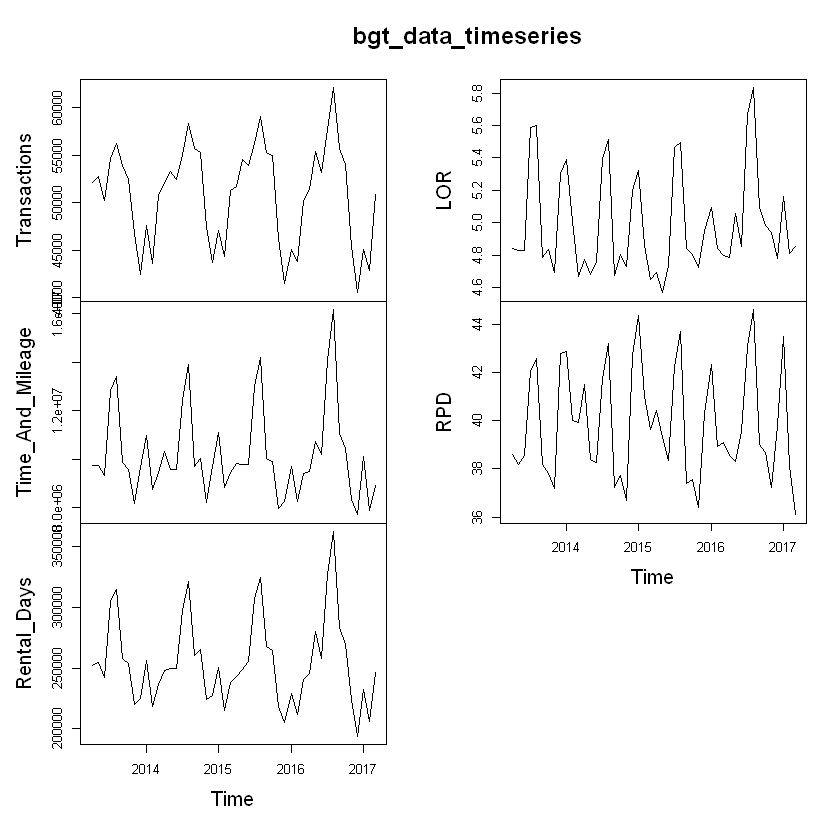

[1] "BUDGET"
[1] "DAILY UNAFFILIATED"


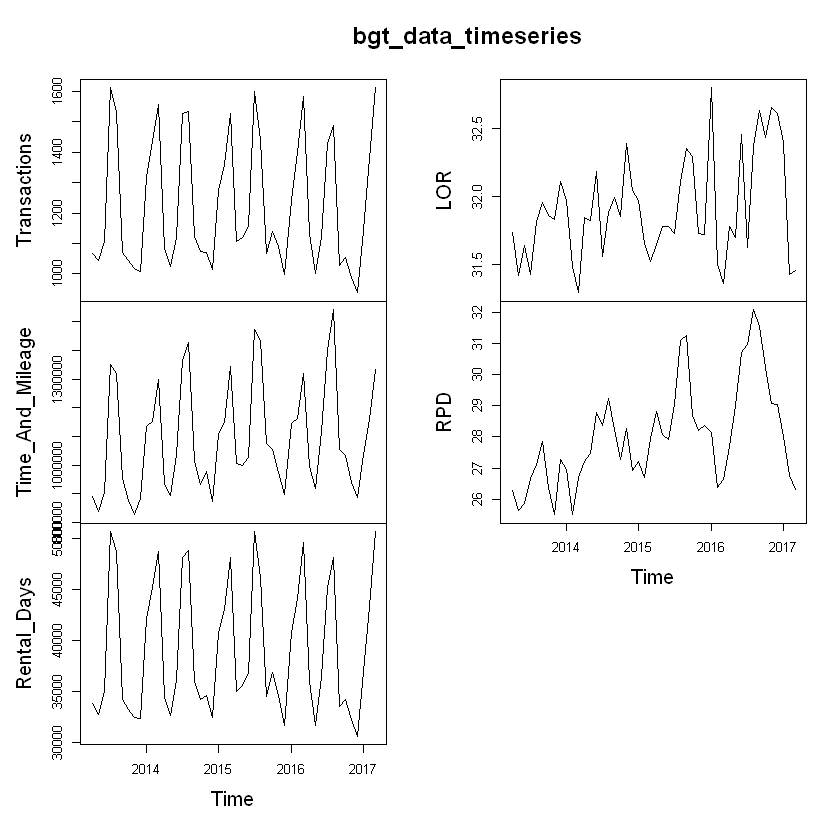

[1] "BUDGET"
[1] "GOVERNMENT"


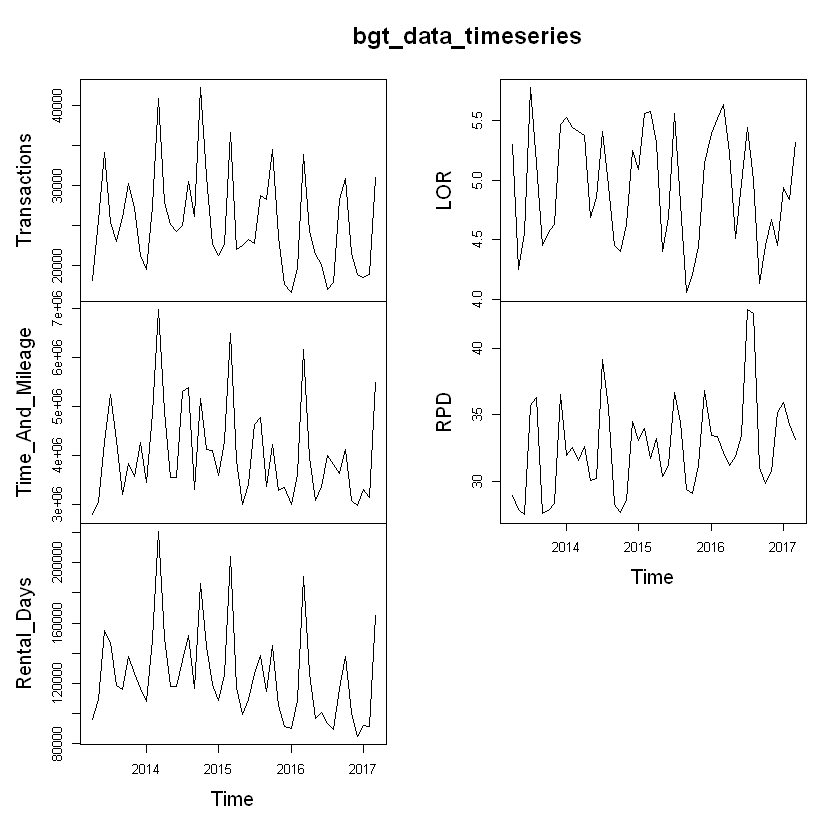

[1] "BUDGET"
[1] "INBOUND LEISURE"


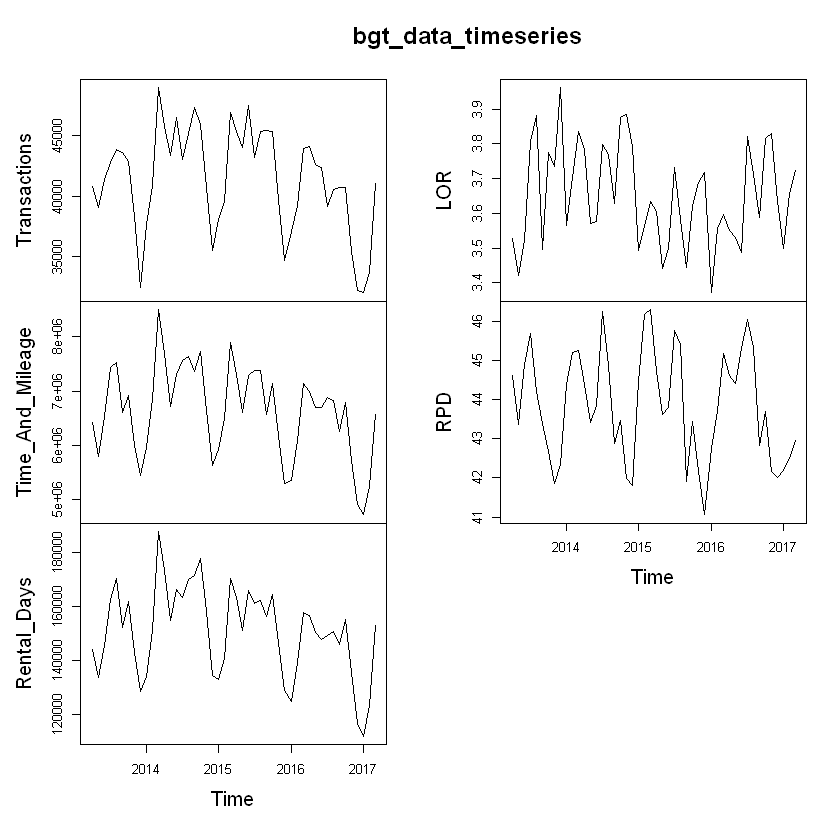

[1] "BUDGET"
[1] "MARKETING"


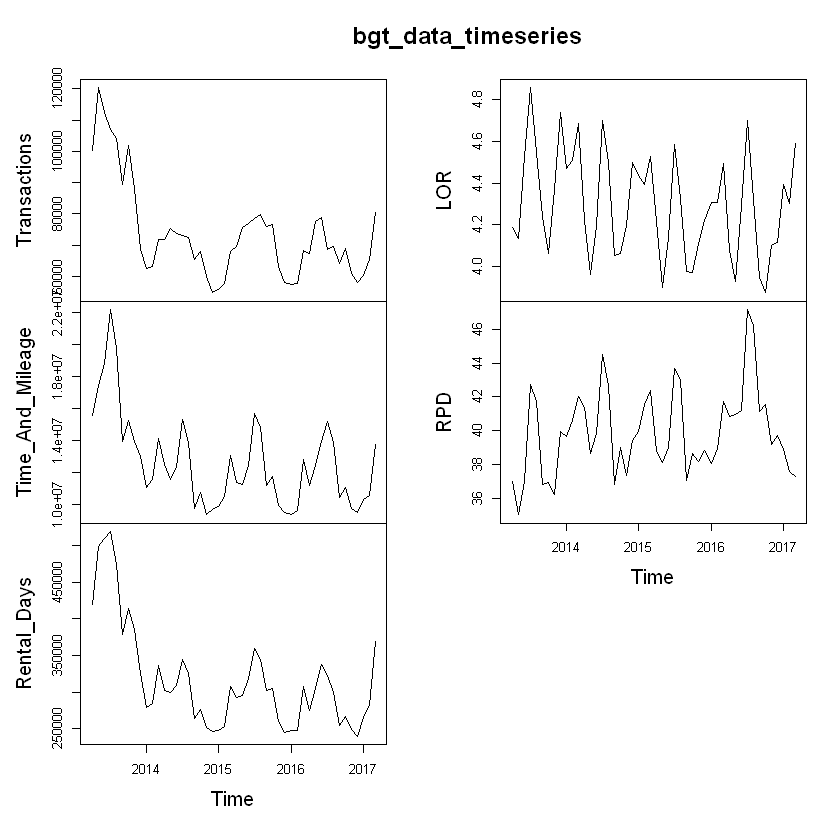

[1] "BUDGET"
[1] "OPAQUE"


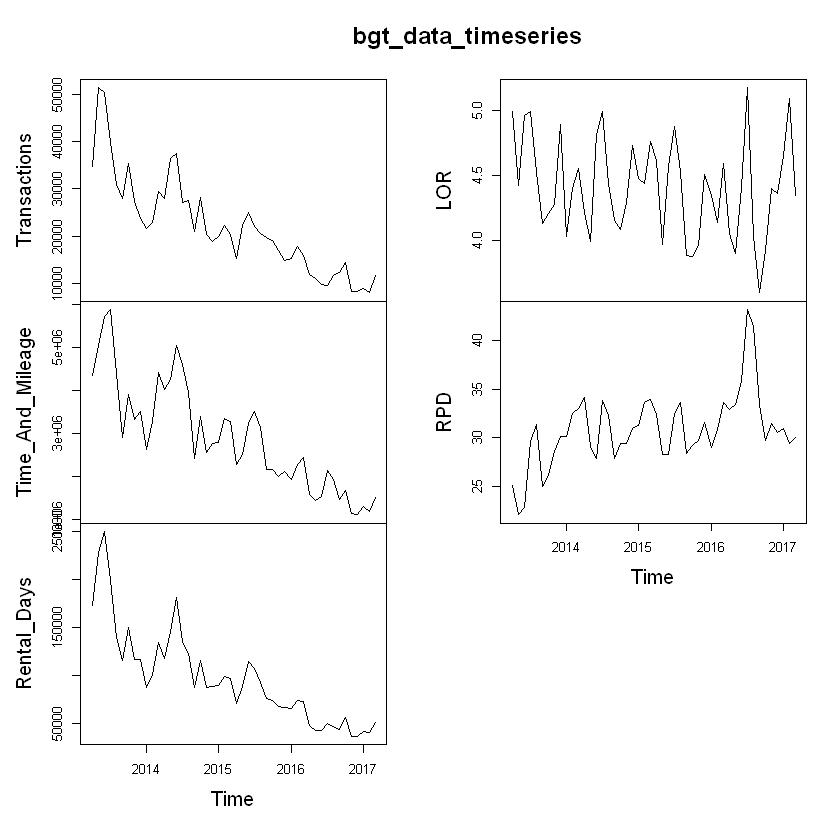

[1] "BUDGET"
[1] "PARTNERSHIPS"


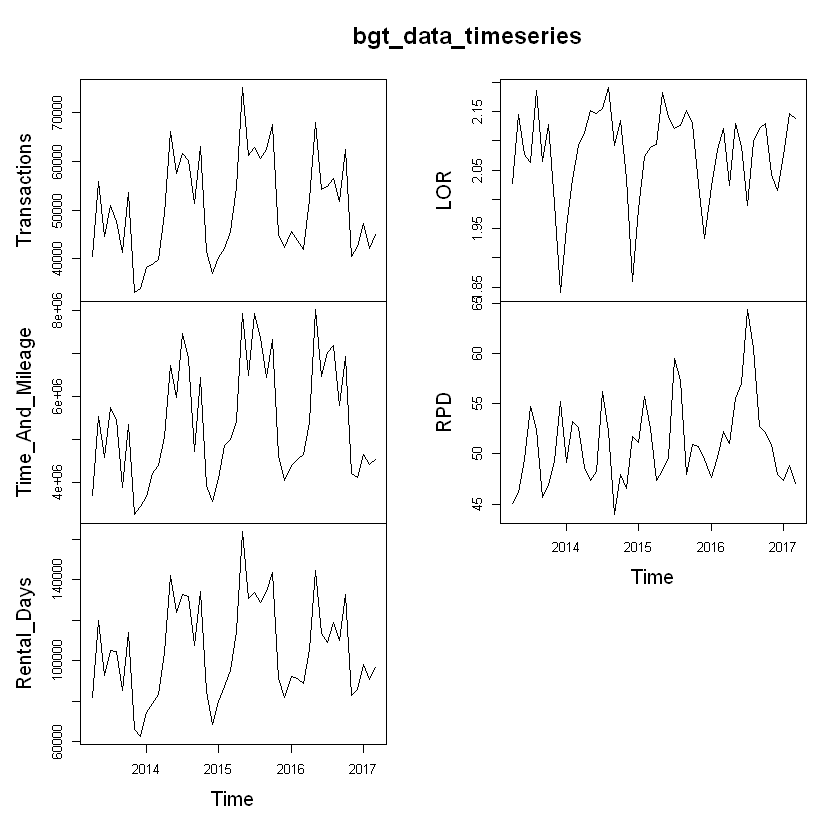

[1] "BUDGET"
[1] "SMALL BUSINESS"


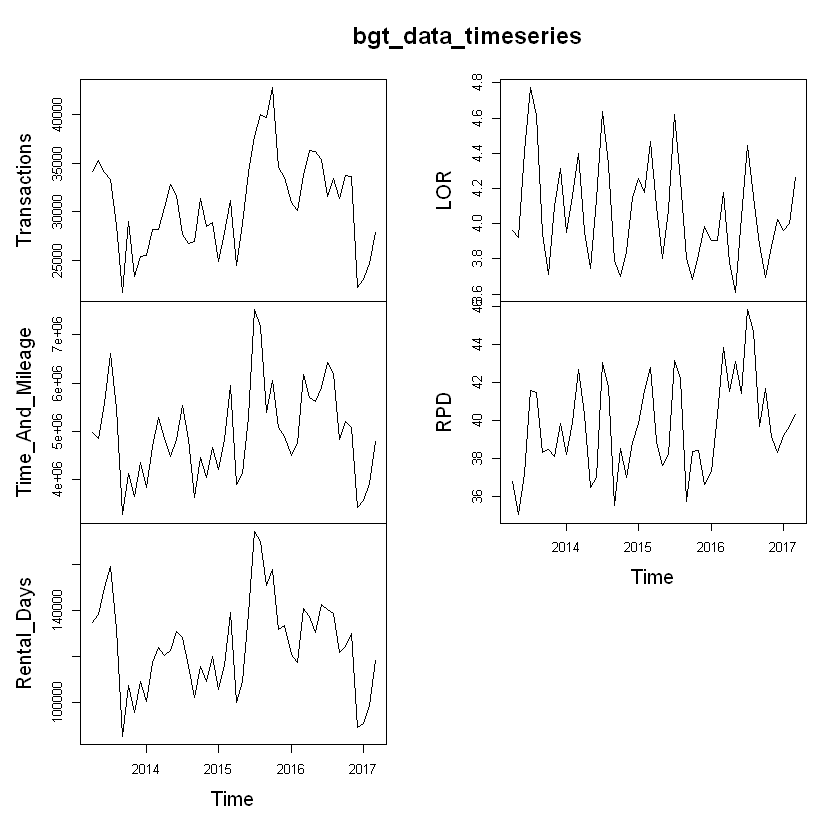

[1] "BUDGET"
[1] "UNAFFILIATED"


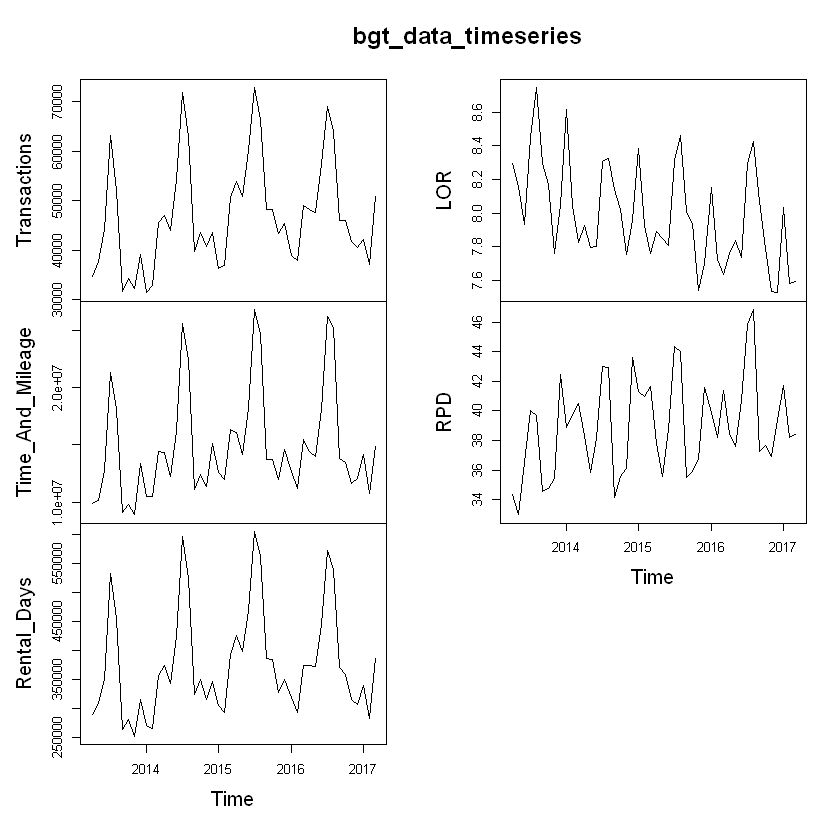

[1] "BUDGET"
[1] "UNAFFILIATED - DISCOUNT"


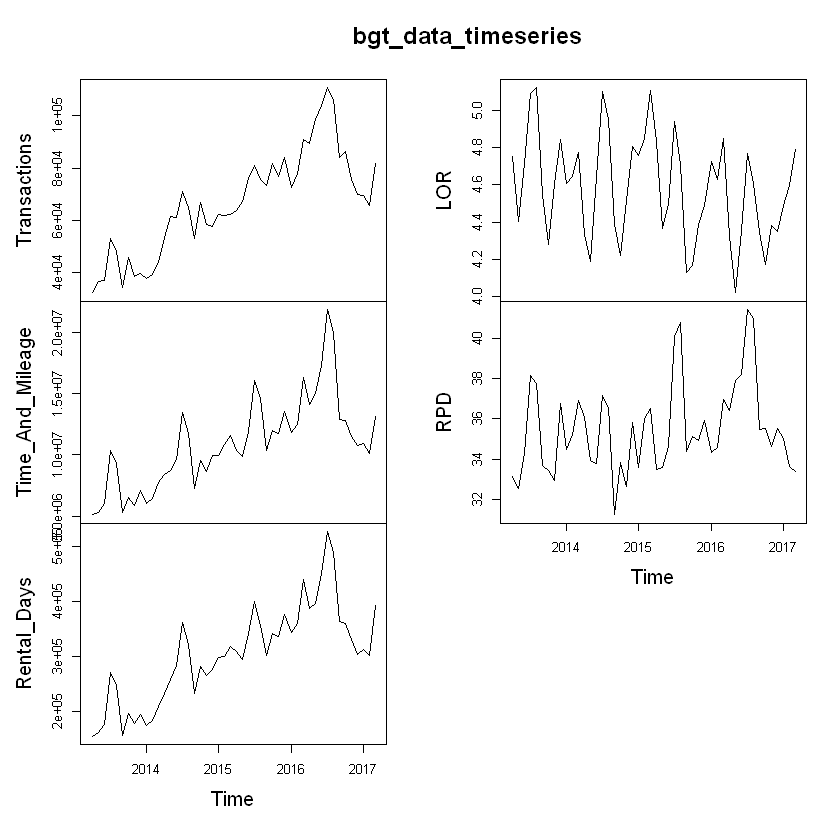

In [27]:
uni_brand <- ("BUDGET")
subuni_seg <- uni_seg[-c(6,8,12)]
for (i in uni_brand){
    for (j in subuni_seg){
        #temp <- paste(i,j, sep = " ")
        bgt_data_ass <- data[data$Brand == i & data$Forecast_Segment == j,]
        bgt_data <- subset(bgt_data_ass, select=-c(Brand,Date,Rental_Division_Id,Forecast_Segment))
        bgt_data_timeseries <- ts(bgt_data, frequency = 12, start = c(2013,4))
        plot.ts(bgt_data_timeseries)
        print (i)
        print (j)
    }
}

In [28]:
avis_data_ass <- data[data$Brand == 'AVIS' & data$Forecast_Segment == 'BUSINESS OTHER',]
avis_data <- subset(avis_data_ass, select=-c(Brand,Date,Rental_Division_Id,Forecast_Segment))
avis_data_timeseries <- ts(avis_data, frequency = 12, start = c(2013,4))

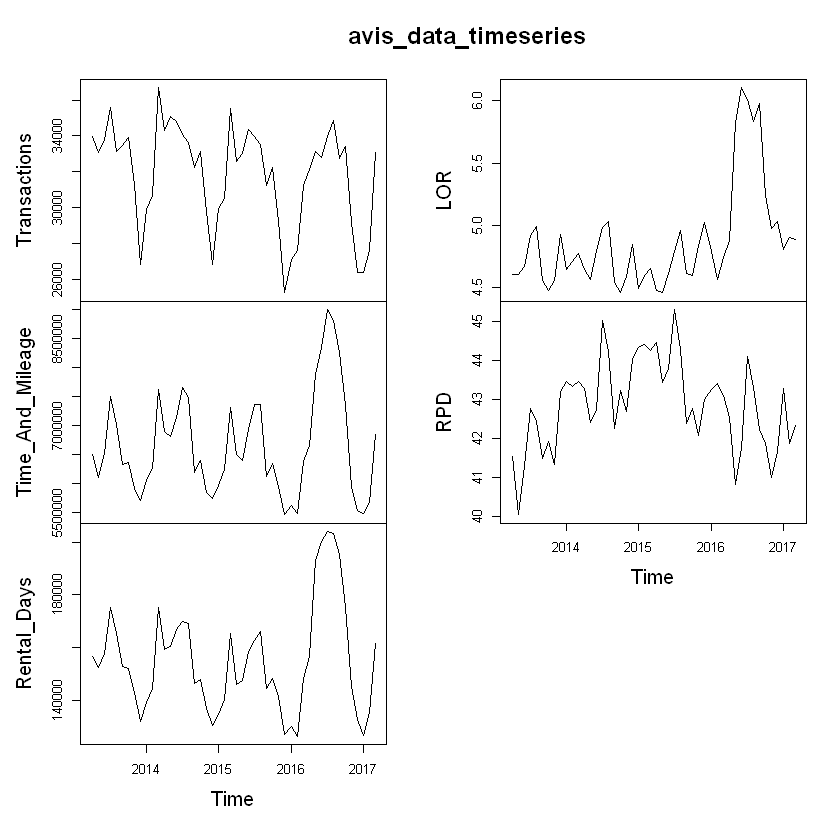

In [29]:
plot.ts(avis_data_timeseries)

In [30]:
bgt_data_ass <- data[data$Brand == 'BUDGET'& data$Forecast_Segment == 'DAILY UNAFFILIATED',]
bgt_data <- subset(bgt_data_ass, select=-c(Brand,Date,Rental_Division_Id,Forecast_Segment))
bgt_data_timeseries <- ts(bgt_data, frequency = 12, start = c(2013,4))

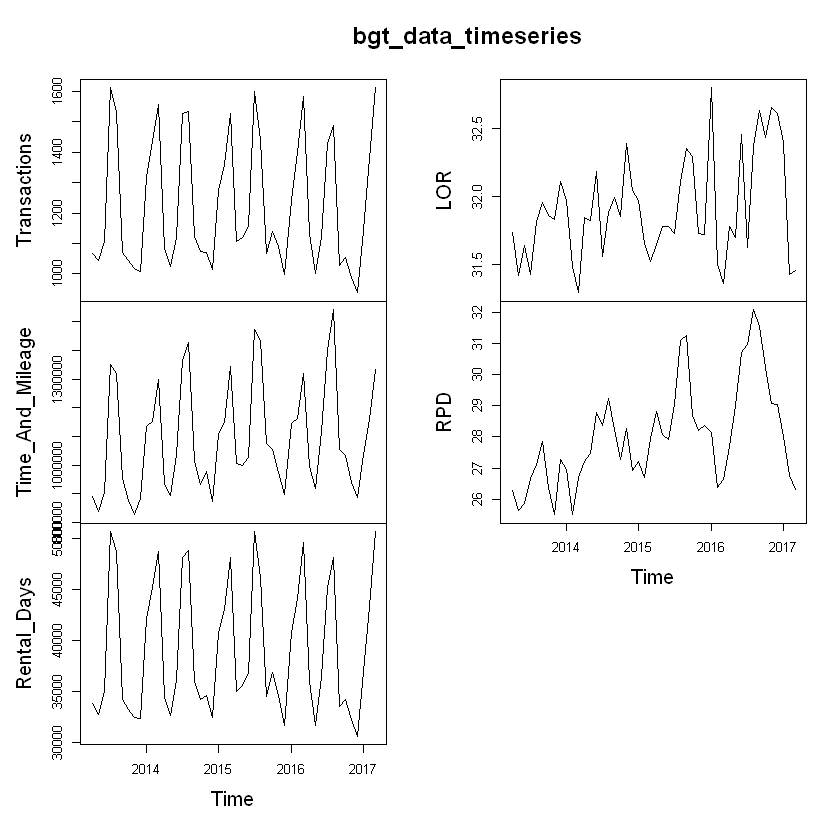

In [31]:
plot.ts(bgt_data_timeseries)

#### Forecast Result Using Default PROS FORECAST 

In [253]:
library(dplyr,warn.conflicts = FALSE)
library(rpart,warn.conflicts = FALSE)
library(ggplot2,warn.conflicts = FALSE)

In [254]:
pred <- read.csv(file="pred.csv", header=TRUE, sep=",")
head(pred)

Brand,Forecast_Segment,Date,TYPE,LEAD,Transactions,Time_And_Mileage,Rental_Days
AVIS,ASSOCIATIONS,01/04/2013,ACTUAL,0,74466.000,13085559.0,354707.000
AVIS,ASSOCIATIONS,01/04/2013,FORECAST,0,84681.276,16466245.0,423565.359
AVIS,ASSOCIATIONS,01/04/2013,RESIDUAL,0,-10215.276,-3380686.0,-68858.359
AVIS,ASSOCIATIONS,01/05/2013,ACTUAL,0,87977.000,14404442.0,397454.000
AVIS,ASSOCIATIONS,01/05/2013,FORECAST,0,79350.893,14636659.2,391180.059
AVIS,ASSOCIATIONS,01/05/2013,RESIDUAL,0,8626.107,-232217.2,6273.941


In [255]:
est <- read.csv(file="est.csv", header=TRUE, sep=",")

In [256]:
head(subset(est,TYPE =="MAPE" | TYPE=="ADJRSQ" | TYPE =="AIC" | TYPE == "RSQUARE"))

,Brand,Forecast_Segment,TYPE,Date,Rental_Days,Time_And_Mileage,Transactions
1,AVIS,ASSOCIATIONS,ADJRSQ,01/03/2016,0.6847035,0.6800227,0.8116449
2,AVIS,ASSOCIATIONS,AIC,01/03/2016,784.6193200,1065.8310000,642.4057000
23,AVIS,ASSOCIATIONS,MAPE,01/03/2016,7.4261190,9.6761159,5.5812449
34,AVIS,ASSOCIATIONS,RSQUARE,01/03/2016,0.7207374,0.7165915,0.8331712
40,AVIS,BUSINESS OTHER,ADJRSQ,01/03/2016,0.5722927,0.5318967,0.5889620
41,AVIS,BUSINESS OTHER,AIC,01/03/2016,659.6222500,938.5735200,543.4898700


In [257]:
data <- read.csv(file="HistoryDataforforecast.csv", header=TRUE, sep=",")

In [258]:
data$Brand <- strtrim(data$Brand, 4)

In [259]:
head(data)

Rental_Division_Id,Brand,Date,Forecast_Segment,Transactions,Time_And_Mileage,Rental_Days,LOR,RPD
8001,AVIS,01/04/2013,ASSOCIATIONS,74466,13085559,354707,4.763339,36.89120
8001,AVIS,01/04/2013,BUSINESS OTHER,33988,6499712,156560,4.606328,41.51582
8001,AVIS,01/04/2013,DAILY UNAFFILIATED,44160,5423394,75564,1.711152,71.77174
8001,AVIS,01/04/2013,GOVERNMENT,11529,2314296,71061,6.163712,32.56753
8001,AVIS,01/04/2013,INBOUND LEISURE,53042,14410061,327216,6.169001,44.03836
8001,AVIS,01/04/2013,LARGE COMMERCIAL,387785,52695371,1303158,3.360515,40.43669


##### Plot and Calculate Forecast MAPE for Transaction

In [260]:
Transaction_data<-reshape(pred[,c(1,2,3,4,6)], timevar="TYPE", idvar=c("Brand","Forecast_Segment", "Date"), direction="wide")

In [261]:
head(Transaction_data[,1:6])

,Brand,Forecast_Segment,Date,Transactions.ACTUAL,Transactions.FORECAST,Transactions.RESIDUAL
1,AVIS,ASSOCIATIONS,01/04/2013,74466,84681.28,-10215.2763
4,AVIS,ASSOCIATIONS,01/05/2013,87977,79350.89,8626.1069
7,AVIS,ASSOCIATIONS,01/06/2013,86541,87389.81,-848.8105
10,AVIS,ASSOCIATIONS,01/07/2013,104619,86800.35,17818.6472
13,AVIS,ASSOCIATIONS,01/08/2013,103169,97475.64,5693.3619
16,AVIS,ASSOCIATIONS,01/09/2013,83006,96878.10,-13872.0986


In [262]:
forecast_data <- merge(Transaction_data[,c(1,2,3,5)], data[,2:5], by=c("Brand","Forecast_Segment", "Date"))

In [263]:
head(forecast_data)

Brand,Forecast_Segment,Date,Transactions.FORECAST,Transactions
AVIS,ASSOCIATIONS,01/01/2014,66378.71,63036
AVIS,ASSOCIATIONS,01/01/2015,77596.78,74707
AVIS,ASSOCIATIONS,01/01/2016,82961.40,87510
AVIS,ASSOCIATIONS,01/01/2017,100749.18,91145
AVIS,ASSOCIATIONS,01/02/2014,70330.16,66911
AVIS,ASSOCIATIONS,01/02/2015,82525.12,76386


In [264]:
forecast_data$date <- as.Date(forecast_data$Date,"%d/%m/%Y")

In [265]:
forecast_mape<-subset(forecast_data, date > as.Date("2016-03-01") )

In [266]:
mean(sum(abs(forecast_mape$Transactions - forecast_mape$Transactions.FORECAST) / abs(forecast_mape$Transactions)))

[1] 30.68478

In [267]:
uni_seg <- unique(forecast_mape$Forecast_Segment)
uni_brand <- unique(forecast_mape$Brand)

[1] "AVIS"
[1] "ASSOCIATIONS"
[1] 0.8407894


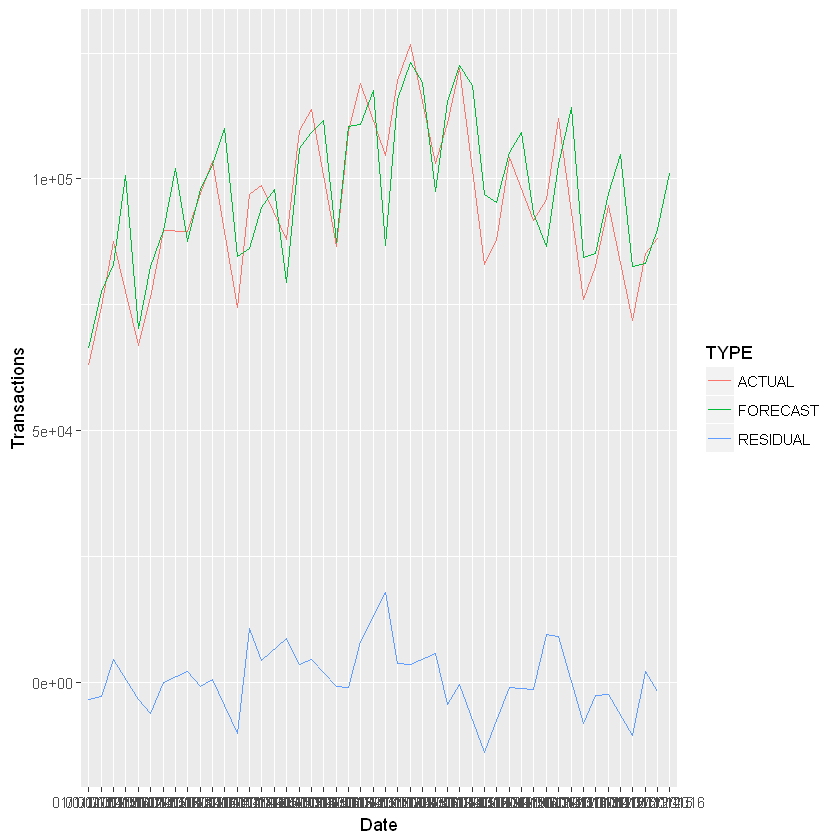

[1] "AVIS"
[1] "BUSINESS OTHER"
[1] 0.5295046


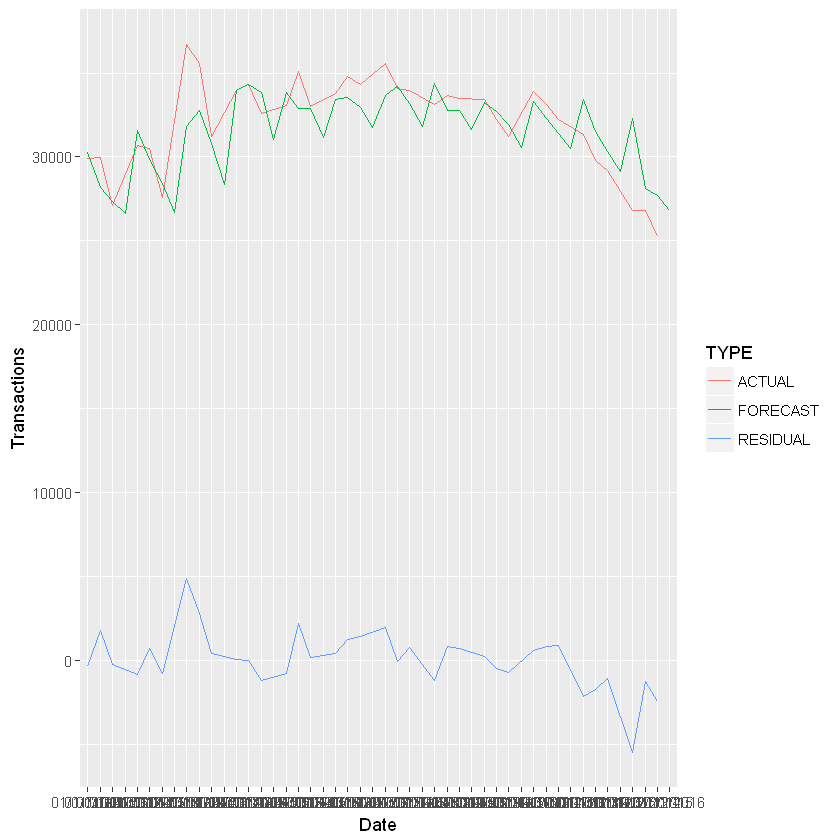

[1] "AVIS"
[1] "DAILY UNAFFILIATED"
[1] 0.4012769


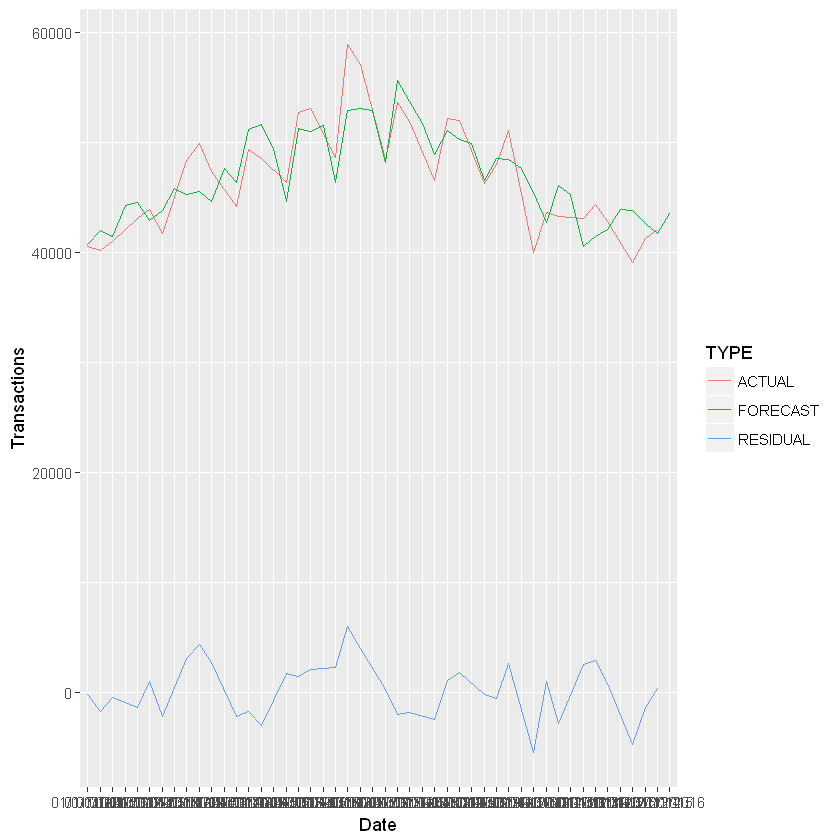

[1] "AVIS"
[1] "GOVERNMENT"
[1] 2.48449


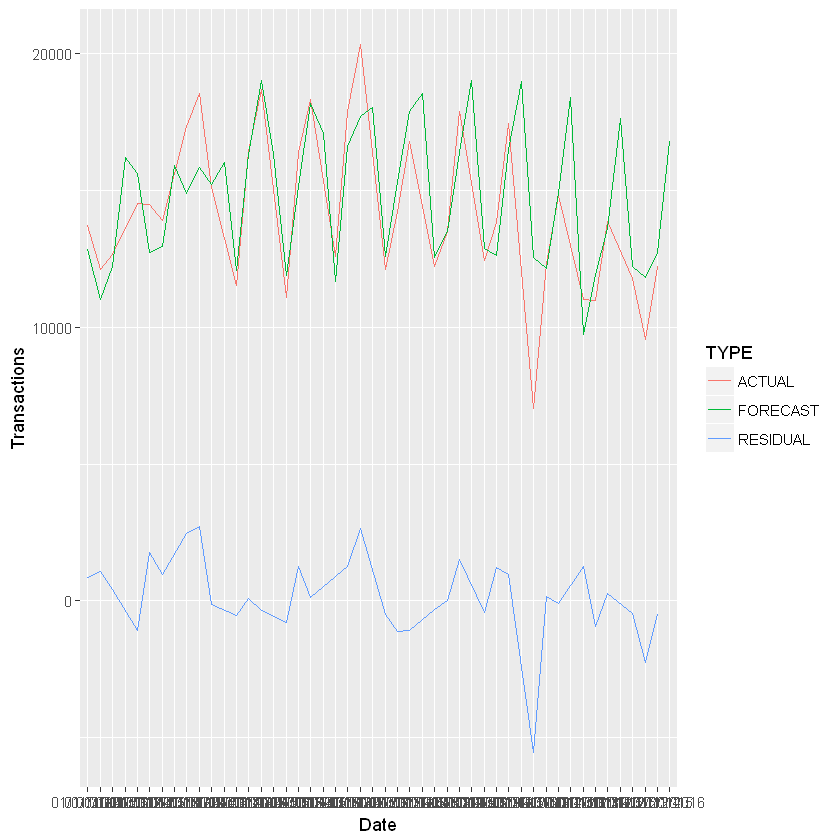

[1] "AVIS"
[1] "INBOUND LEISURE"
[1] 0.5412978


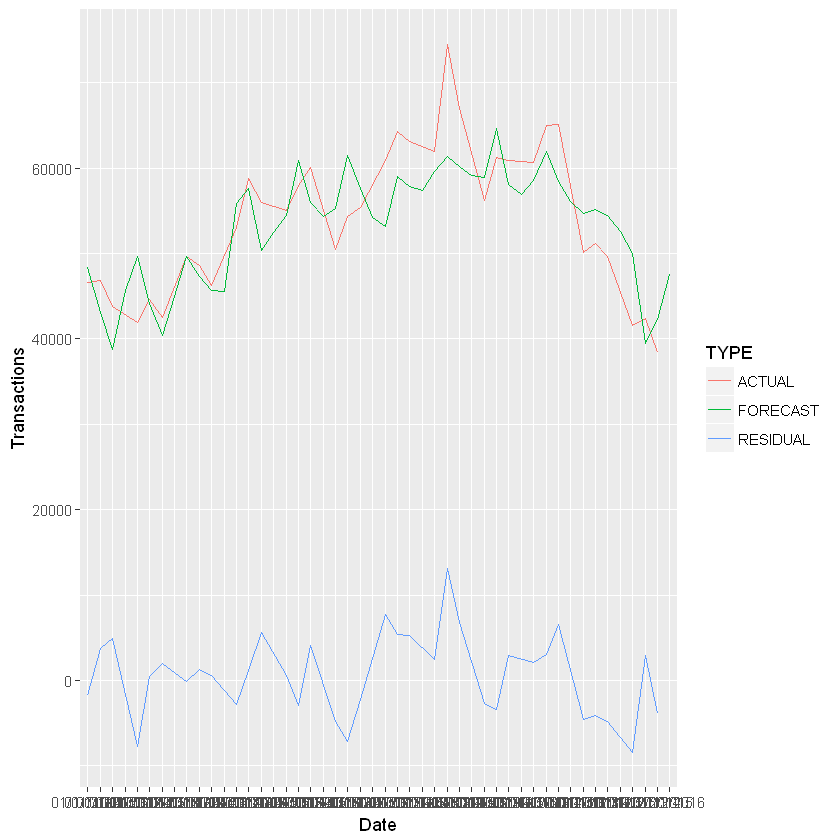

[1] "AVIS"
[1] "LARGE COMMERCIAL"
[1] 0.3345994


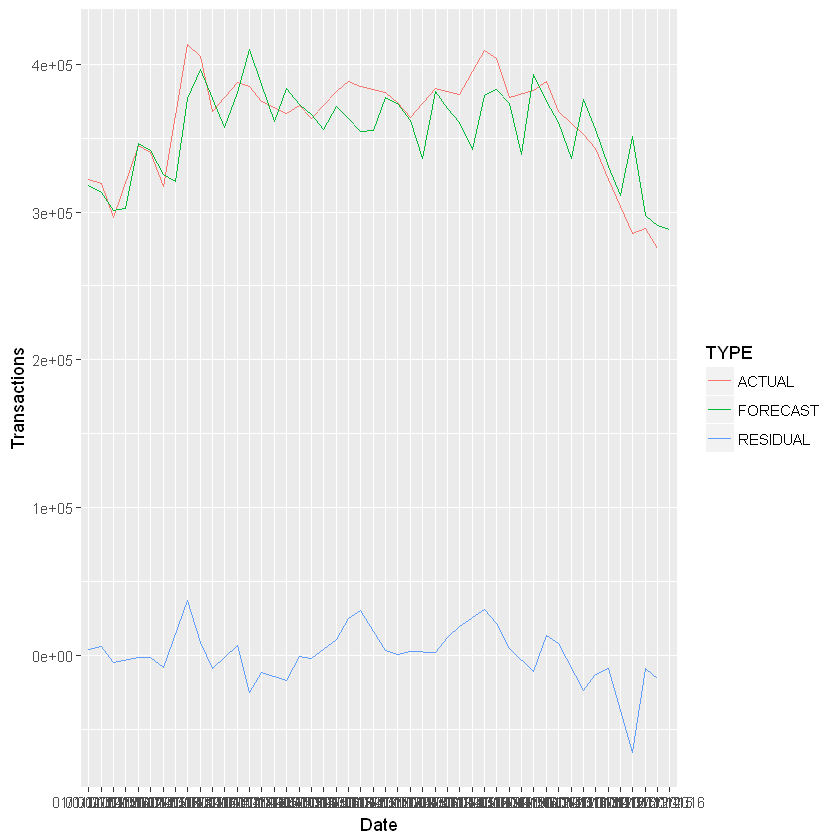

[1] "AVIS"
[1] "MARKETING"
[1] 3.037905


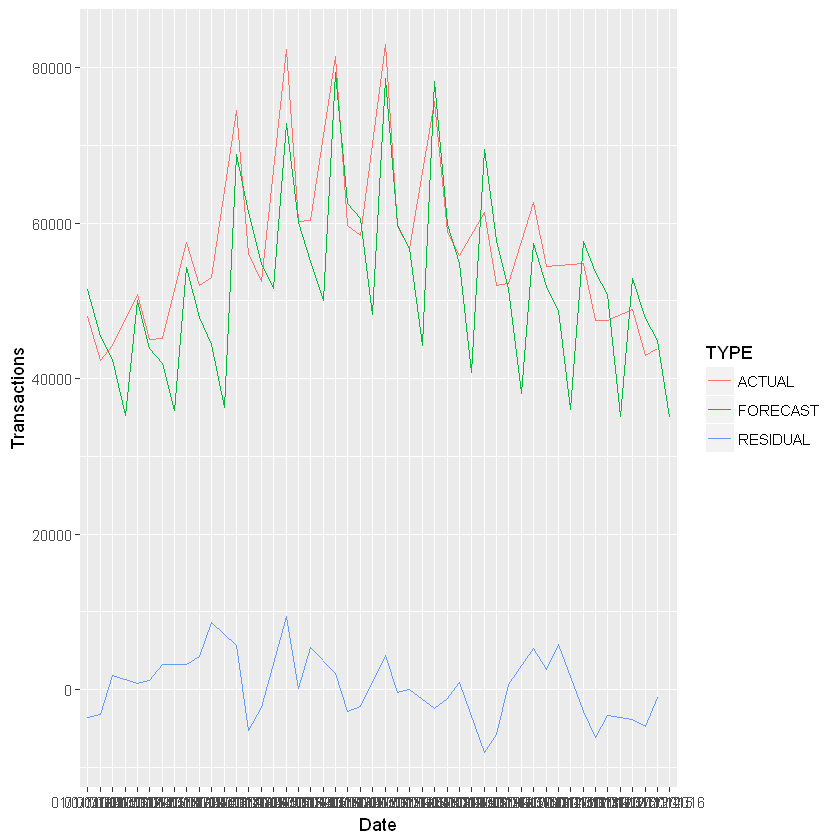

[1] "AVIS"
[1] "MID MARKET COMMERCIAL"
[1] 0.3296955


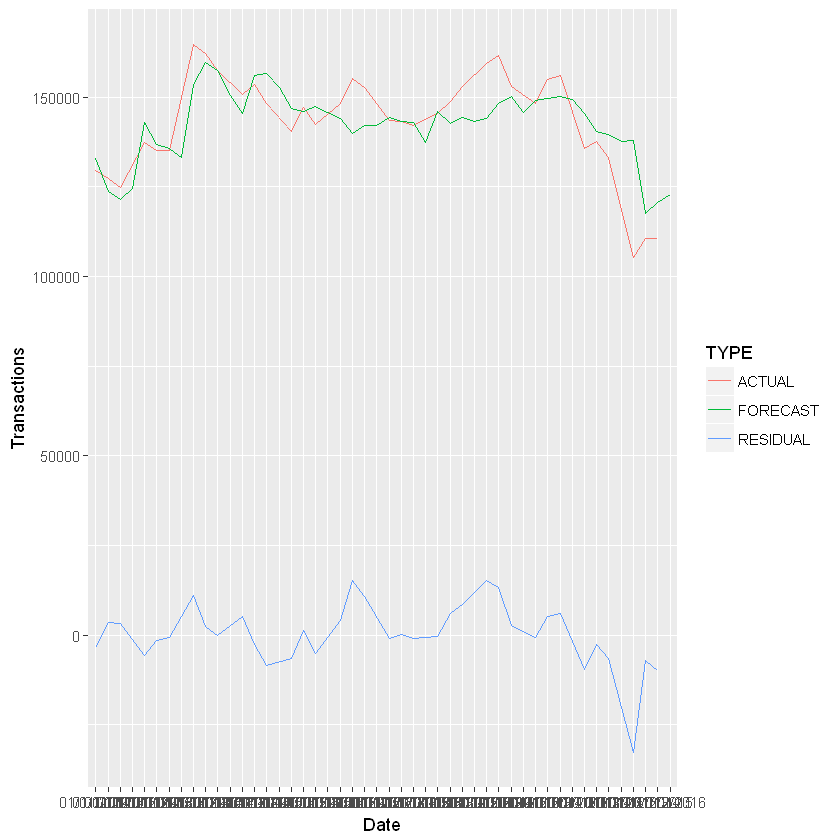

[1] "AVIS"
[1] "OPAQUE"
[1] 2.653602


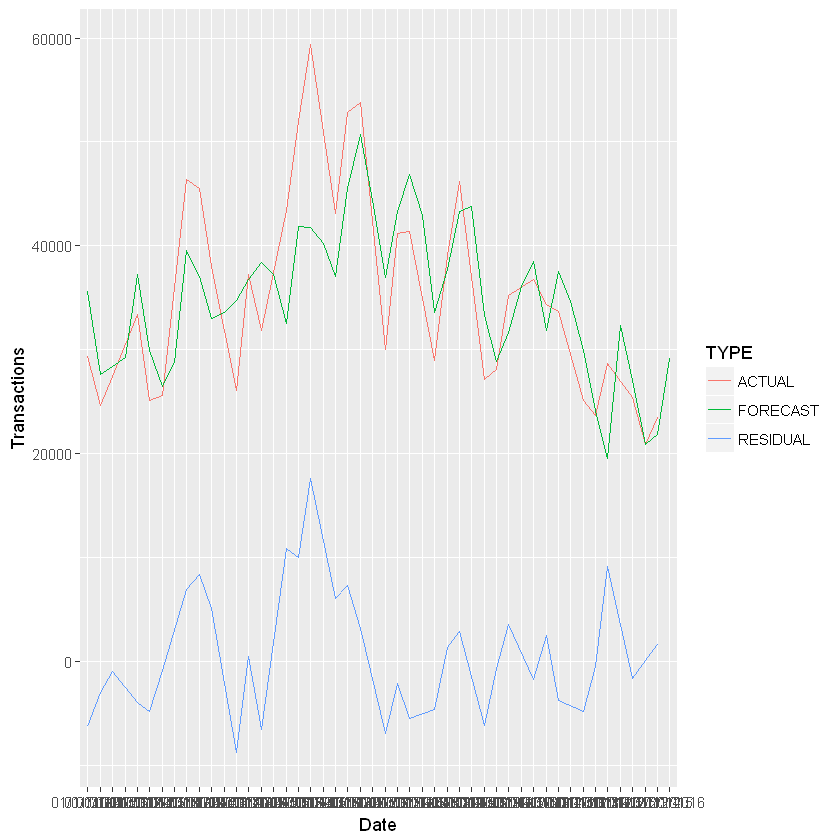

[1] "AVIS"
[1] "PARTNERSHIPS"
[1] 0.7774443


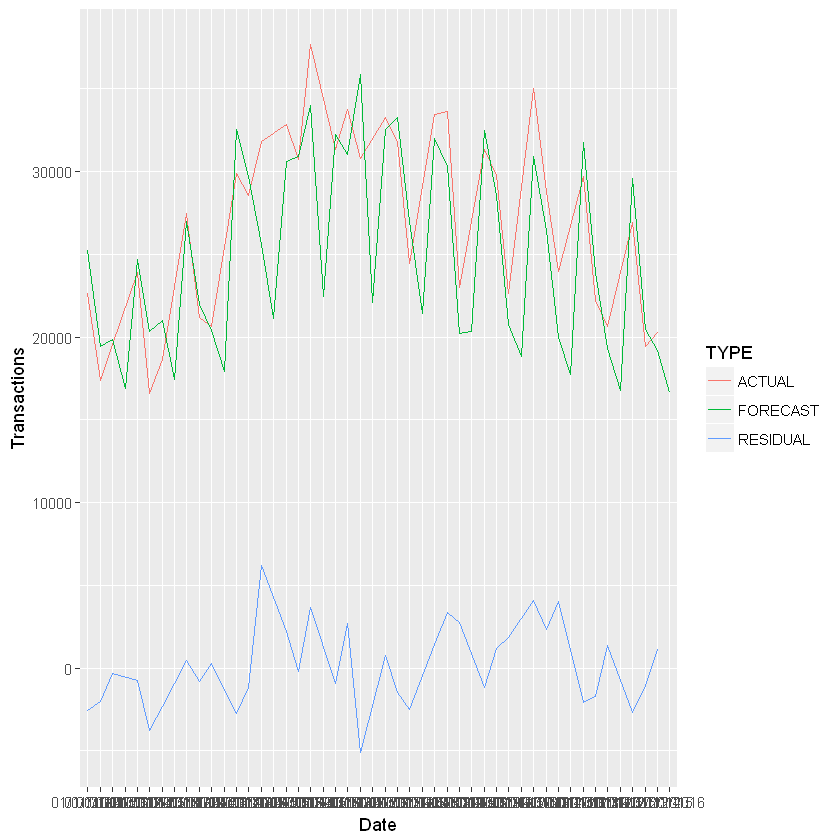

[1] "AVIS"
[1] "SMALL BUSINESS"
[1] 0.4121912


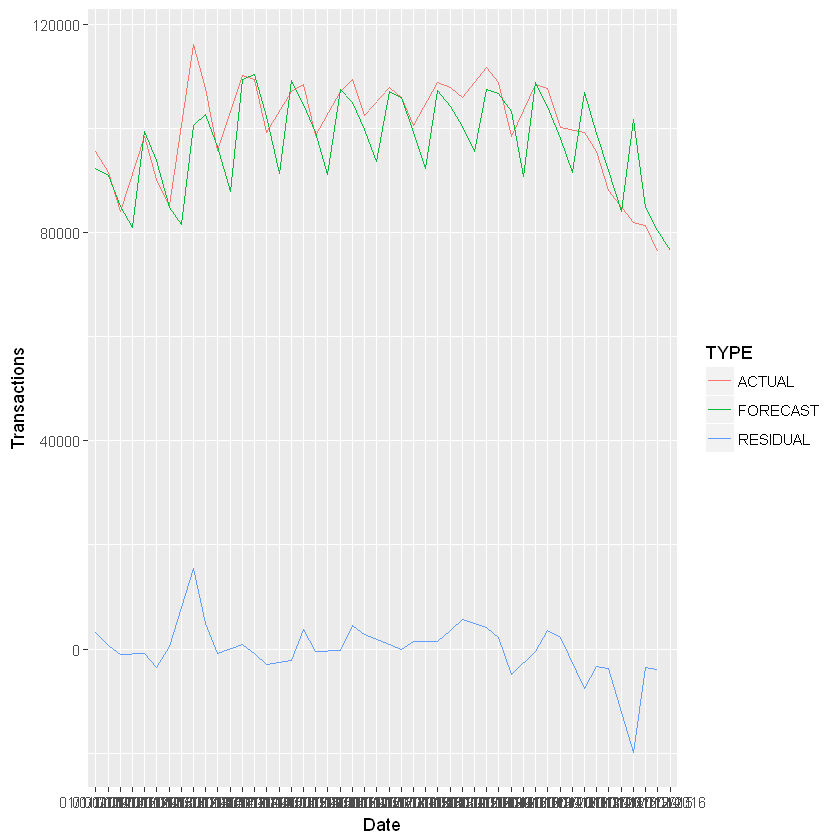

[1] "AVIS"
[1] "TOUR"
[1] 1.34011


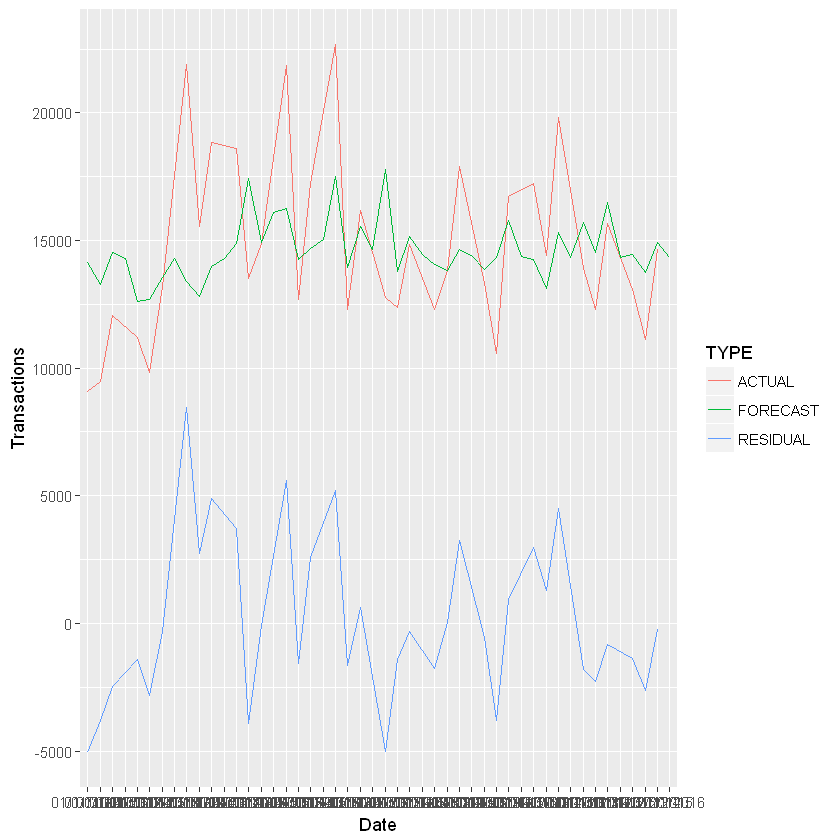

[1] "AVIS"
[1] "UNAFFILIATED - DISCOUNT"
[1] 2.251447


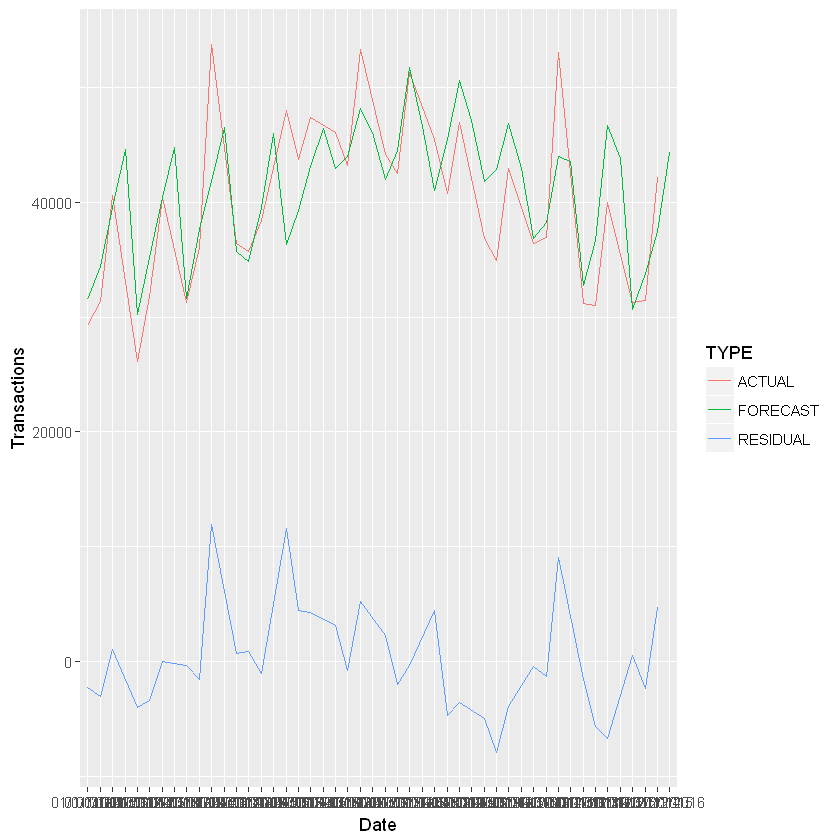

[1] "AVIS"
[1] "UNAFFILIATED"
[1] 0.6156934


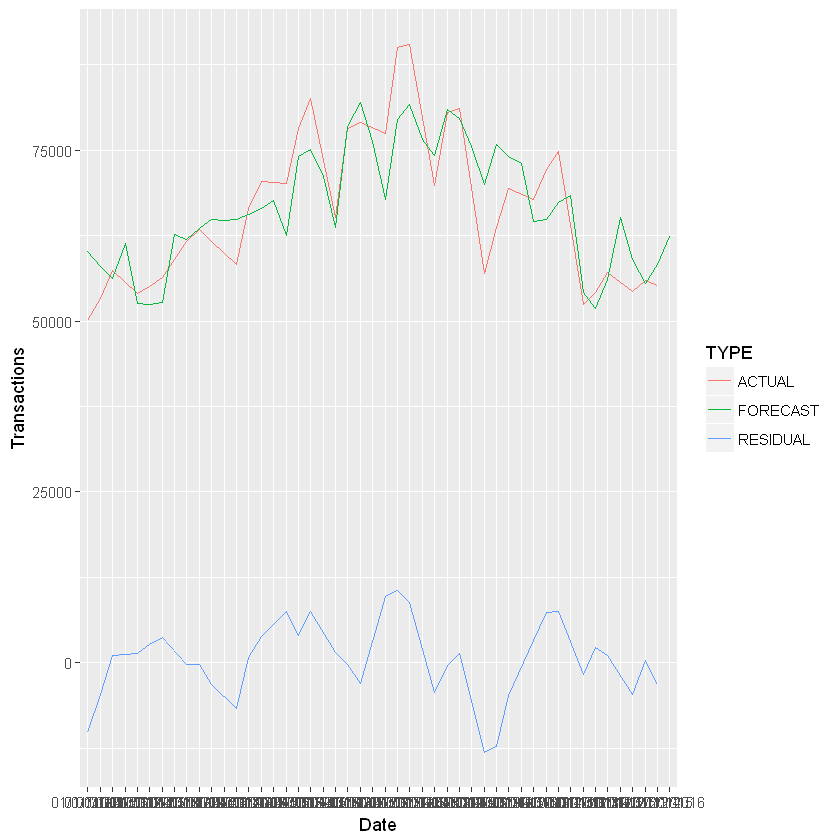

[1] "BUDG"
[1] "ASSOCIATIONS"
[1] 0.6169271


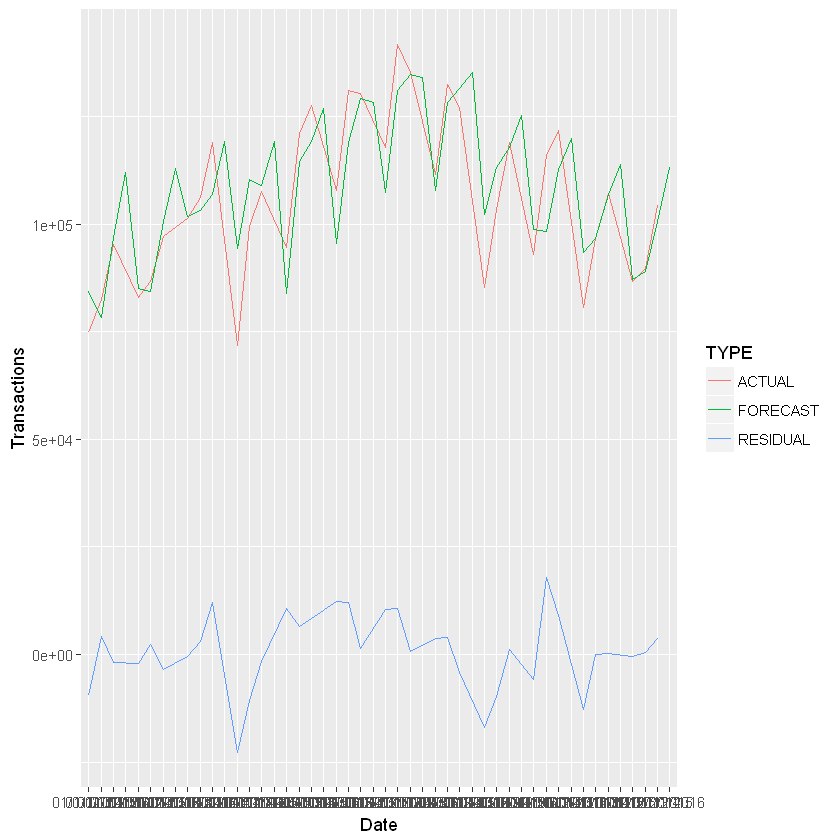

[1] "BUDG"
[1] "BUSINESS OTHER"
[1] 0.407546


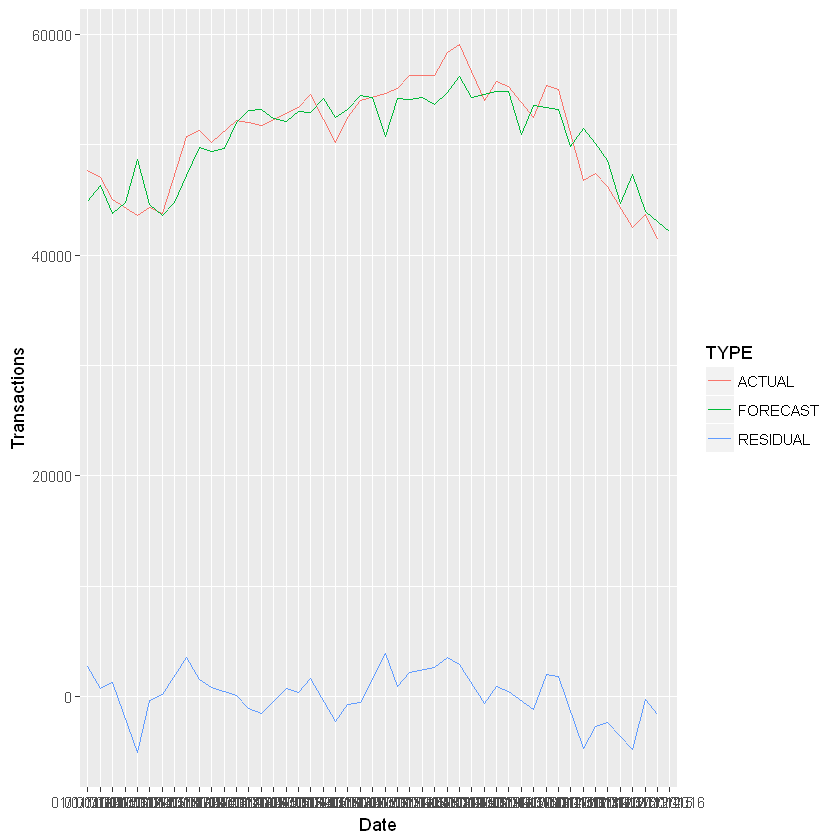

[1] "BUDG"
[1] "DAILY UNAFFILIATED"
[1] 0.818729


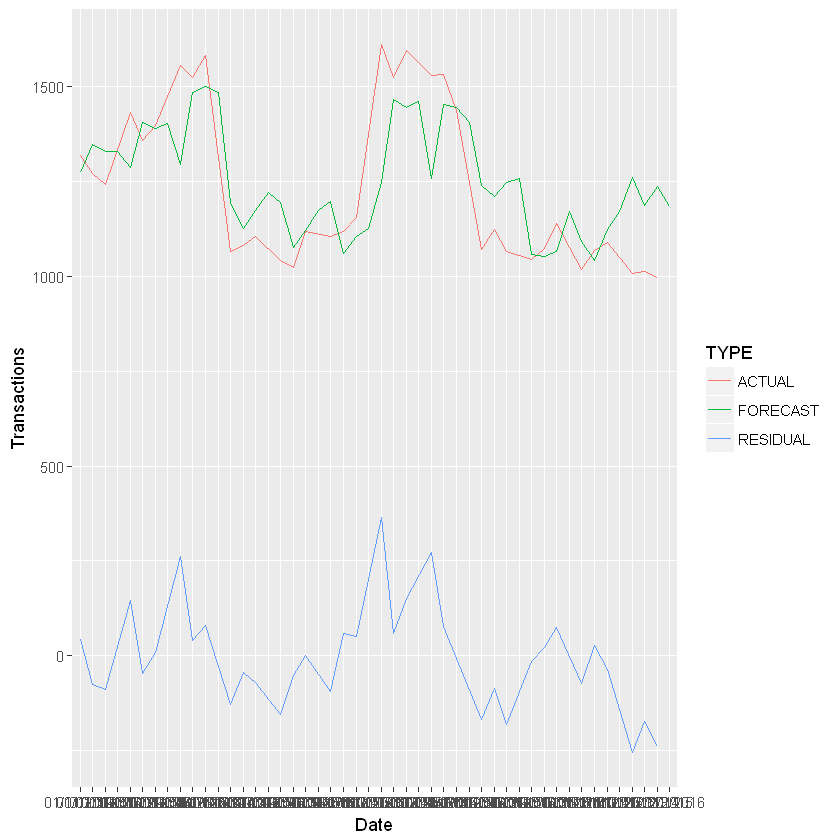

[1] "BUDG"
[1] "GOVERNMENT"
[1] 1.710662


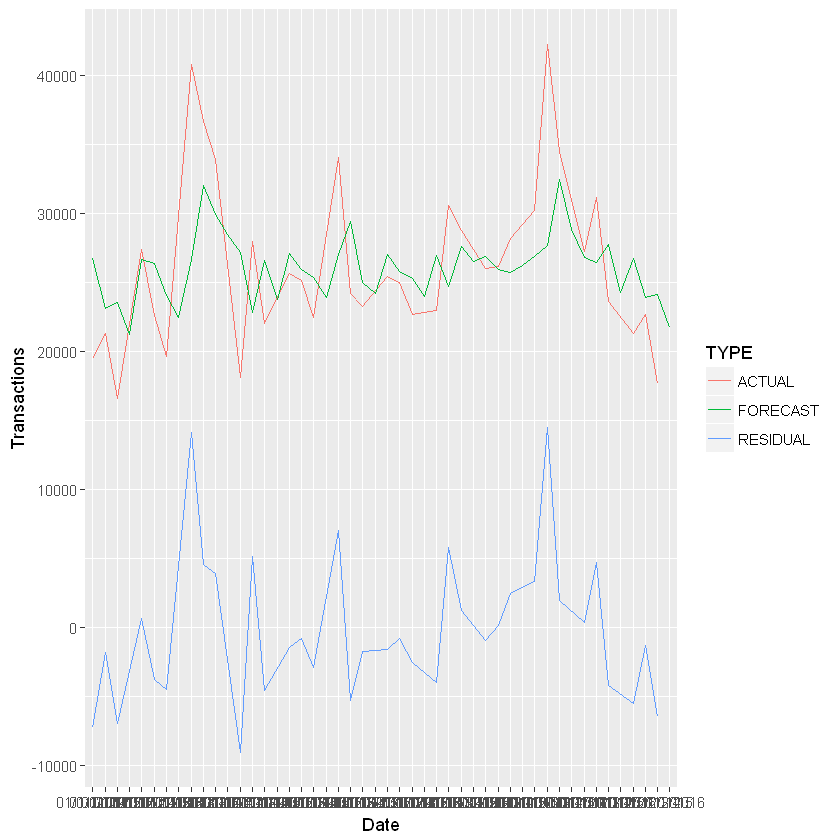

[1] "BUDG"
[1] "INBOUND LEISURE"
[1] 0.8665254


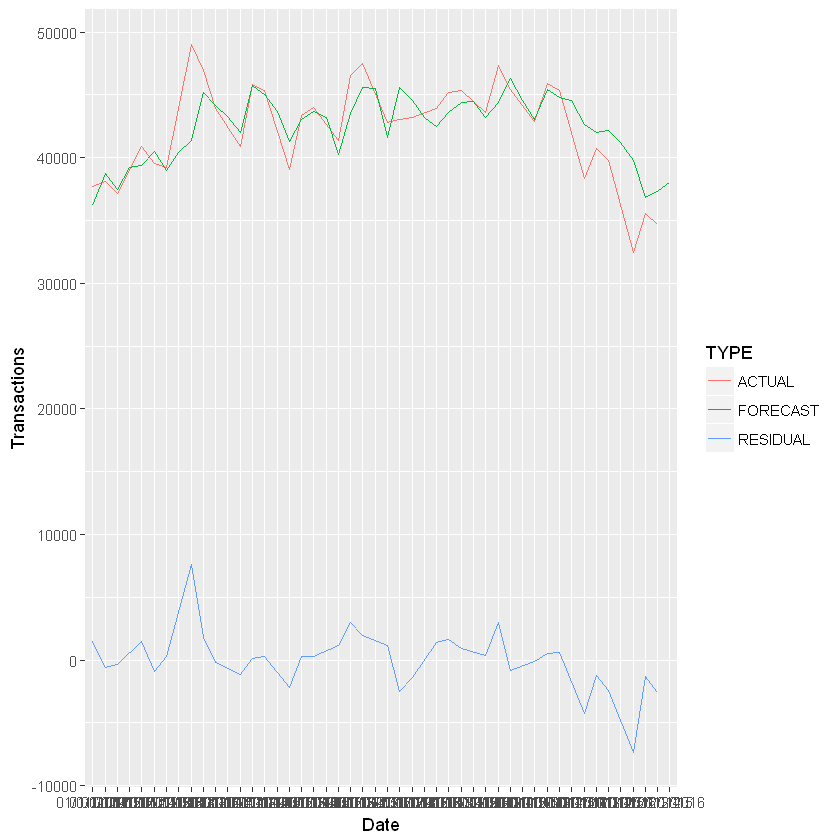

[1] "BUDG"
[1] "MARKETING"
[1] 2.487924


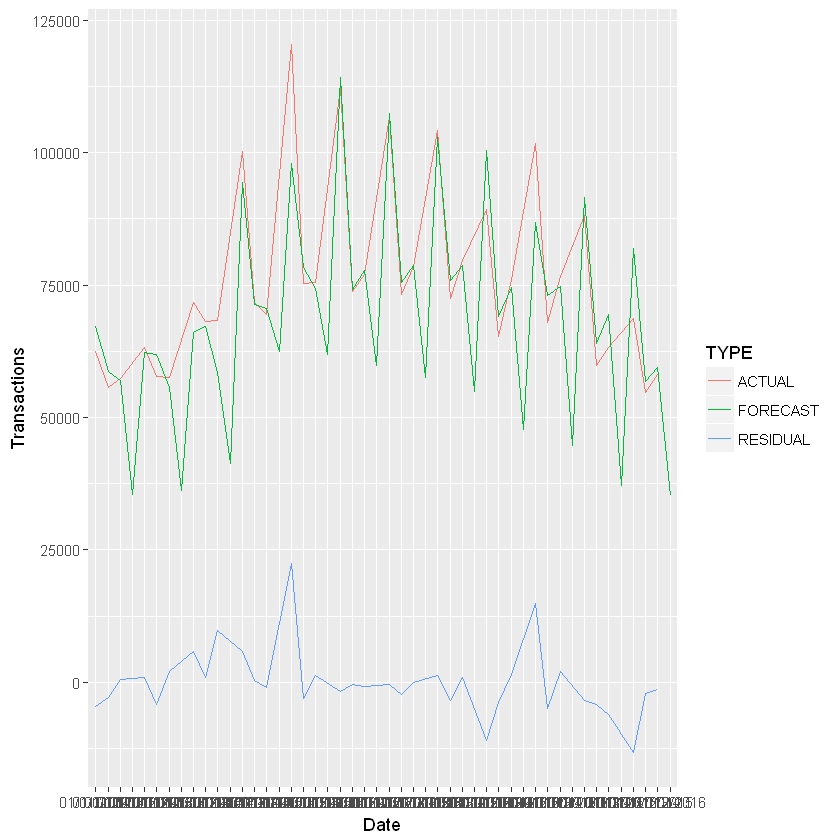

[1] "BUDG"
[1] "OPAQUE"
[1] 2.007467


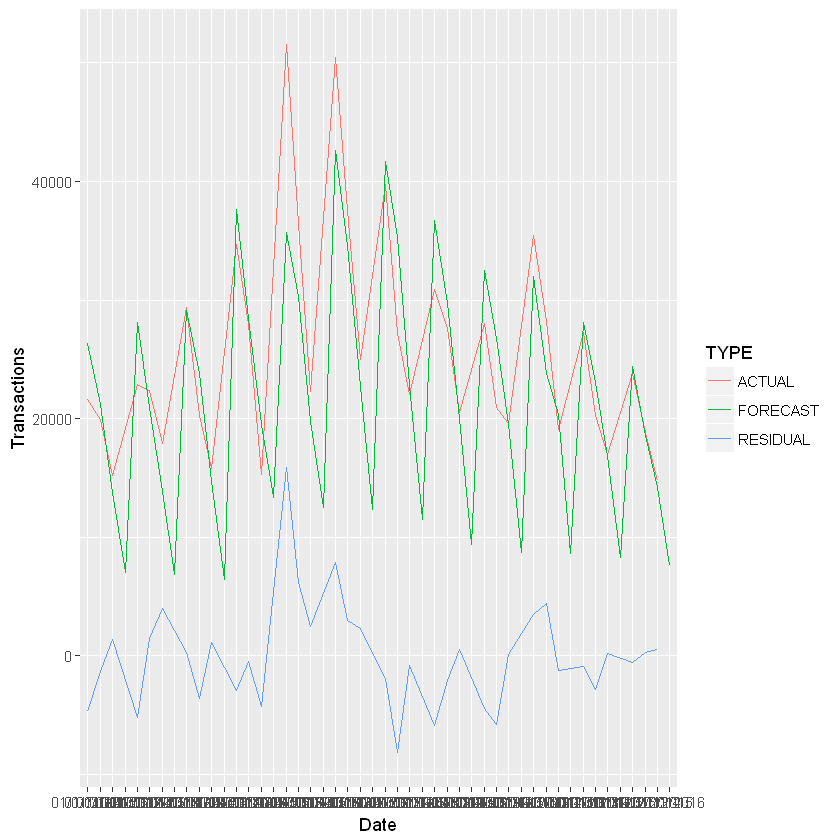

[1] "BUDG"
[1] "PARTNERSHIPS"
[1] 1.105525


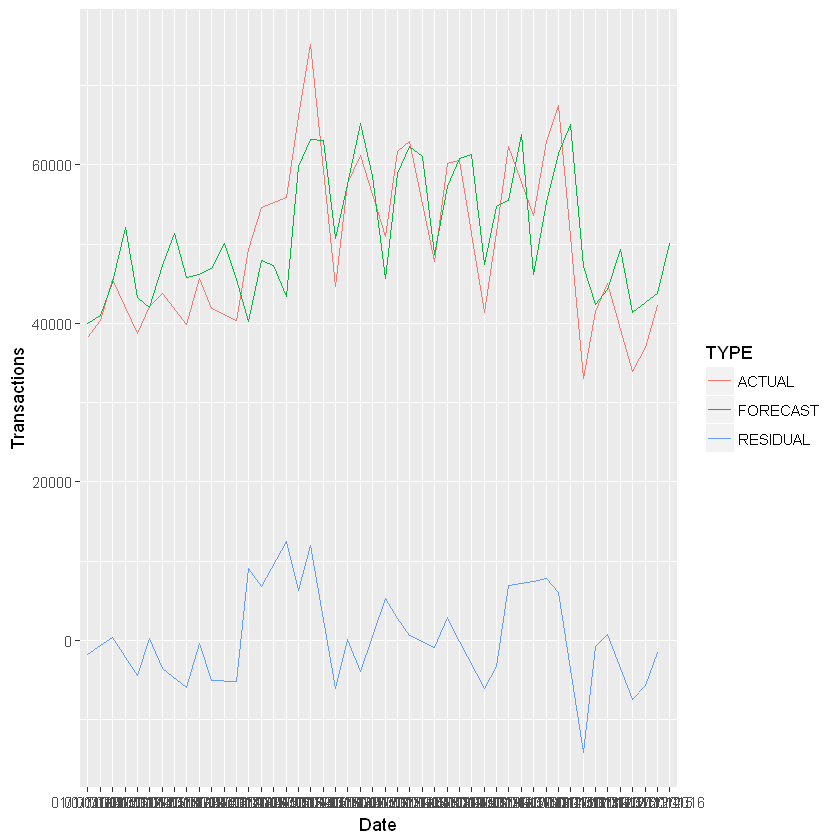

[1] "BUDG"
[1] "SMALL BUSINESS"
[1] 1.630676


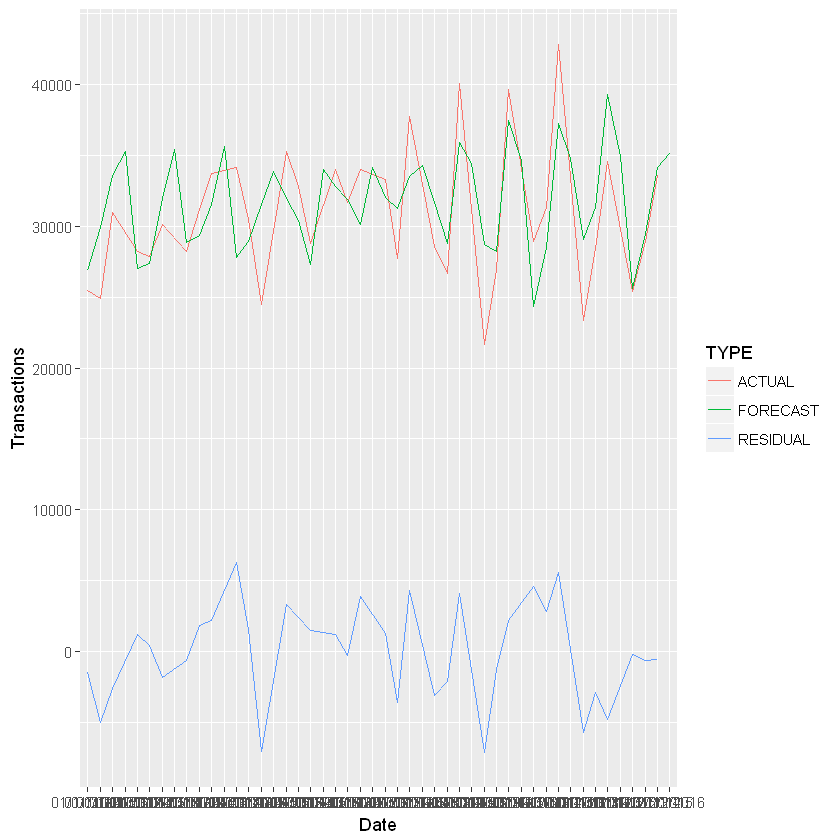

[1] "BUDG"
[1] "UNAFFILIATED - DISCOUNT"
[1] 1.820018


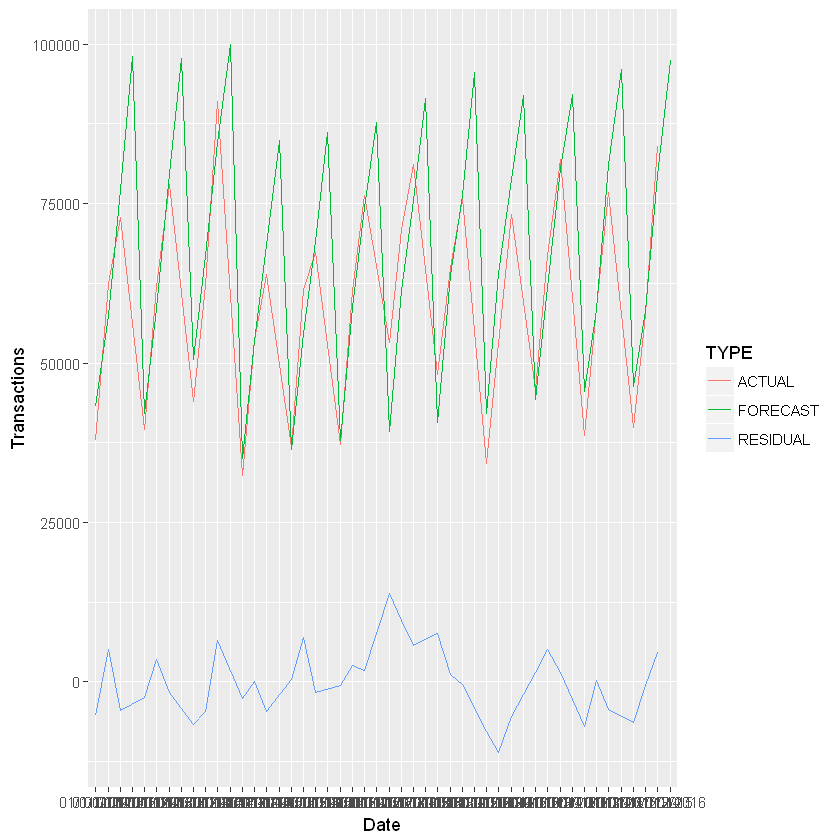

[1] "BUDG"
[1] "UNAFFILIATED"
[1] 0.6627311


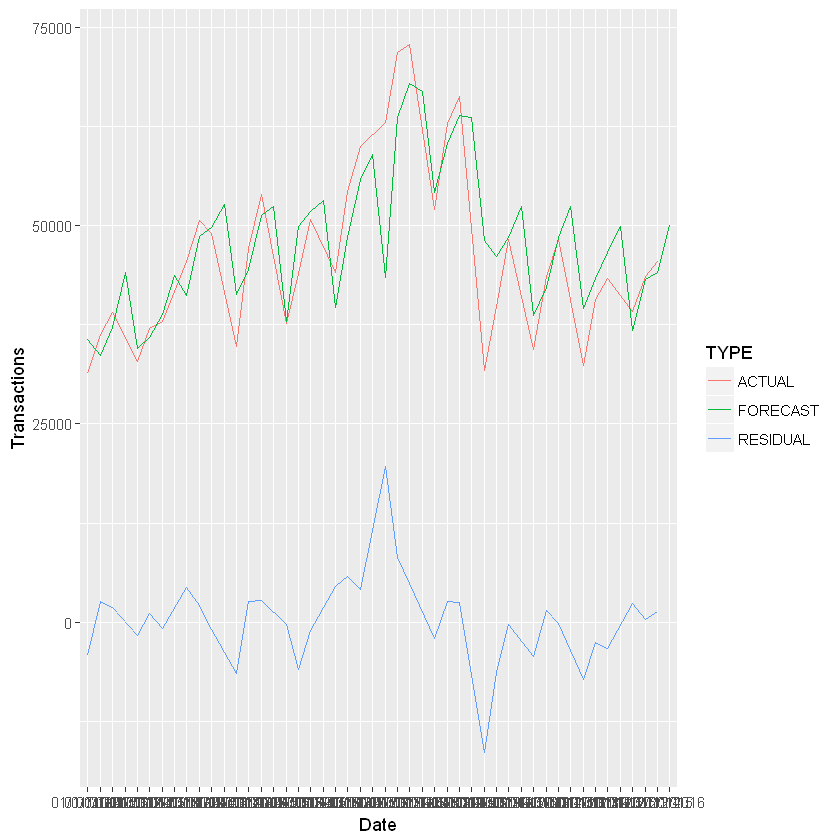

In [268]:
for (i in uni_brand){
    if (i == "AVIS"){
        for (j in uni_seg){
            pred_avis <-subset(pred,Brand==i & Forecast_Segment==j)
            pred_avis1 <-subset(pred_avis, TYPE=="ACTUAL" | TYPE =="FORECAST" | TYPE =="RESIDUAL")
            df <- pred_avis1[,c(1,2,3,4,6)]
            print(ggplot(df,aes(x=Date,y=Transactions,colour=TYPE,group=TYPE)) + geom_line())
            pred_avis <-subset(forecast_mape,Brand==i & Forecast_Segment==j)
            print (i)
            print (j)
            print (mean(sum(abs(pred_avis$Transactions -pred_avis$Transactions.FORECAST) / abs(pred_avis$Transactions))))
            }
        
    }
    else {
        subuni_seg <- uni_seg[-c(6,8,12)]
        for (j in subuni_seg){
            pred_avis <-subset(pred,Brand==i & Forecast_Segment==j)
            pred_avis1 <-subset(pred_avis, TYPE=="ACTUAL" | TYPE =="FORECAST" | TYPE =="RESIDUAL")
            df <- pred_avis1[,c(1,2,3,4,6)]
            print(ggplot(pred_avis1[,c(1,2,3,4,6)],aes(x=Date,y=Transactions,colour=TYPE,group=TYPE)) + geom_line())
            pred_avis <-subset(forecast_mape,Brand==i & Forecast_Segment==j)
            print (i)
            print (j)
            print (mean(sum(abs(pred_avis$Transactions -pred_avis$Transactions.FORECAST) / abs(pred_avis$Transactions))))
        }
    }
}

##### Plot and Calculate Forecast MAPE for T&M

In [275]:
Transaction_data<-reshape(pred[,c(1,2,3,4,7)], timevar="TYPE", idvar=c("Brand","Forecast_Segment", "Date"), direction="wide")

In [276]:
head(Transaction_data[,1:6])

,Brand,Forecast_Segment,Date,Time_And_Mileage.ACTUAL,Time_And_Mileage.FORECAST,Time_And_Mileage.RESIDUAL
1,AVIS,ASSOCIATIONS,01/04/2013,13085559,16466245,-3380686.0
4,AVIS,ASSOCIATIONS,01/05/2013,14404442,14636659,-232217.2
7,AVIS,ASSOCIATIONS,01/06/2013,16458533,15449702,1008831.1
10,AVIS,ASSOCIATIONS,01/07/2013,23748057,16687193,7060863.9
13,AVIS,ASSOCIATIONS,01/08/2013,21902530,20947193,955337.4
16,AVIS,ASSOCIATIONS,01/09/2013,14313658,19933365,-5619707.3


In [277]:
forecast_data <- merge(Transaction_data[,c(1,2,3,5)], data[,c(2,3,4,6)], by=c("Brand","Forecast_Segment", "Date"))

,Brand,Forecast_Segment,Date,TYPE,Time_And_Mileage
2017,BUDG,ASSOCIATIONS,01/04/2013,ACTUAL,12642536.0
2018,BUDG,ASSOCIATIONS,01/04/2013,FORECAST,17923957.9
2019,BUDG,ASSOCIATIONS,01/04/2013,RESIDUAL,-5281421.9
2020,BUDG,ASSOCIATIONS,01/05/2013,ACTUAL,14640290.0
2021,BUDG,ASSOCIATIONS,01/05/2013,FORECAST,15331703.6
2022,BUDG,ASSOCIATIONS,01/05/2013,RESIDUAL,-691413.6
2023,BUDG,ASSOCIATIONS,01/06/2013,ACTUAL,19507815.0
2024,BUDG,ASSOCIATIONS,01/06/2013,FORECAST,16369731.0
2025,BUDG,ASSOCIATIONS,01/06/2013,RESIDUAL,3138084.0
2026,BUDG,ASSOCIATIONS,01/07/2013,ACTUAL,26393328.0


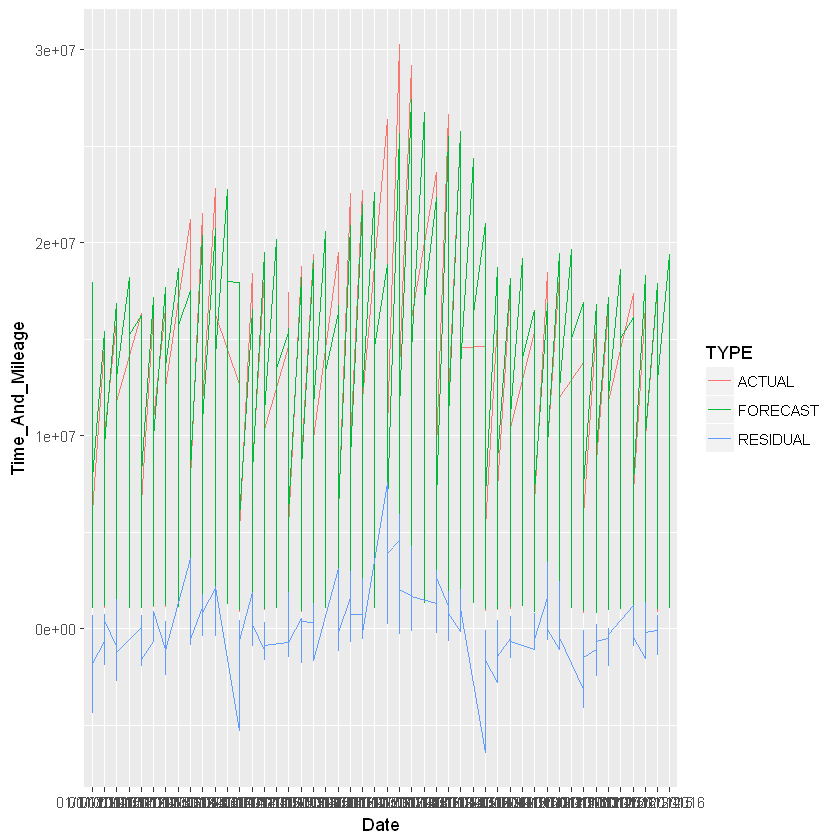

In [278]:
pred_avis <-subset(pred,Brand=="BUDG")
pred_avis1 <-subset(pred_avis, TYPE=="ACTUAL" | TYPE =="FORECAST" | TYPE =="RESIDUAL")
df <- pred_avis1[,c(1,2,3,4,7)]
print(ggplot(df,aes(x=Date,y=Time_And_Mileage,colour=TYPE,group=TYPE)) + geom_line())
df

[1] "AVIS"
[1] "ASSOCIATIONS"
[1] 0.9522692


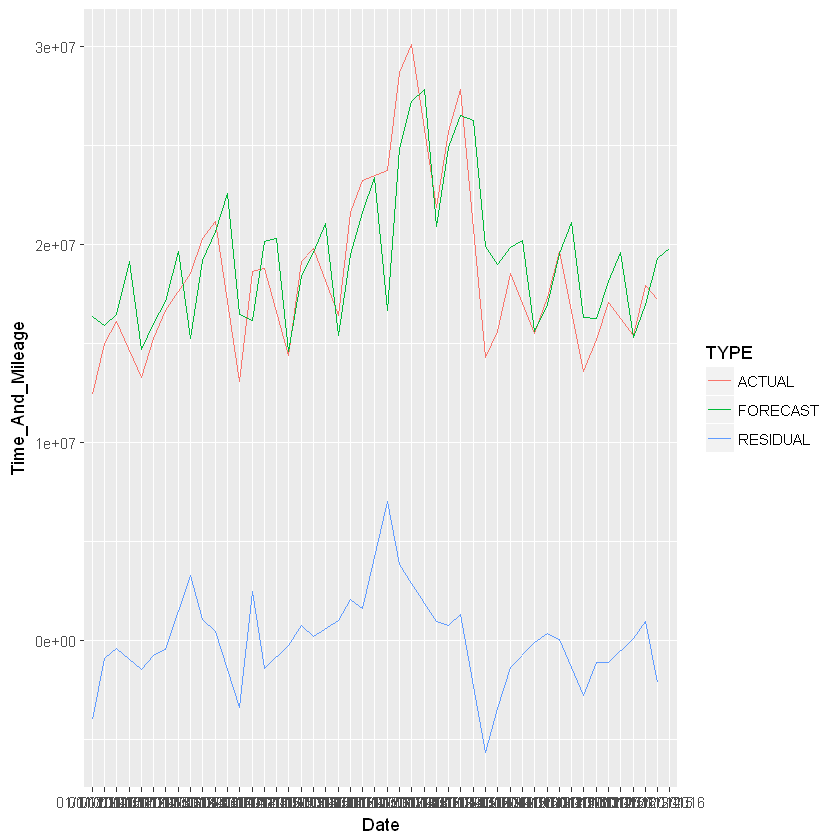

[1] "AVIS"
[1] "BUSINESS OTHER"
[1] 1.353481


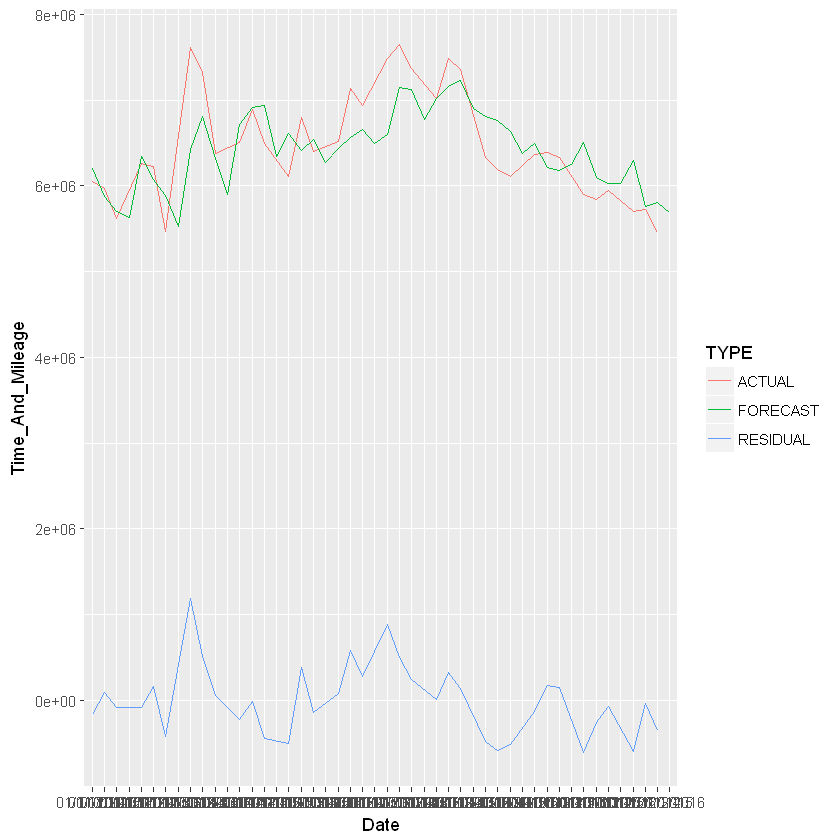

[1] "AVIS"
[1] "DAILY UNAFFILIATED"
[1] 0.610616


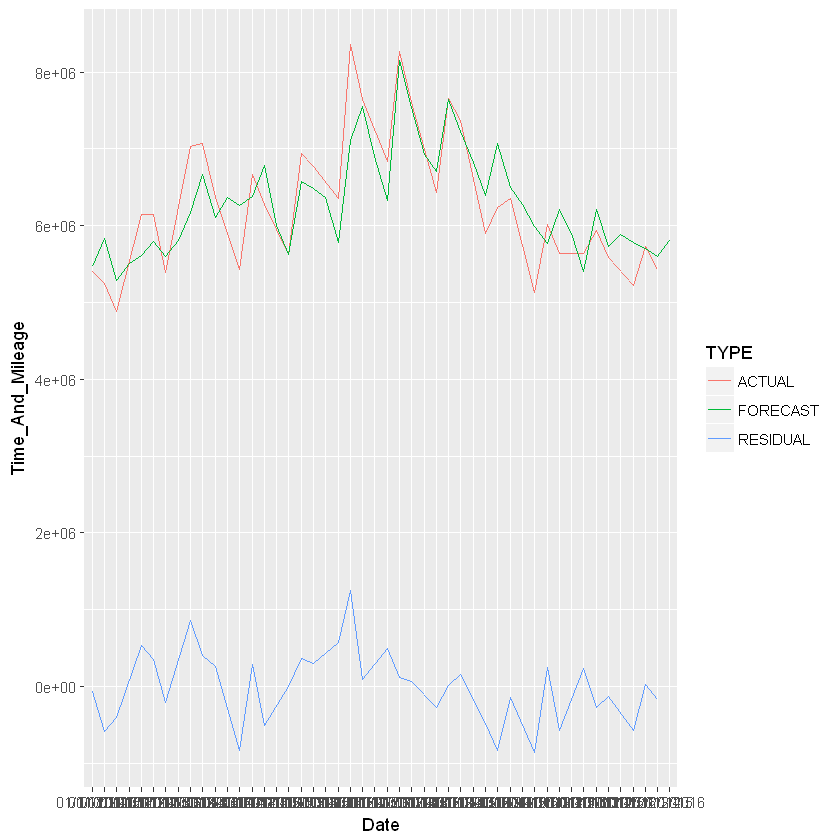

[1] "AVIS"
[1] "GOVERNMENT"
[1] 1.044493


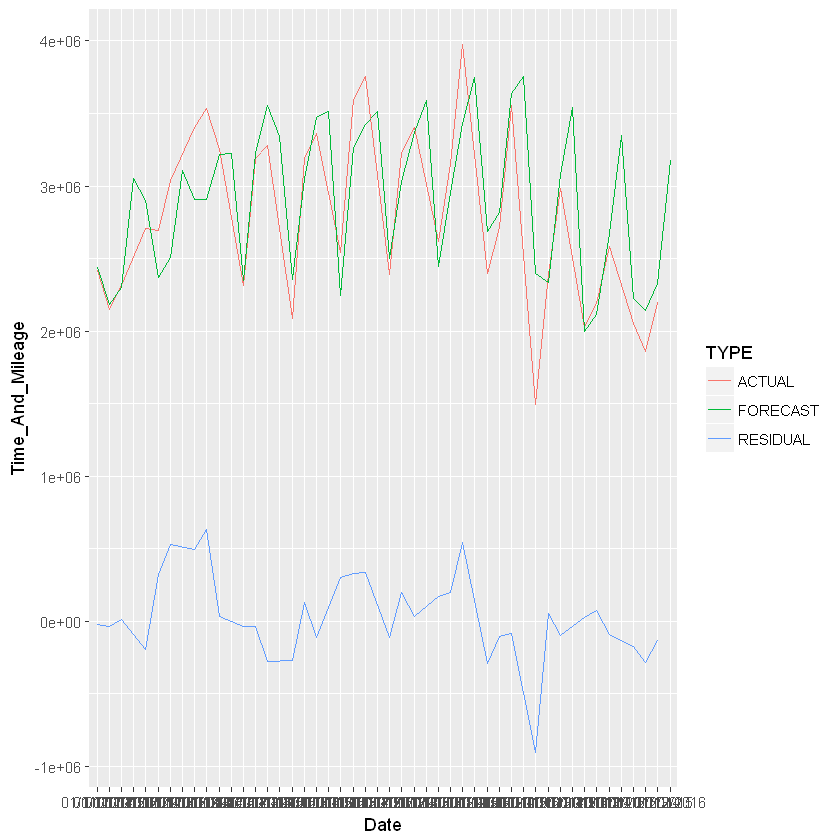

[1] "AVIS"
[1] "INBOUND LEISURE"
[1] 0.7954314


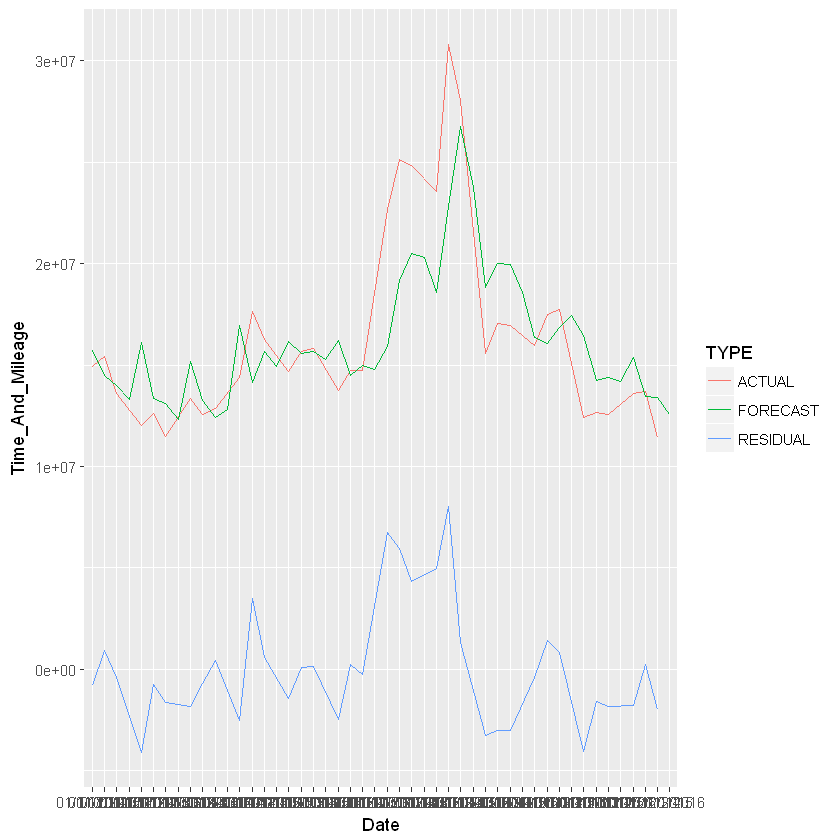

[1] "AVIS"
[1] "LARGE COMMERCIAL"
[1] 0.3186437


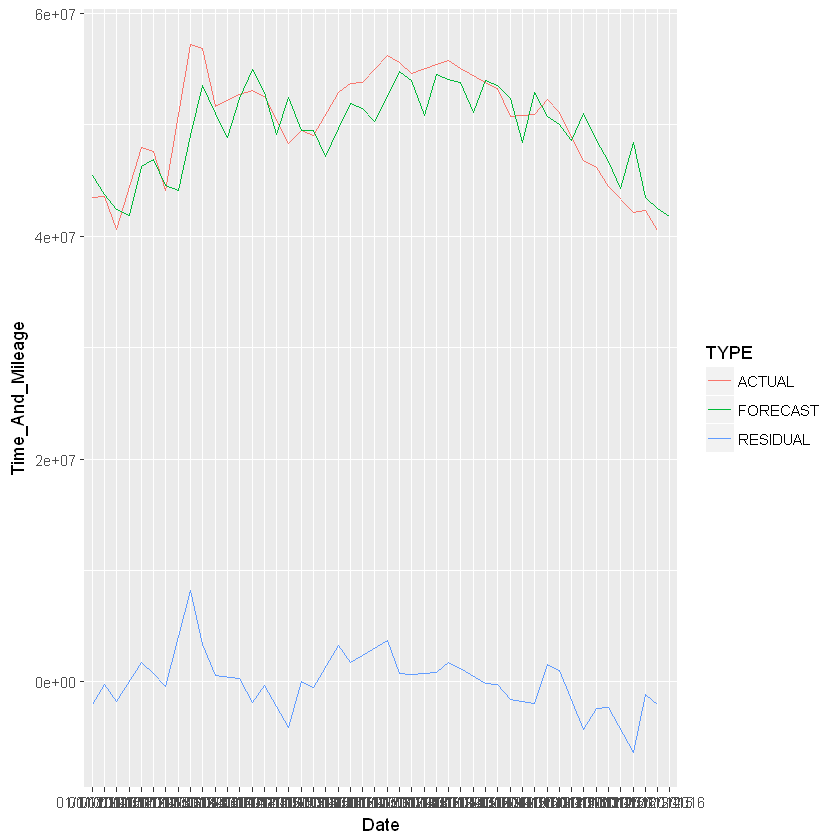

[1] "AVIS"
[1] "MARKETING"
[1] 2.3623


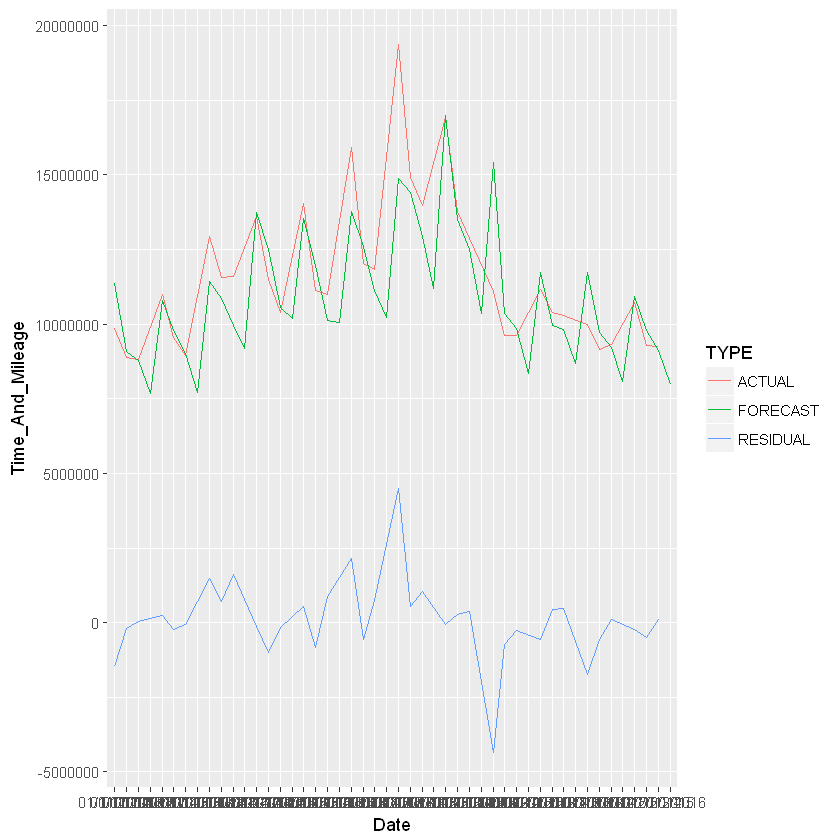

[1] "AVIS"
[1] "MID MARKET COMMERCIAL"
[1] 0.2487497


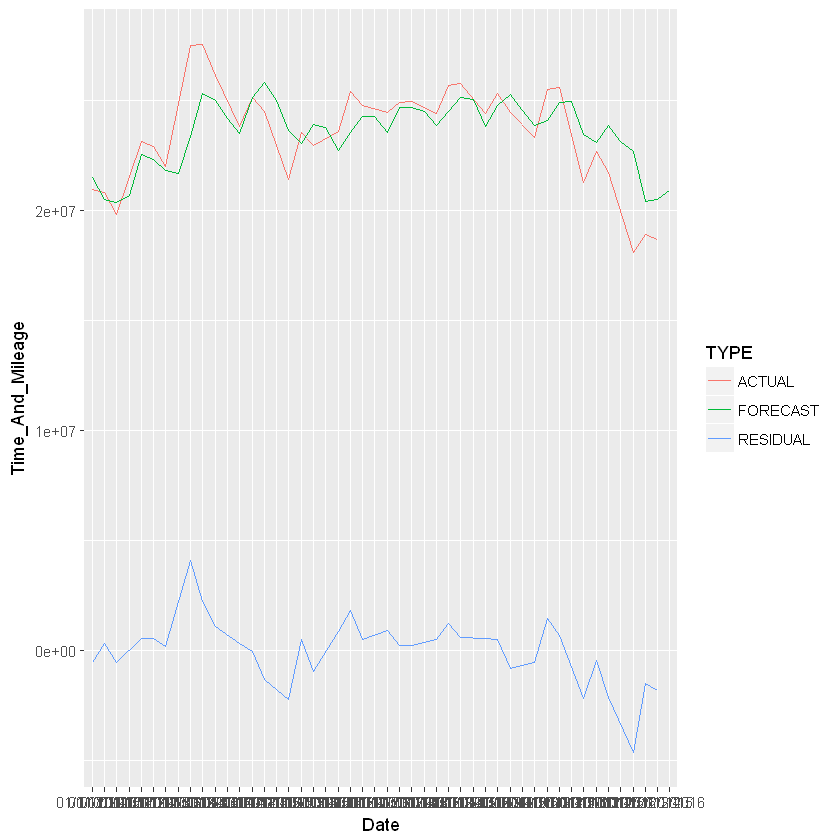

[1] "AVIS"
[1] "OPAQUE"
[1] 1.560462


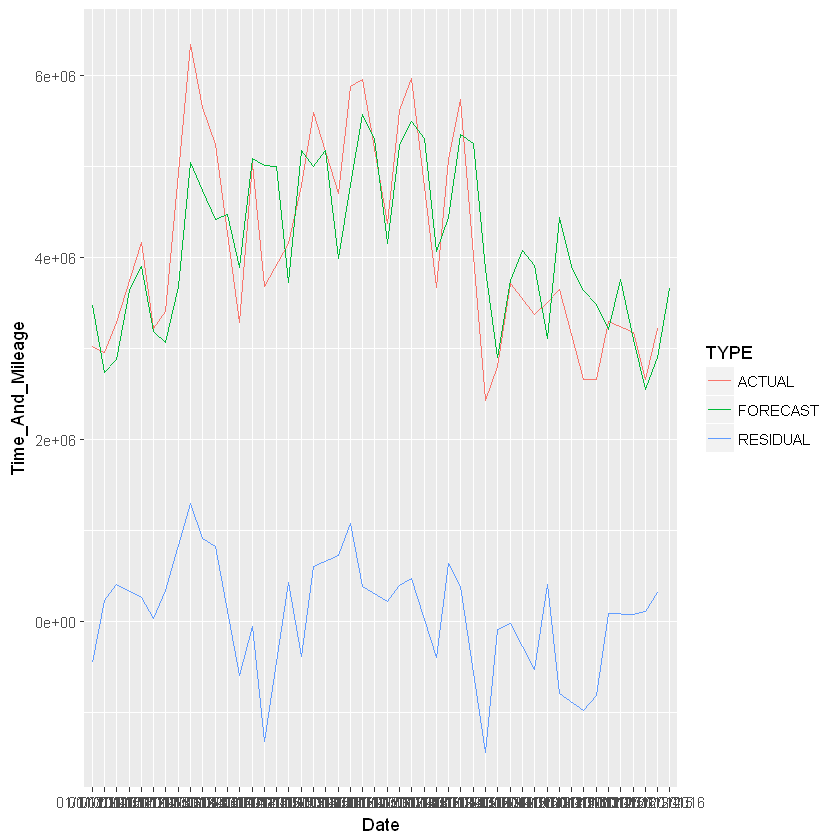

[1] "AVIS"
[1] "PARTNERSHIPS"
[1] 1.365774


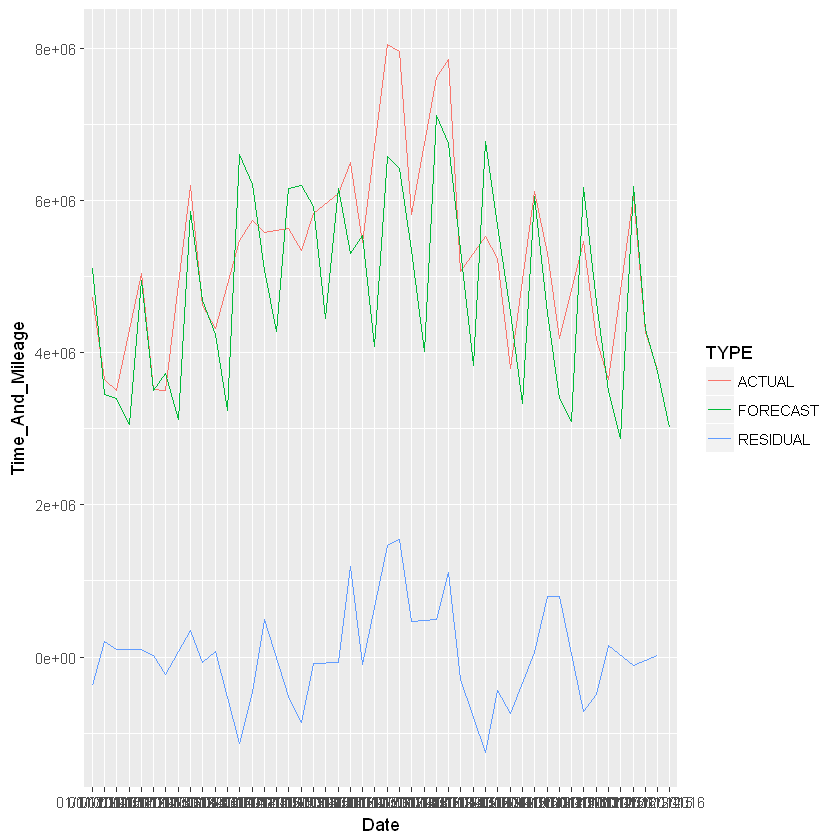

[1] "AVIS"
[1] "SMALL BUSINESS"
[1] 0.3800516


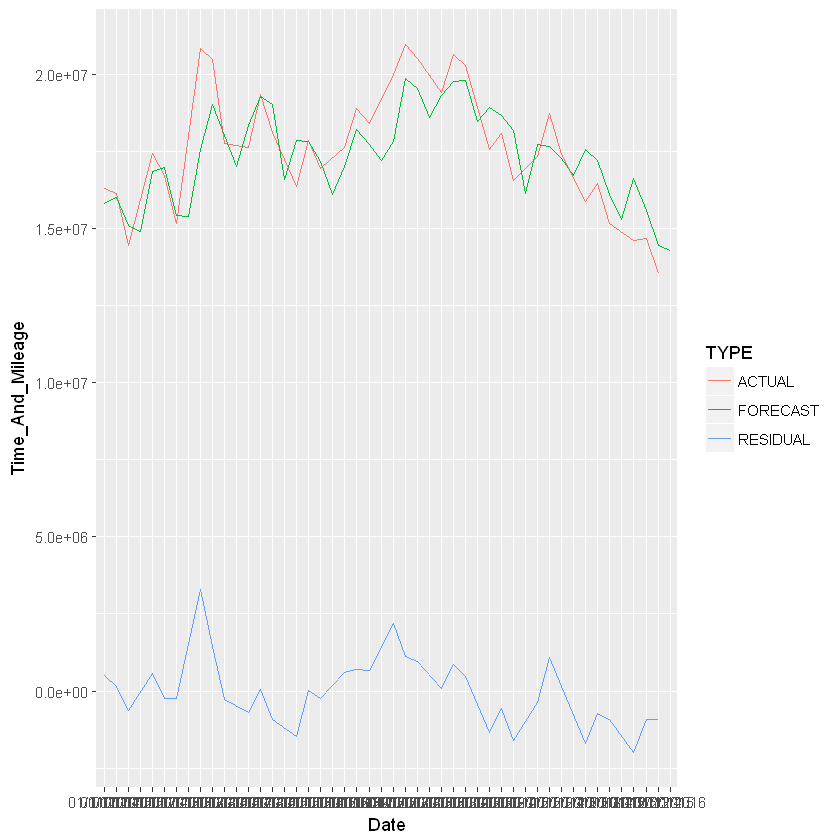

[1] "AVIS"
[1] "TOUR"
[1] 1.183904


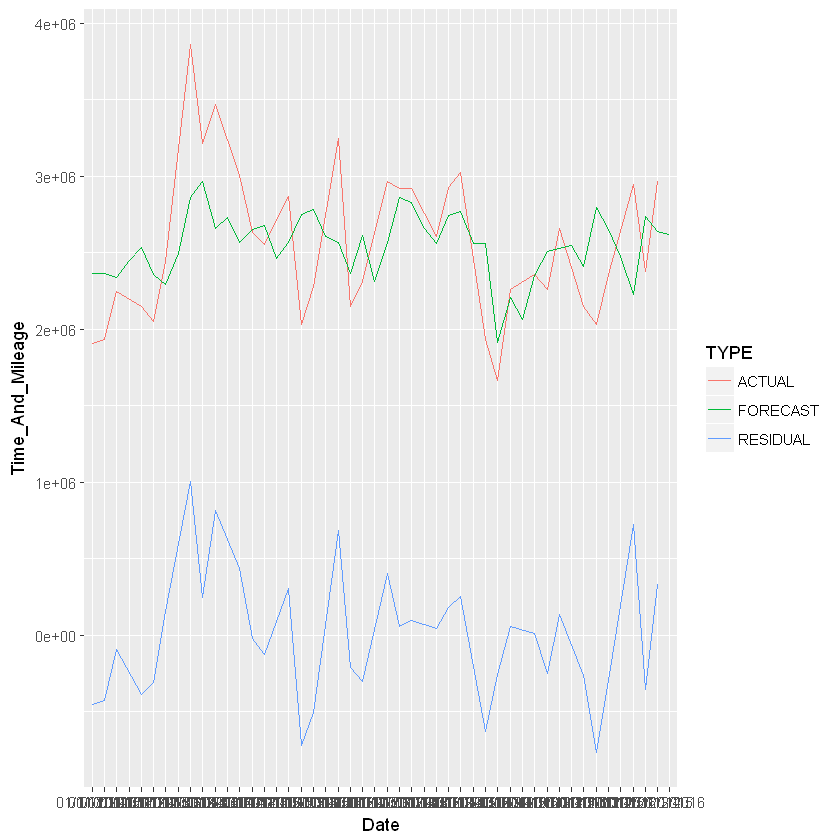

[1] "AVIS"
[1] "UNAFFILIATED - DISCOUNT"
[1] 1.81917


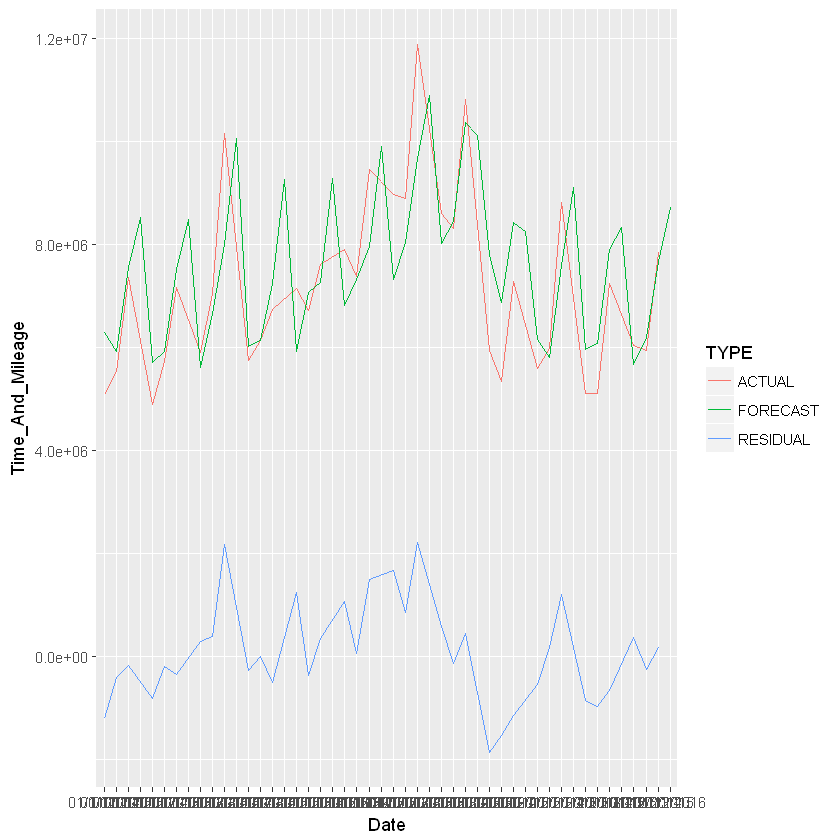

[1] "AVIS"
[1] "UNAFFILIATED"
[1] 0.4303501


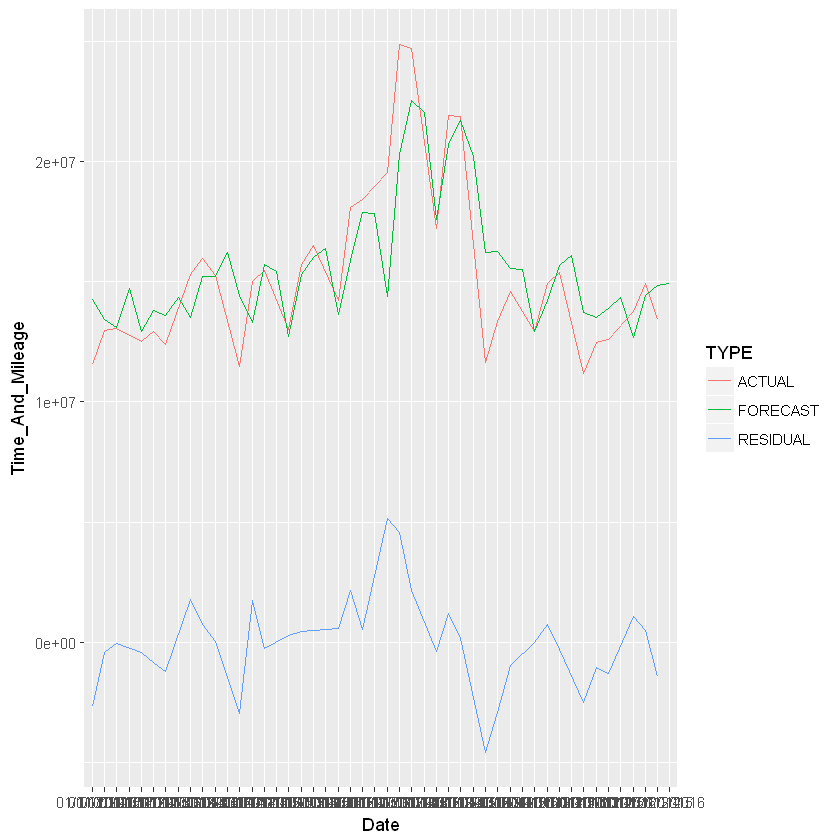

[1] "BUDG"
[1] "ASSOCIATIONS"
[1] 0.6372097


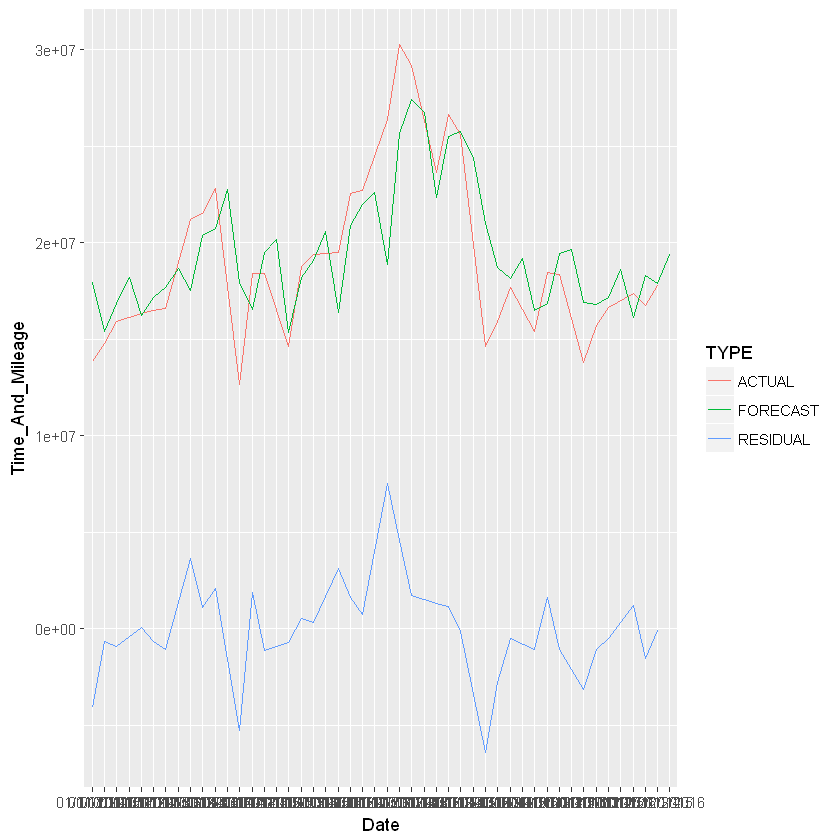

[1] "BUDG"
[1] "BUSINESS OTHER"
[1] 0.9255787


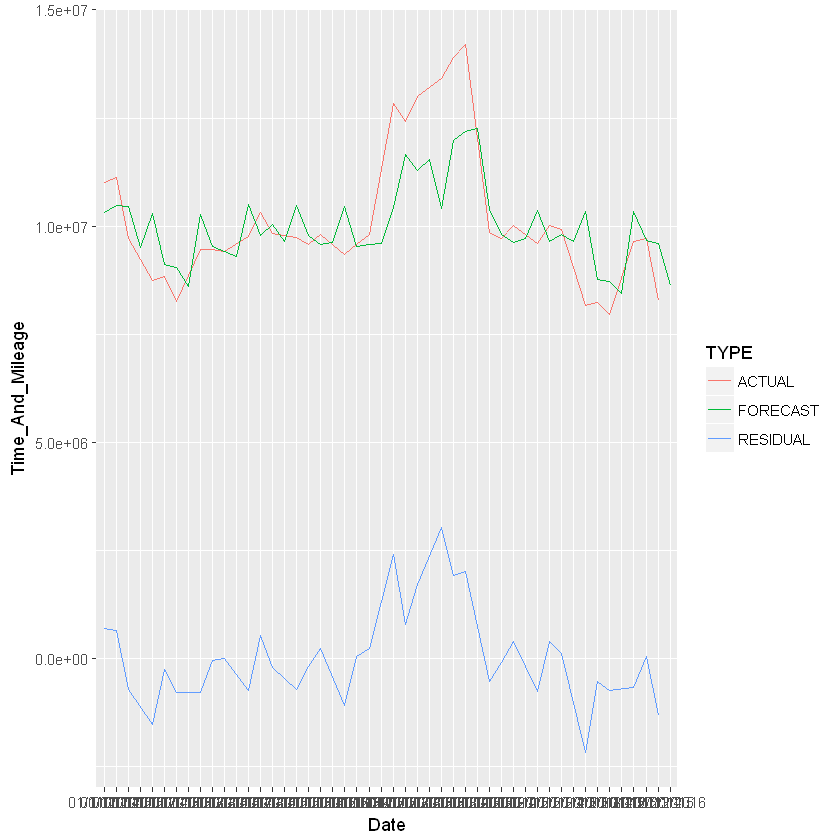

[1] "BUDG"
[1] "DAILY UNAFFILIATED"
[1] 0.9928245


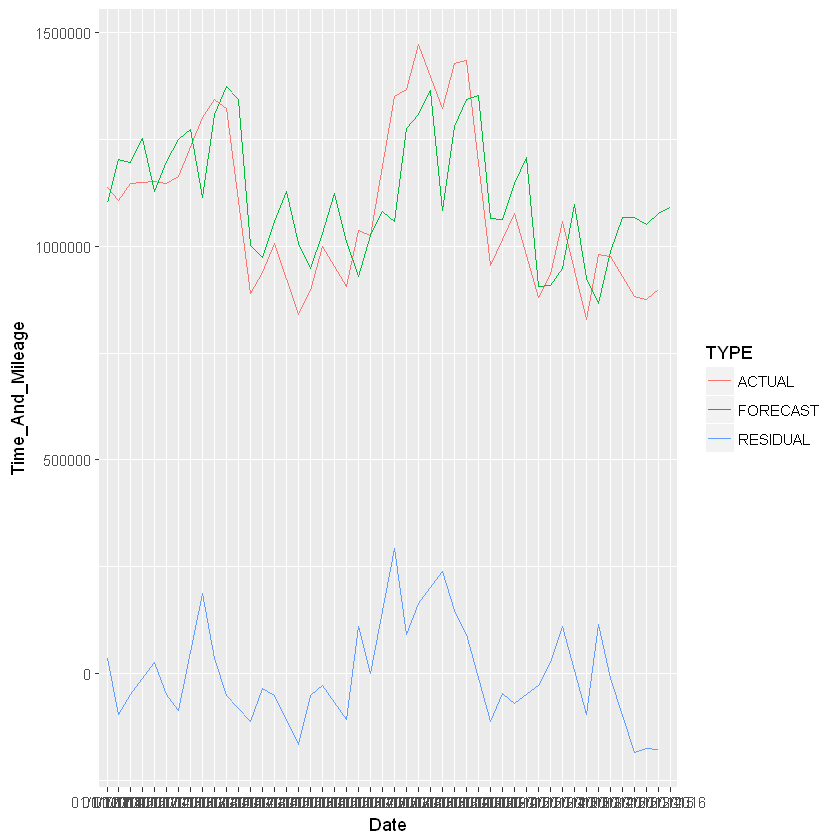

[1] "BUDG"
[1] "GOVERNMENT"
[1] 1.116517


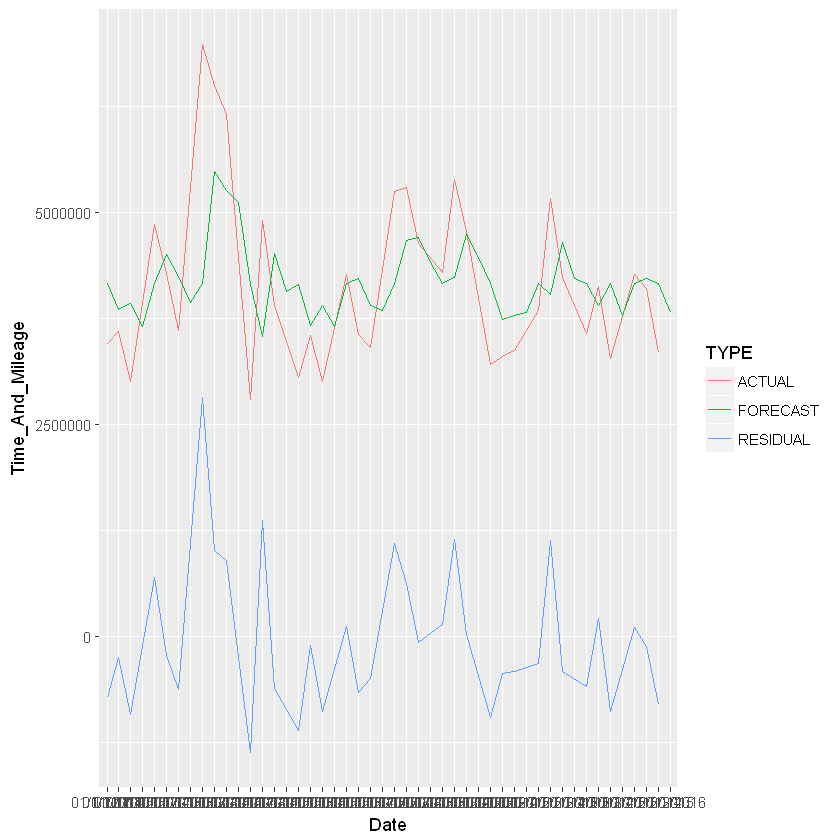

[1] "BUDG"
[1] "INBOUND LEISURE"
[1] 0.633686


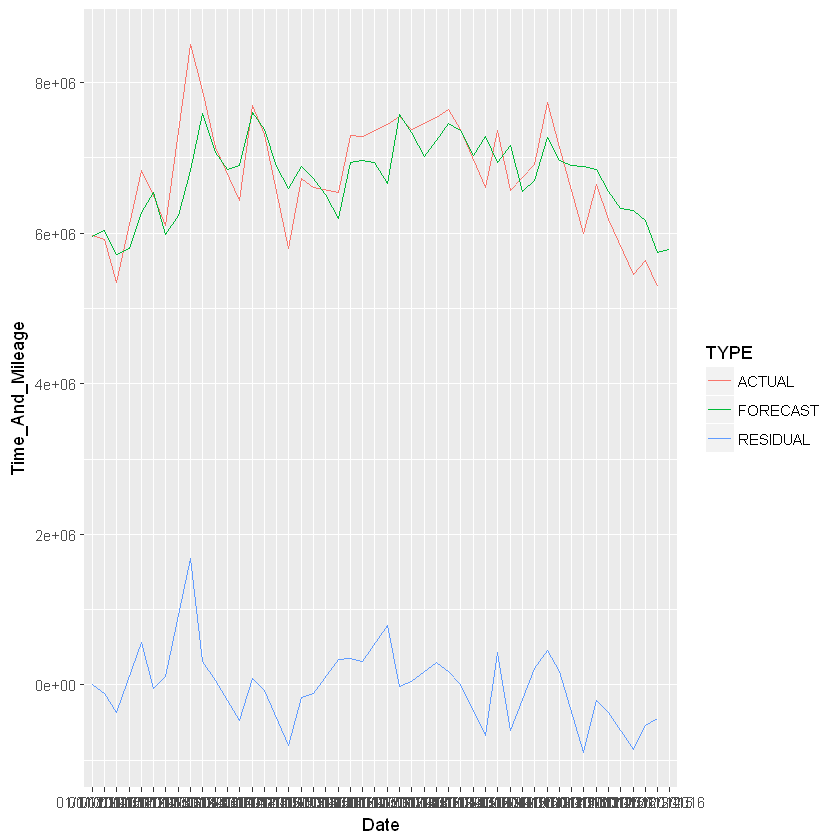

[1] "BUDG"
[1] "MARKETING"
[1] 2.279831


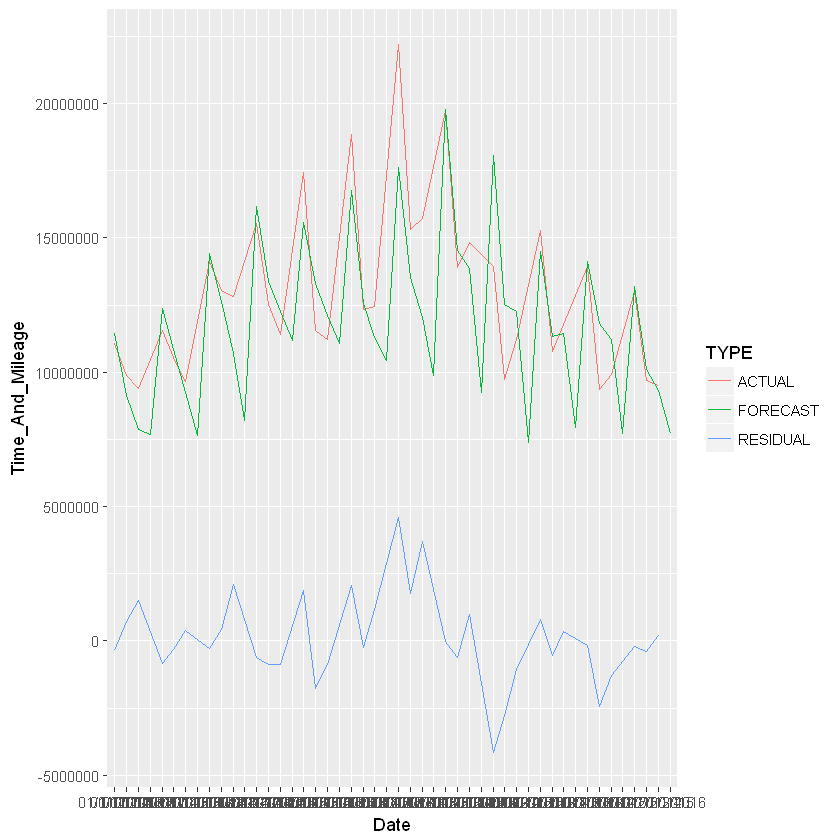

[1] "BUDG"
[1] "OPAQUE"
[1] 1.15826


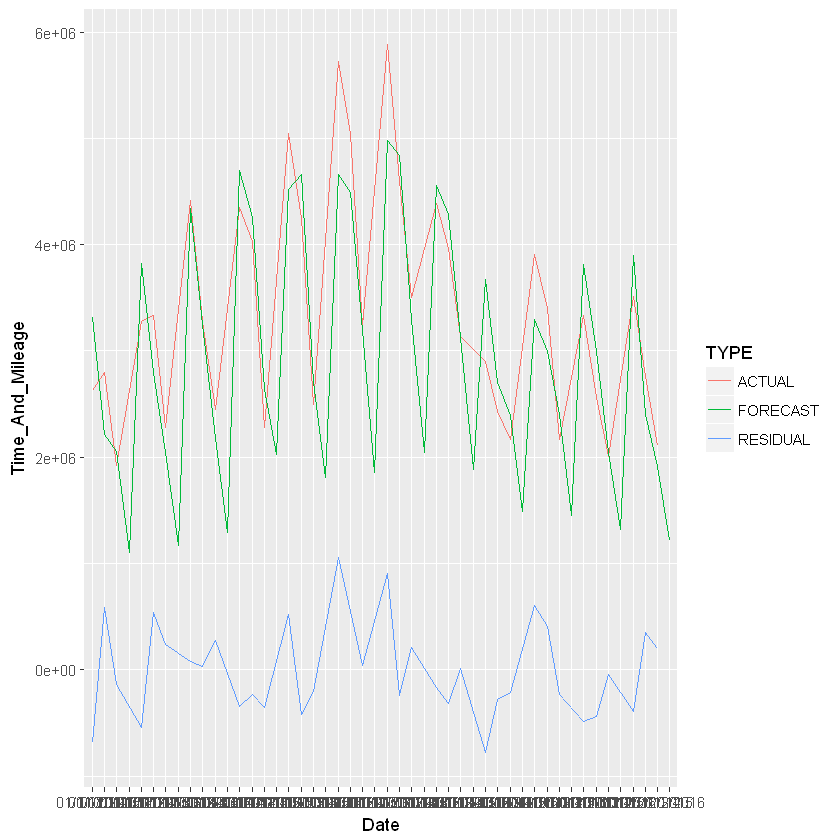

[1] "BUDG"
[1] "PARTNERSHIPS"
[1] 1.066632


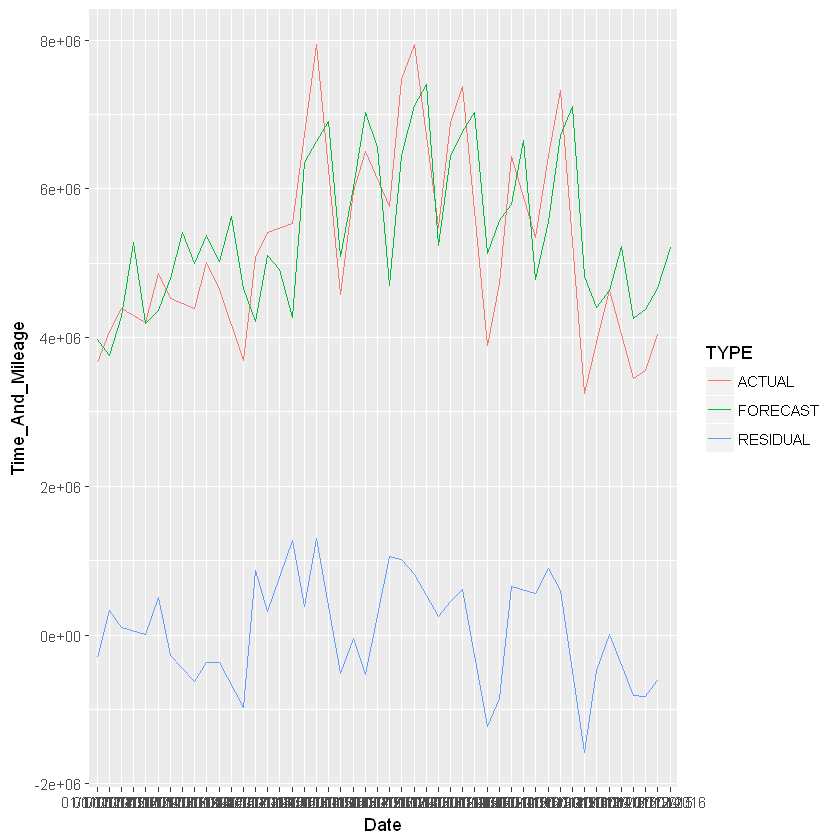

[1] "BUDG"
[1] "SMALL BUSINESS"
[1] 1.59867


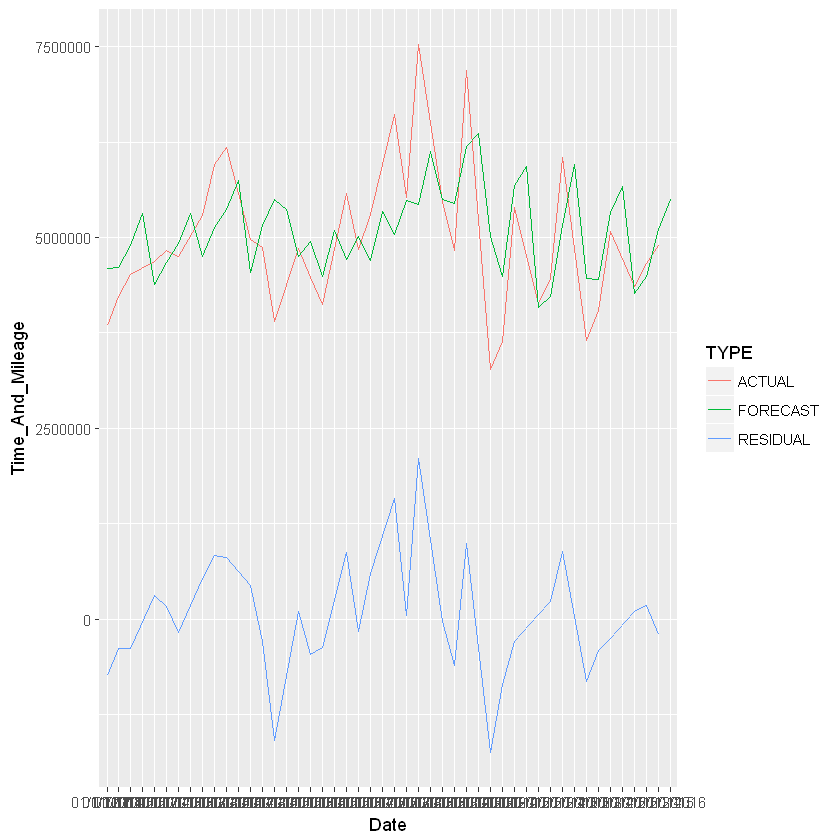

[1] "BUDG"
[1] "UNAFFILIATED - DISCOUNT"
[1] 2.118963


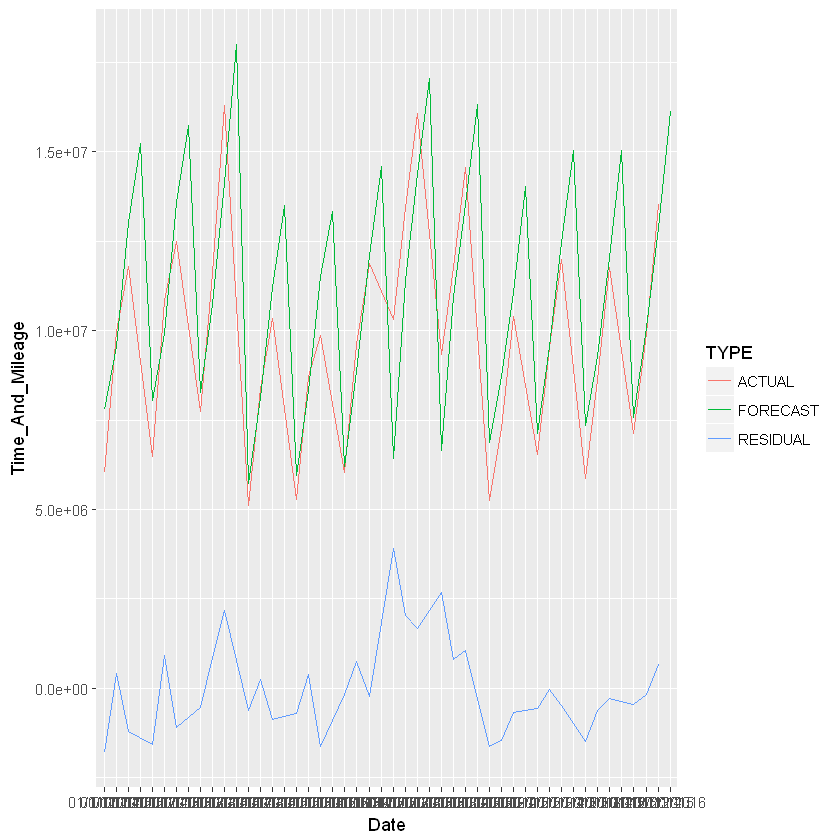

[1] "BUDG"
[1] "UNAFFILIATED"
[1] 1.510663


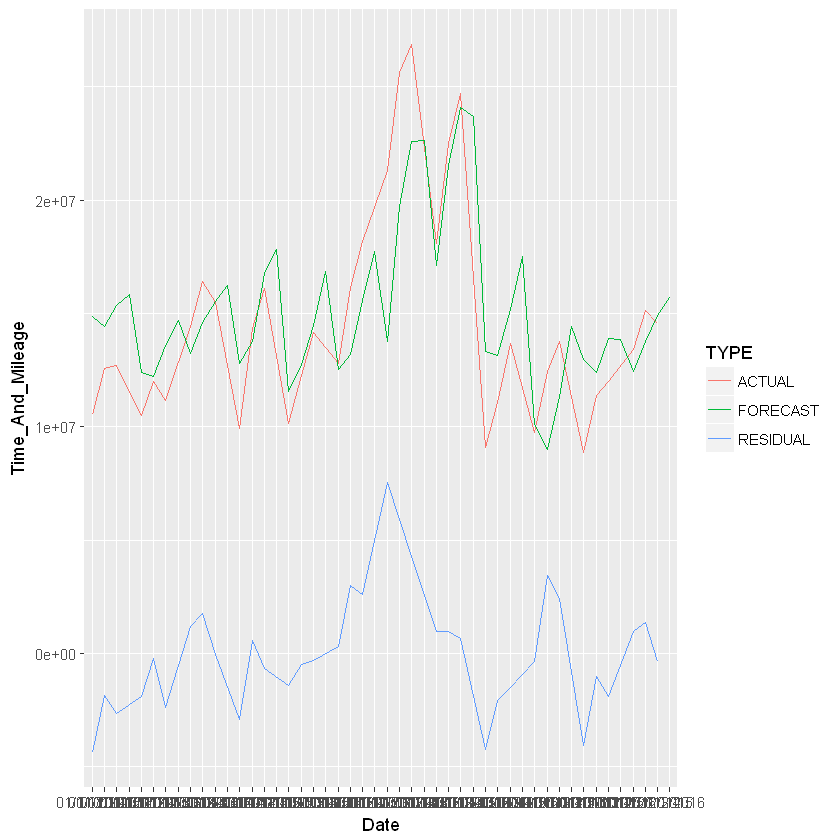

In [281]:
forecast_data$date <- as.Date(forecast_data$Date,"%d/%m/%Y")
forecast_mape<-subset(forecast_data, date > as.Date("2016-03-01") )
uni_seg <- unique(forecast_mape$Forecast_Segment)
uni_brand <- unique(forecast_mape$Brand)
for (i in uni_brand){
    if (i == "AVIS"){
        for (j in uni_seg){
            pred_avis <-subset(pred,Brand==i & Forecast_Segment==j)
            pred_avis1 <-subset(pred_avis, TYPE=="ACTUAL" | TYPE =="FORECAST" | TYPE =="RESIDUAL")
            df <- pred_avis1[,c(1,2,3,4,7)]
            print(ggplot(df,aes(x=Date,y=Time_And_Mileage,colour=TYPE,group=TYPE)) + geom_line())
            pred_avis <-subset(forecast_mape,Brand==i & Forecast_Segment==j)
            print (i)
            print (j)
            print (mean(sum(abs(pred_avis$Time_And_Mileage -pred_avis$Time_And_Mileage.FORECAST) / abs(pred_avis$Time_And_Mileage))))
            }
        
    }
    else {
        subuni_seg <- uni_seg[-c(6,8,12)]
        for (j in subuni_seg){
            pred_avis <-subset(pred,Brand==i & Forecast_Segment==j)
            pred_avis1 <-subset(pred_avis, TYPE=="ACTUAL" | TYPE =="FORECAST" | TYPE =="RESIDUAL")
            df <- pred_avis1[,c(1,2,3,4,7)]
            print(ggplot(df,aes(x=Date,y=Time_And_Mileage,colour=TYPE,group=TYPE)) + geom_line())
            pred_avis <-subset(forecast_mape,Brand==i & Forecast_Segment==j)
            print (i)
            print (j)
            print (mean(sum(abs(pred_avis$Time_And_Mileage -pred_avis$Time_And_Mileage.FORECAST) / abs(pred_avis$Time_And_Mileage))))
        }
    }
}

##### Plot and Calculate Forecast MAPE for Rental Days

In [282]:
Transaction_data<-reshape(pred[,c(1,2,3,4,8)], timevar="TYPE", idvar=c("Brand","Forecast_Segment", "Date"), direction="wide")

In [283]:
head(Transaction_data[,1:6])

,Brand,Forecast_Segment,Date,Rental_Days.ACTUAL,Rental_Days.FORECAST,Rental_Days.RESIDUAL
1,AVIS,ASSOCIATIONS,01/04/2013,354707,423565.4,-68858.359
4,AVIS,ASSOCIATIONS,01/05/2013,397454,391180.1,6273.941
7,AVIS,ASSOCIATIONS,01/06/2013,423316,414524.0,8792.038
10,AVIS,ASSOCIATIONS,01/07/2013,568122,429209.7,138912.314
13,AVIS,ASSOCIATIONS,01/08/2013,549429,504886.7,44542.265
16,AVIS,ASSOCIATIONS,01/09/2013,405007,496725.8,-91718.838


In [284]:
forecast_data <- merge(Transaction_data[,c(1,2,3,5)], data[,c(2,3,4,7)], by=c("Brand","Forecast_Segment", "Date"))

[1] "AVIS"
[1] "ASSOCIATIONS"
[1] 0.746134


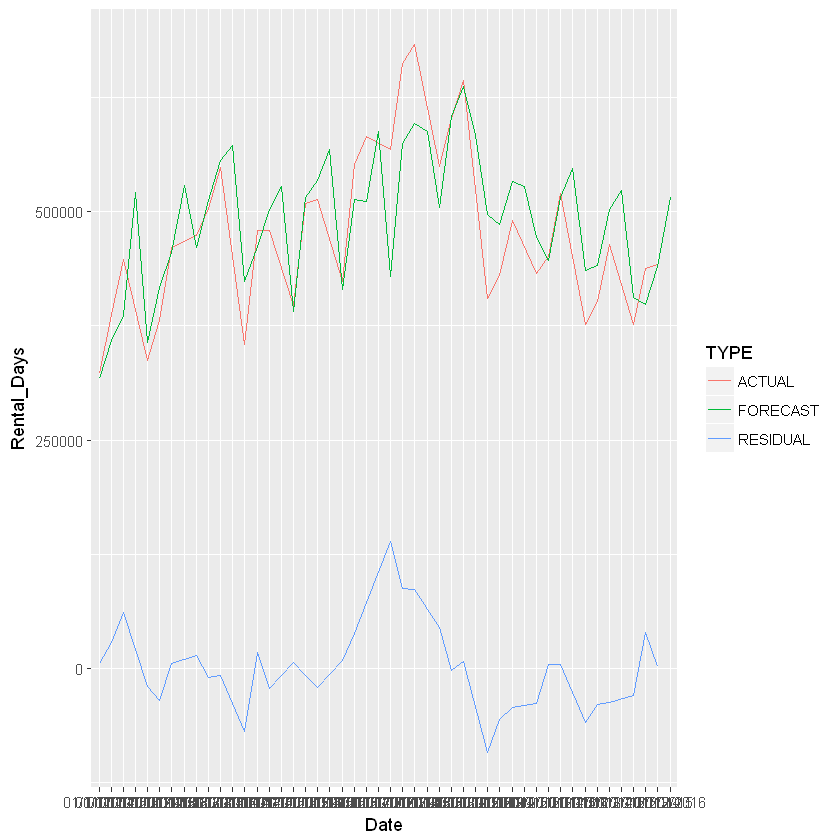

[1] "AVIS"
[1] "BUSINESS OTHER"
[1] 1.696294


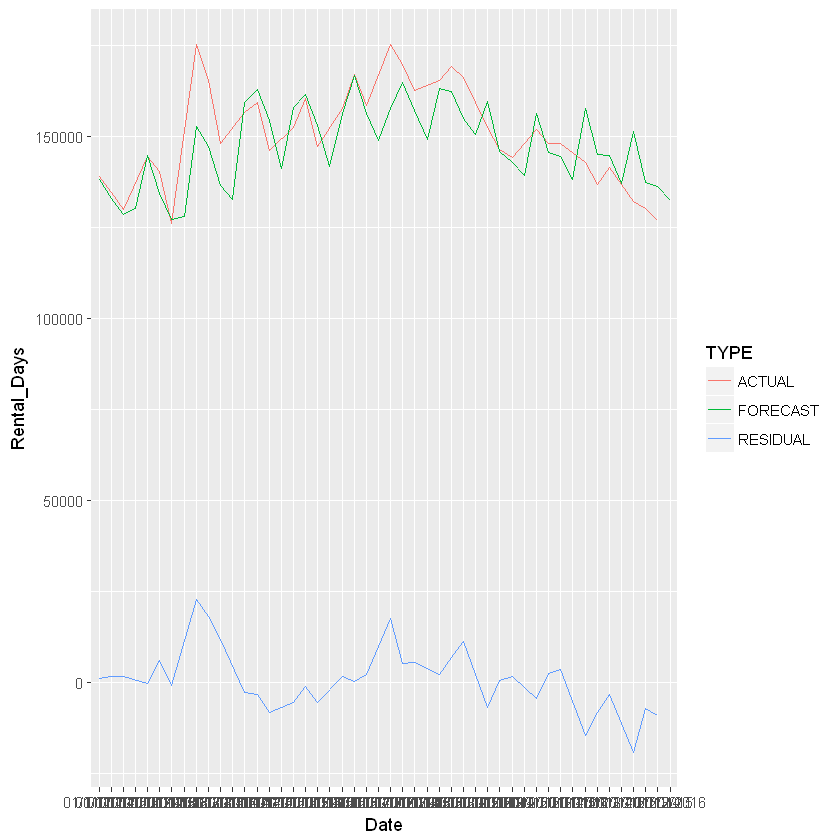

[1] "AVIS"
[1] "DAILY UNAFFILIATED"
[1] 0.4873082


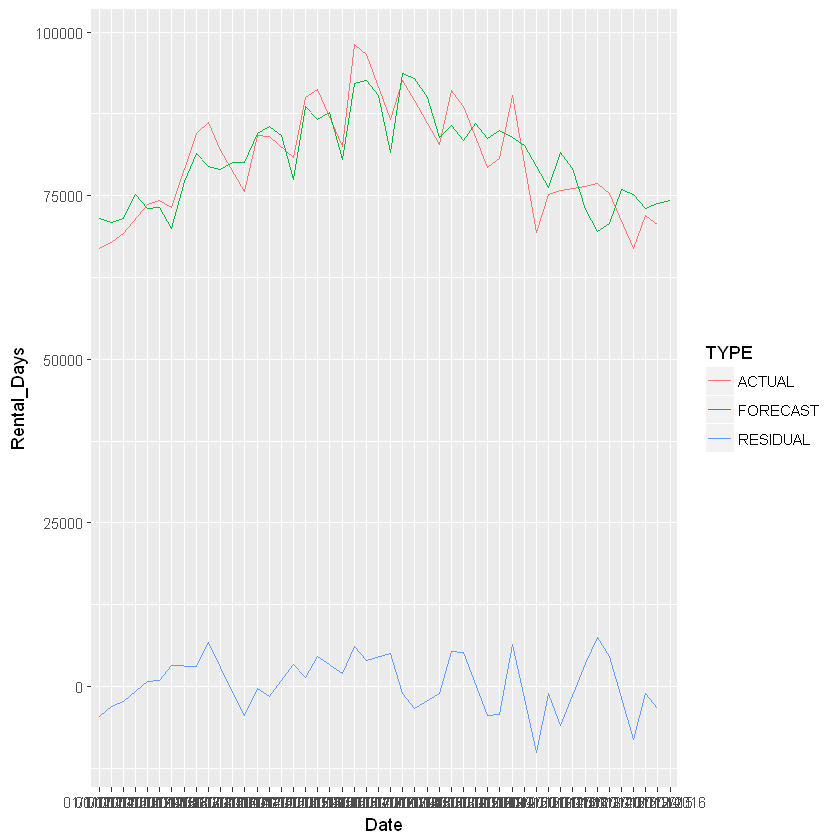

[1] "AVIS"
[1] "GOVERNMENT"
[1] 1.497106


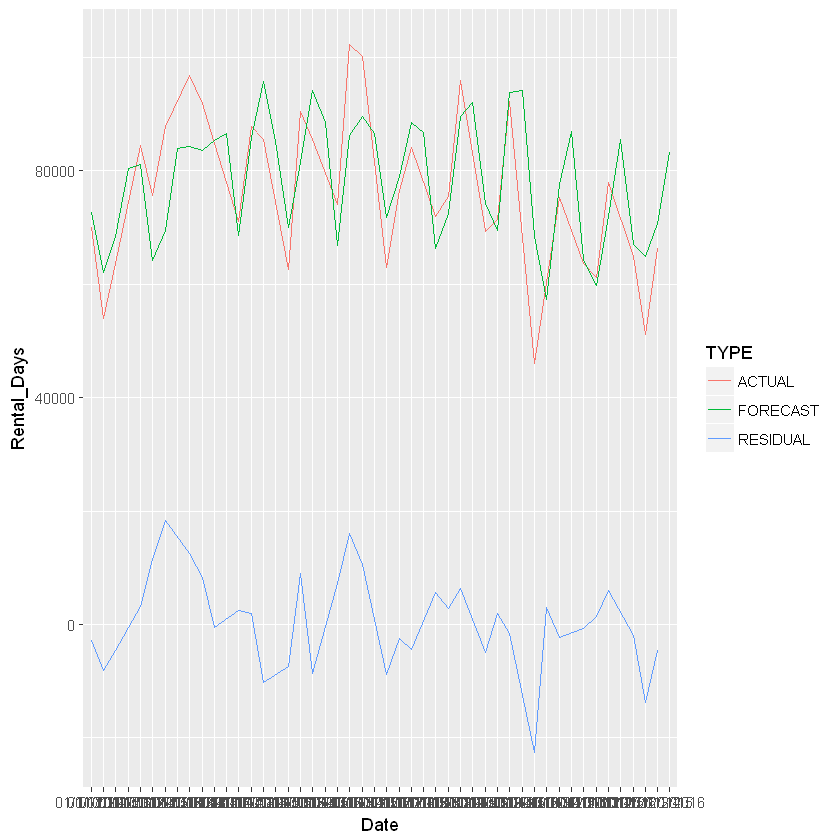

[1] "AVIS"
[1] "INBOUND LEISURE"
[1] 0.6159491


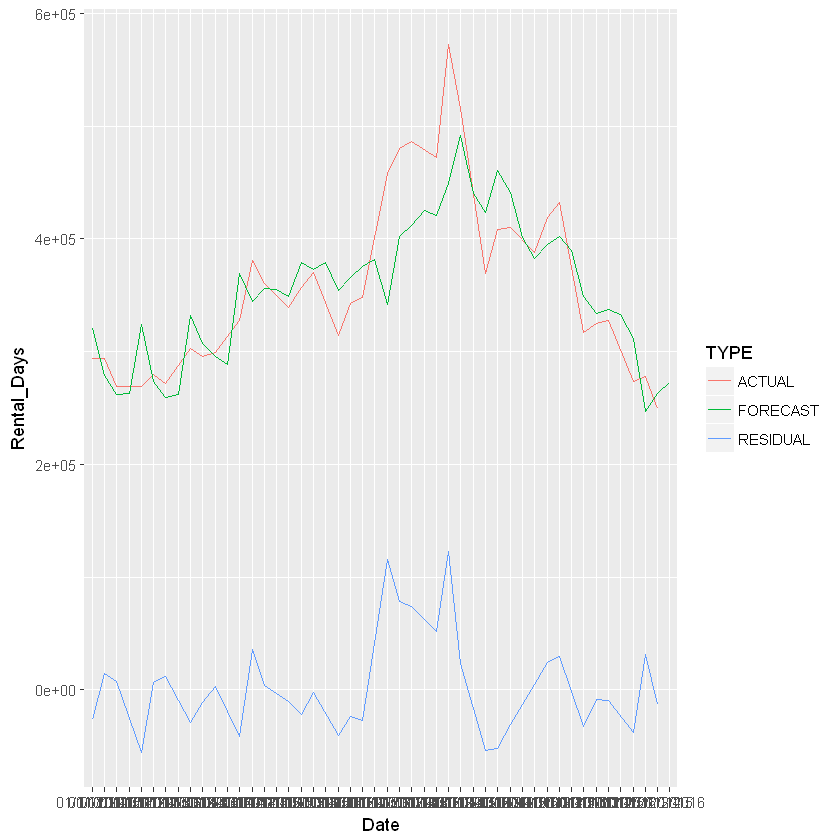

[1] "AVIS"
[1] "LARGE COMMERCIAL"
[1] 0.3692651


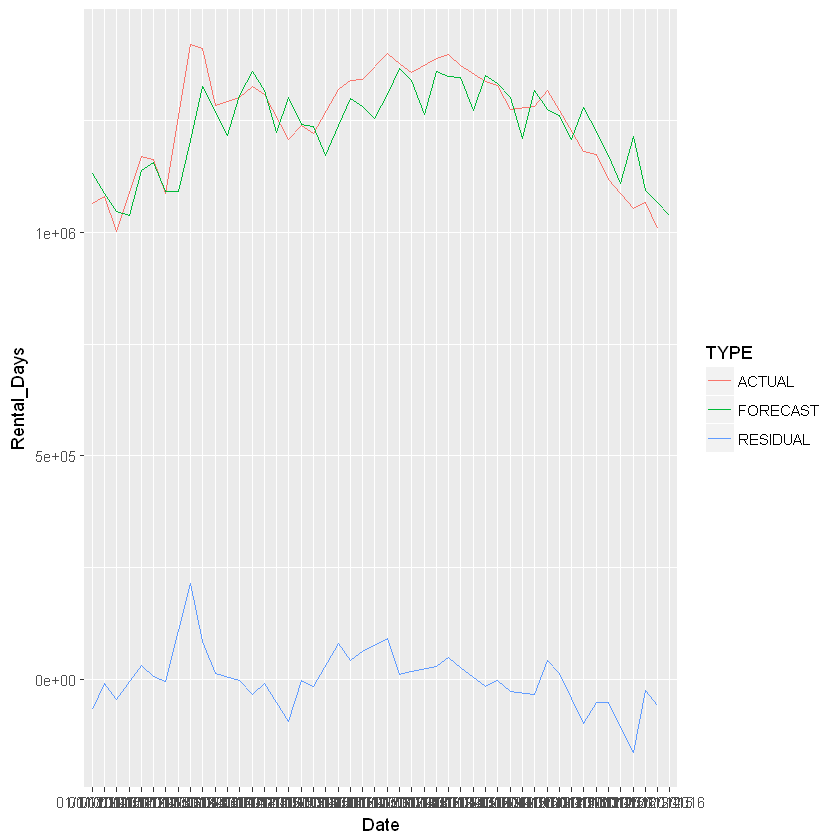

[1] "AVIS"
[1] "MARKETING"
[1] 2.865639


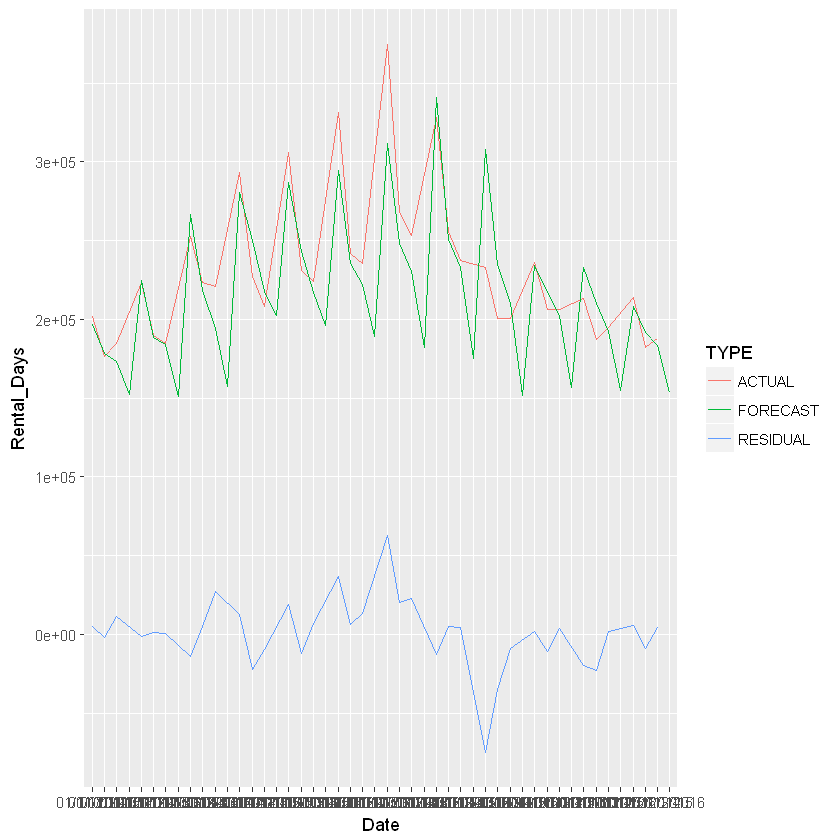

[1] "AVIS"
[1] "MID MARKET COMMERCIAL"
[1] 0.3099578


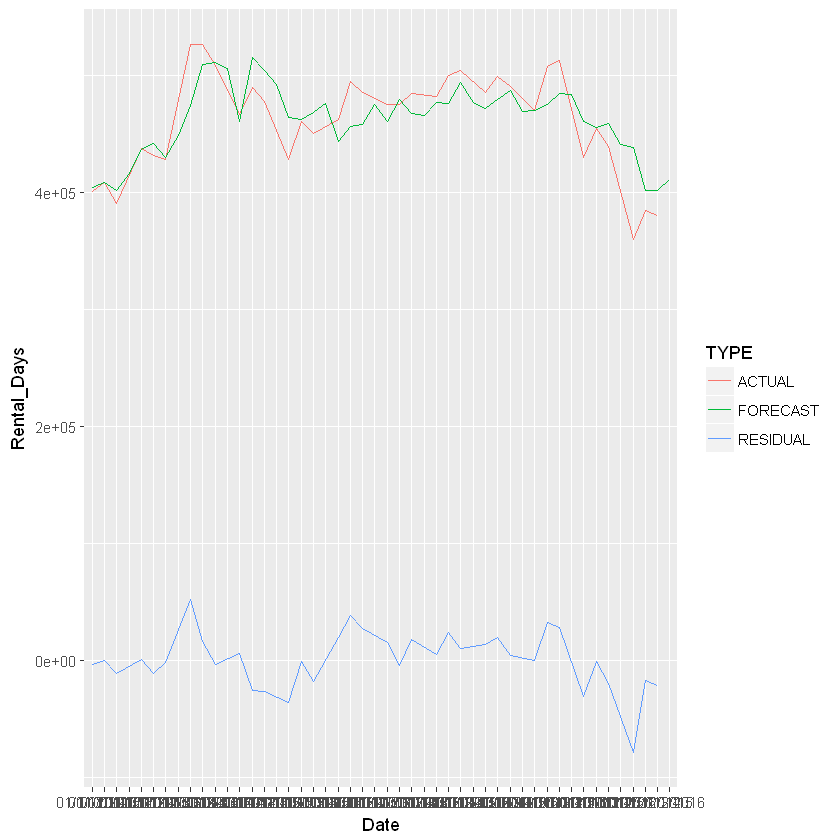

[1] "AVIS"
[1] "OPAQUE"
[1] 1.422925


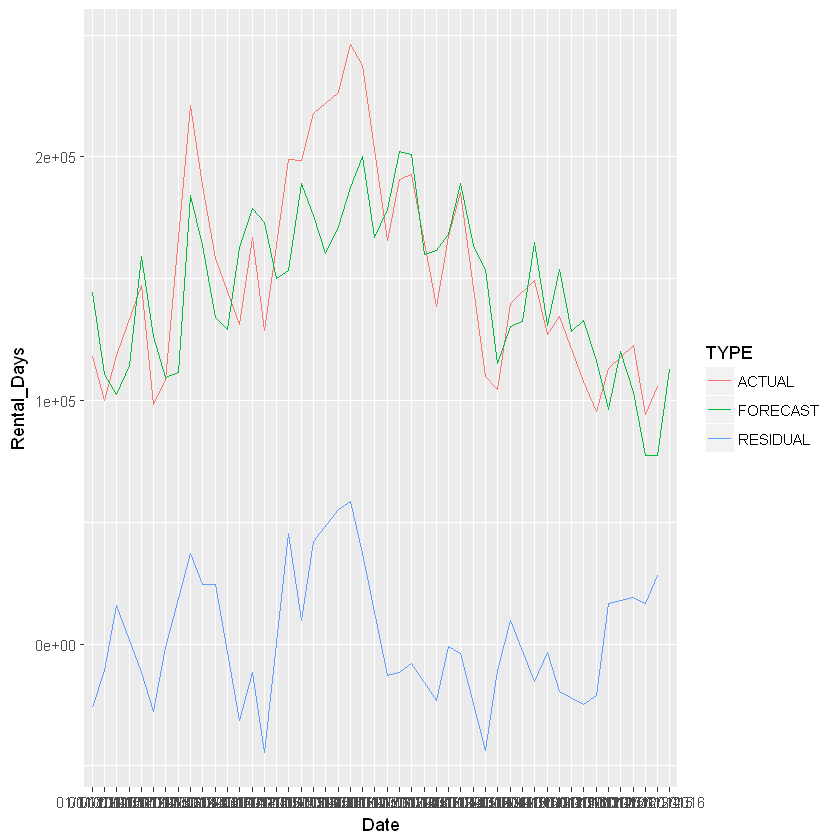

[1] "AVIS"
[1] "PARTNERSHIPS"
[1] 1.157341


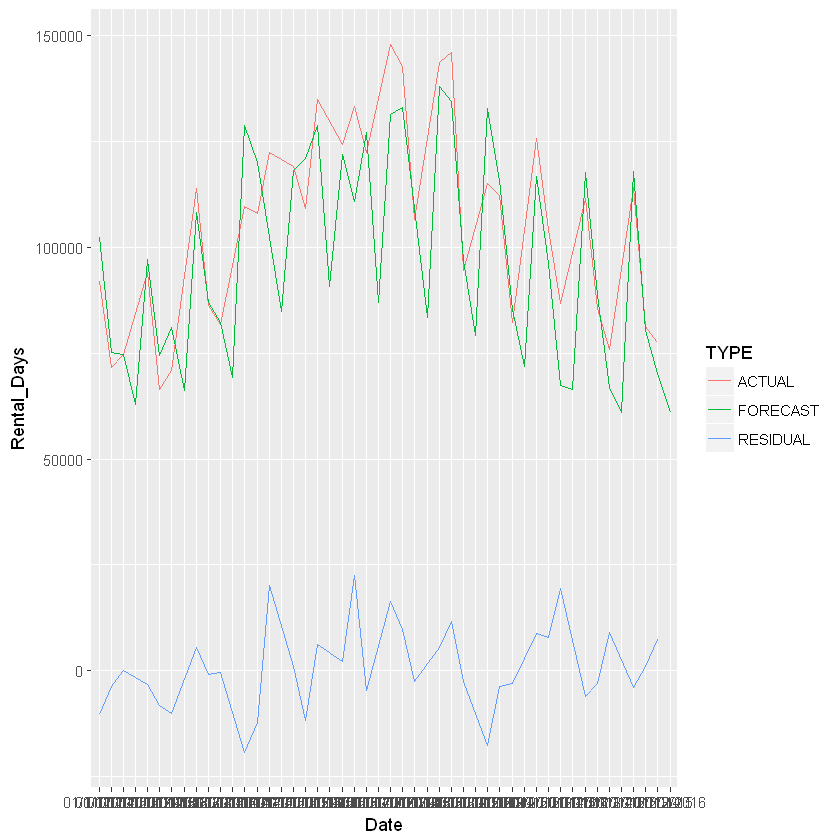

[1] "AVIS"
[1] "SMALL BUSINESS"
[1] 0.3714714


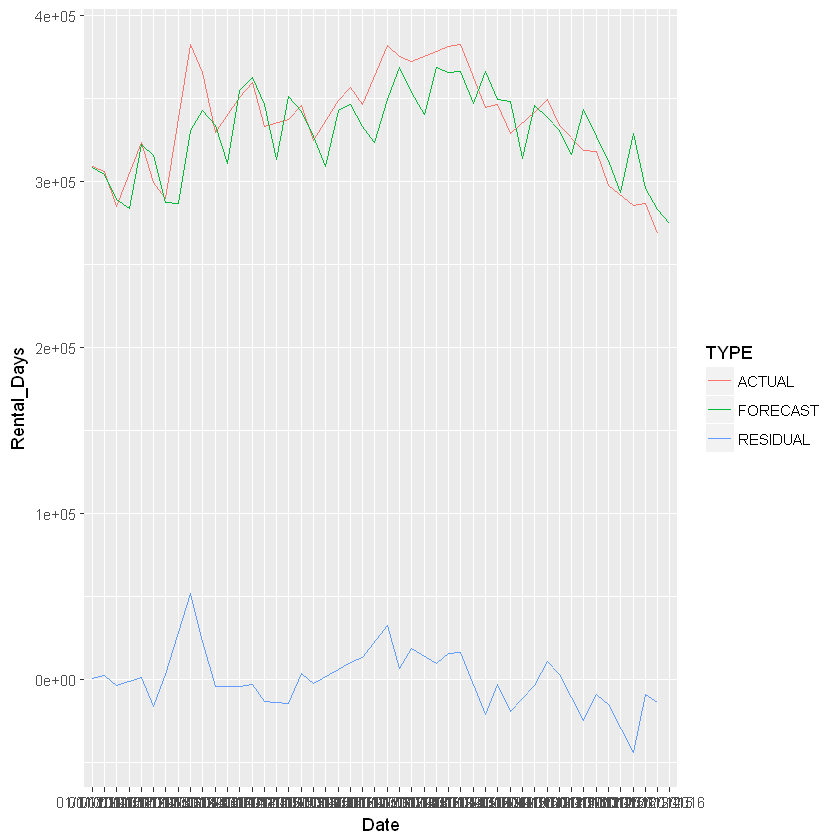

[1] "AVIS"
[1] "TOUR"
[1] 1.173662


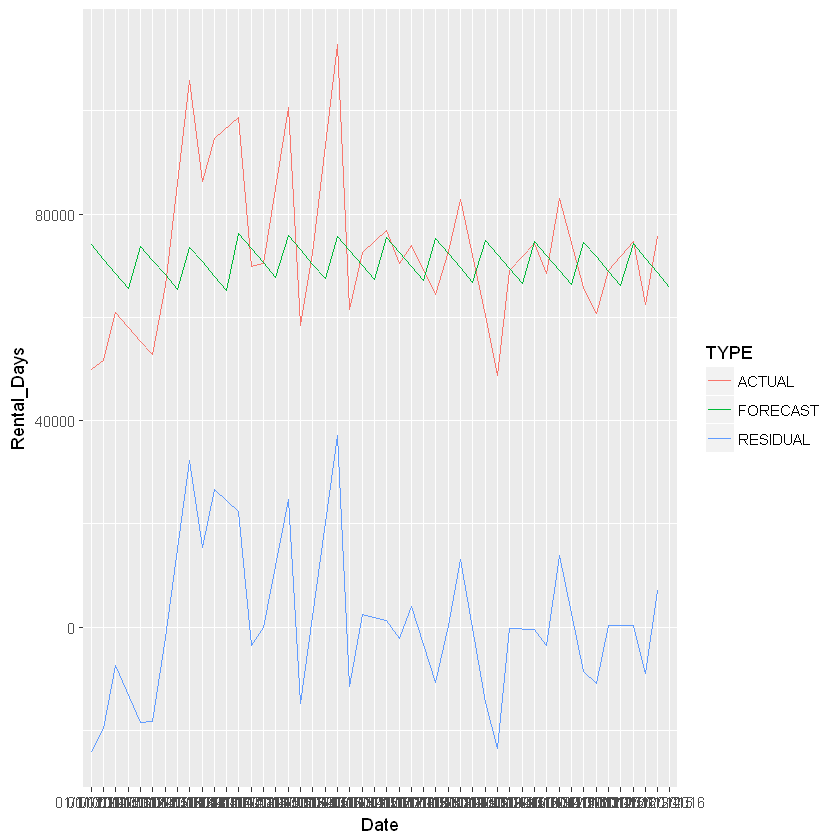

[1] "AVIS"
[1] "UNAFFILIATED - DISCOUNT"
[1] 2.122383


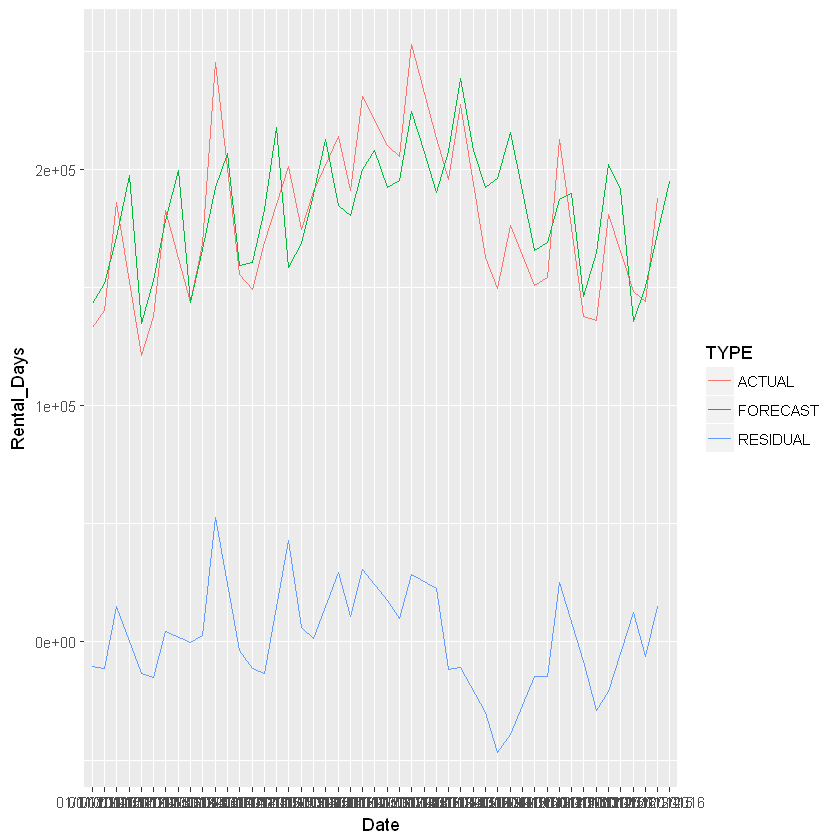

[1] "AVIS"
[1] "UNAFFILIATED"
[1] 0.3183738


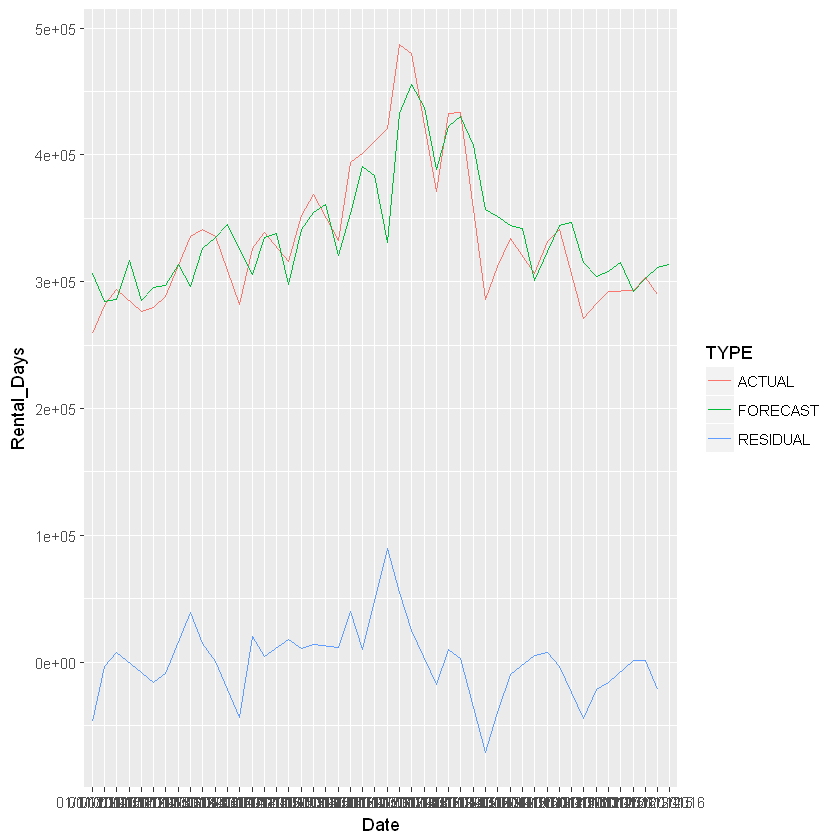

[1] "BUDG"
[1] "ASSOCIATIONS"
[1] 0.4865508


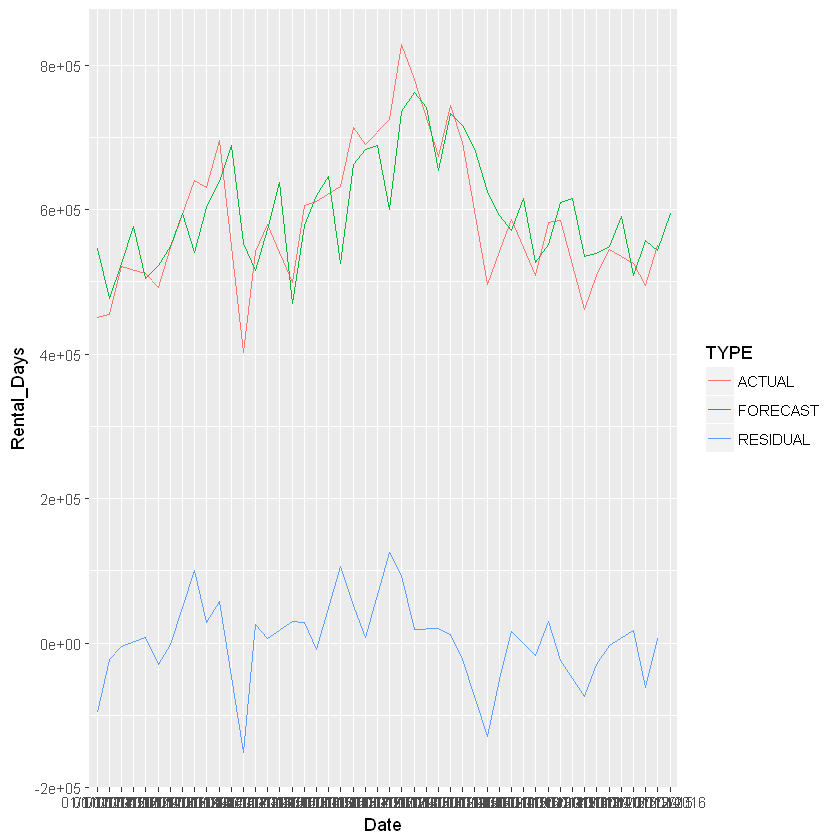

[1] "BUDG"
[1] "BUSINESS OTHER"
[1] 0.7574718


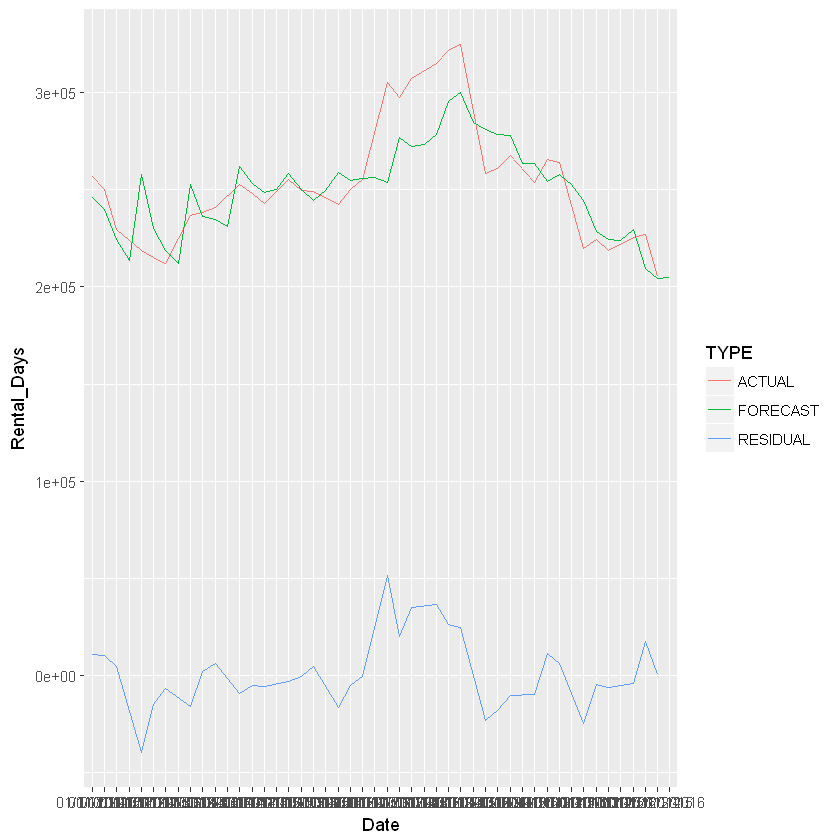

[1] "BUDG"
[1] "DAILY UNAFFILIATED"
[1] 0.8355649


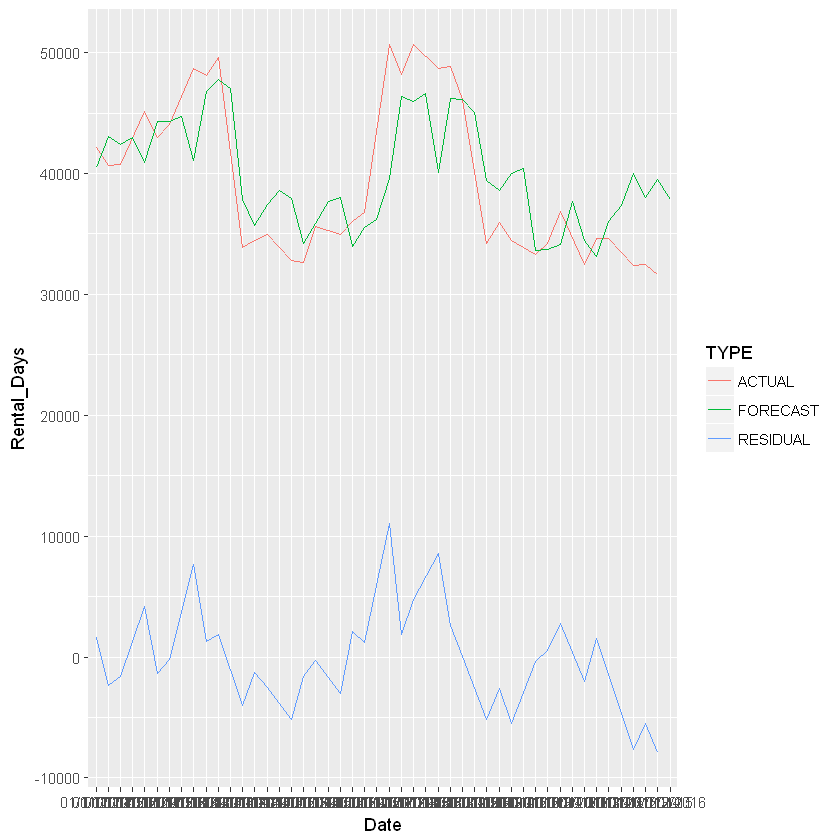

[1] "BUDG"
[1] "GOVERNMENT"
[1] 1.753947


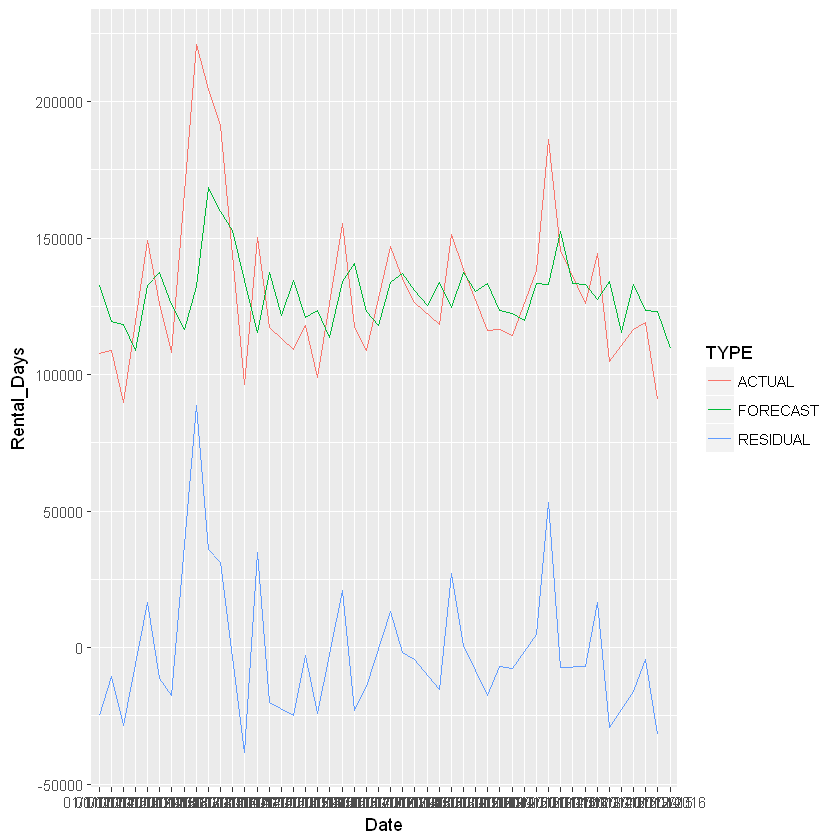

[1] "BUDG"
[1] "INBOUND LEISURE"
[1] 0.6881439


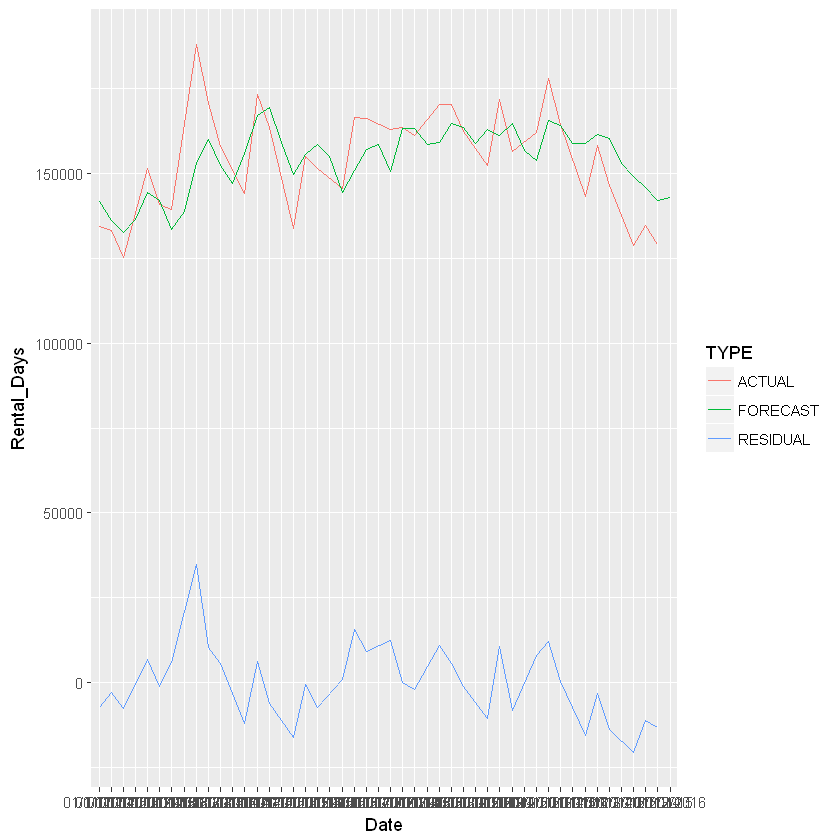

[1] "BUDG"
[1] "MARKETING"
[1] 2.466642


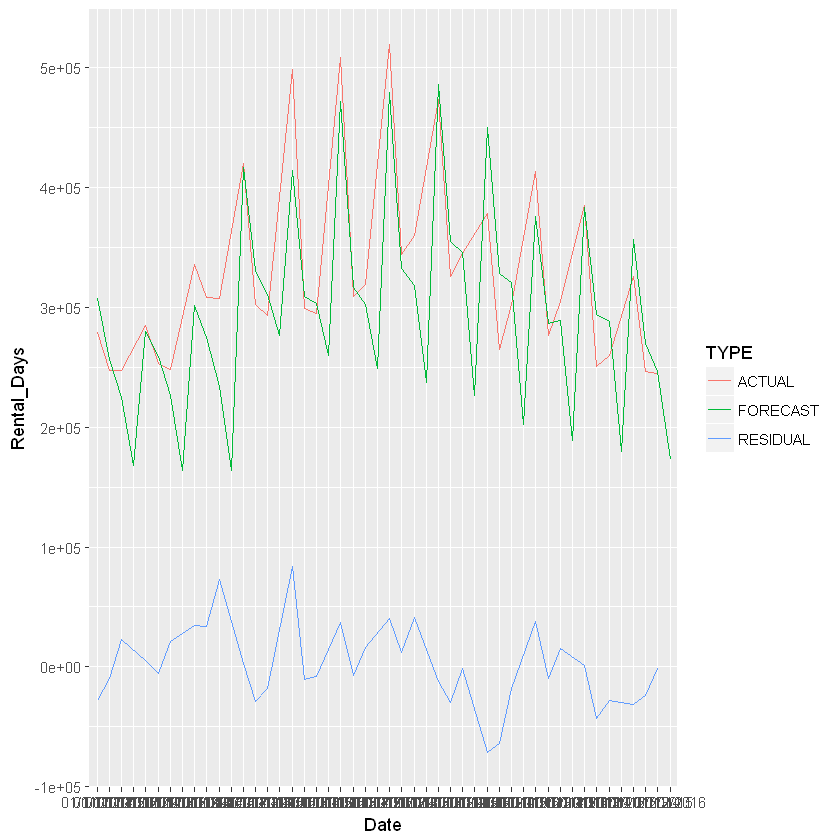

[1] "BUDG"
[1] "OPAQUE"
[1] 2.151788


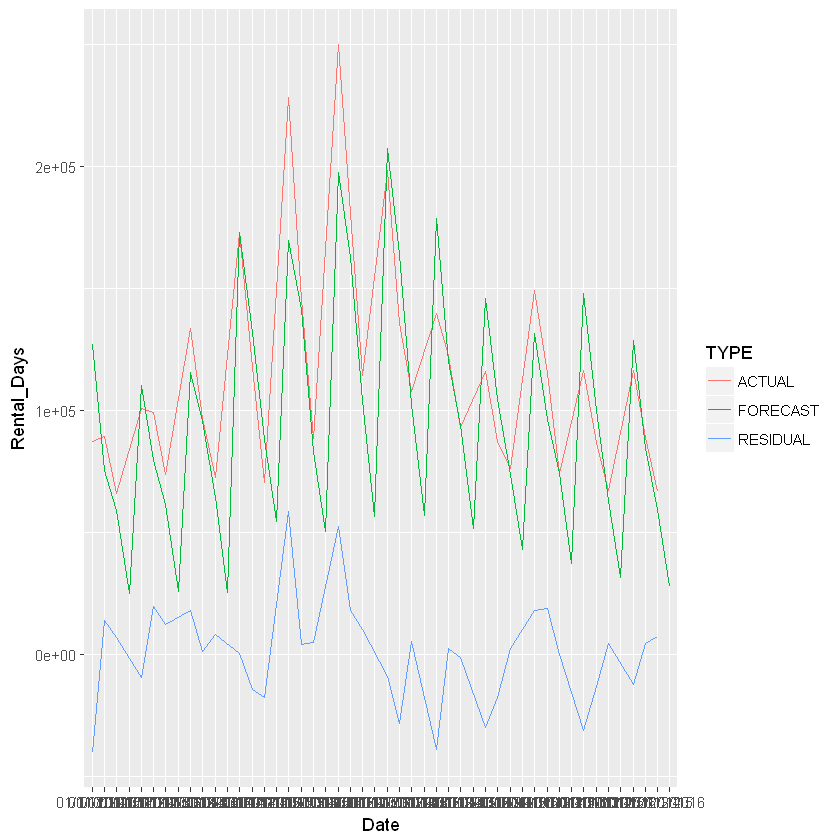

[1] "BUDG"
[1] "PARTNERSHIPS"
[1] 1.128055


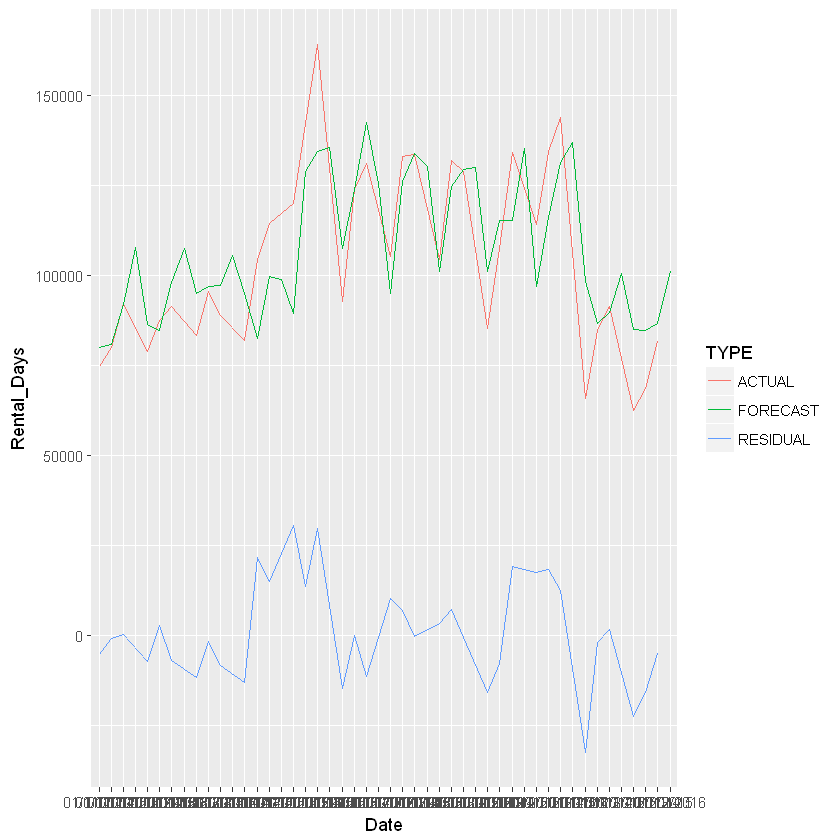

[1] "BUDG"
[1] "SMALL BUSINESS"
[1] 1.376174


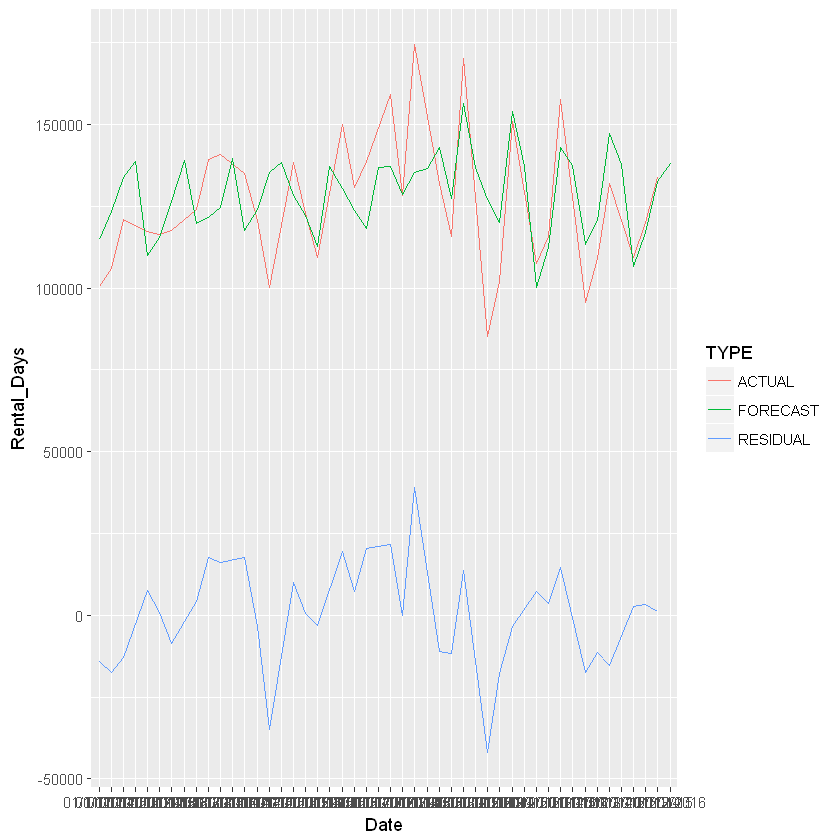

[1] "BUDG"
[1] "UNAFFILIATED - DISCOUNT"
[1] 1.609677


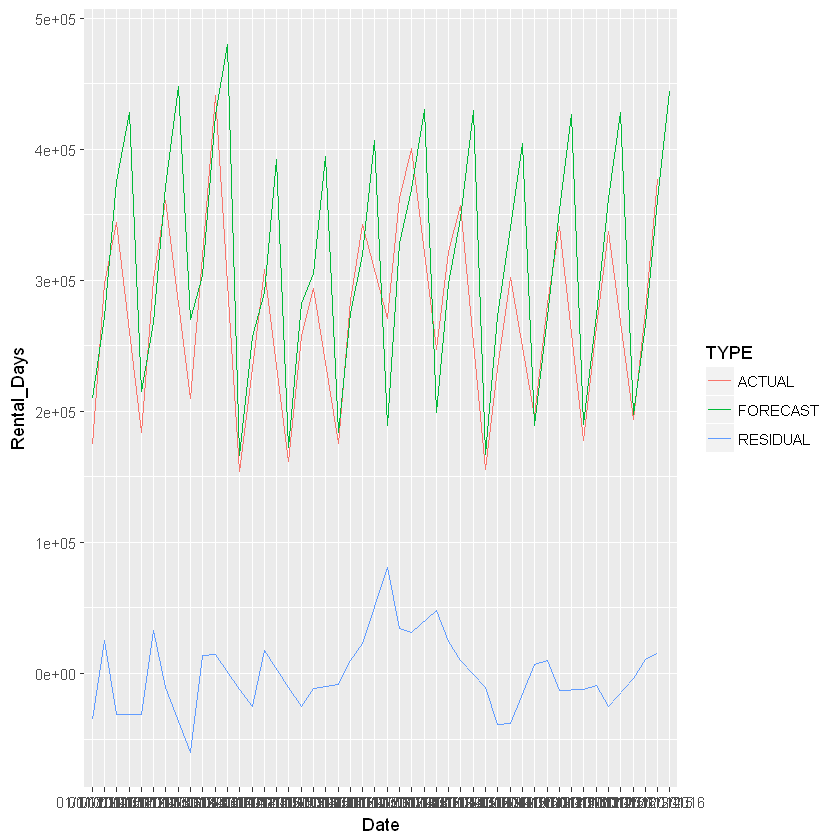

[1] "BUDG"
[1] "UNAFFILIATED"
[1] 0.7542946


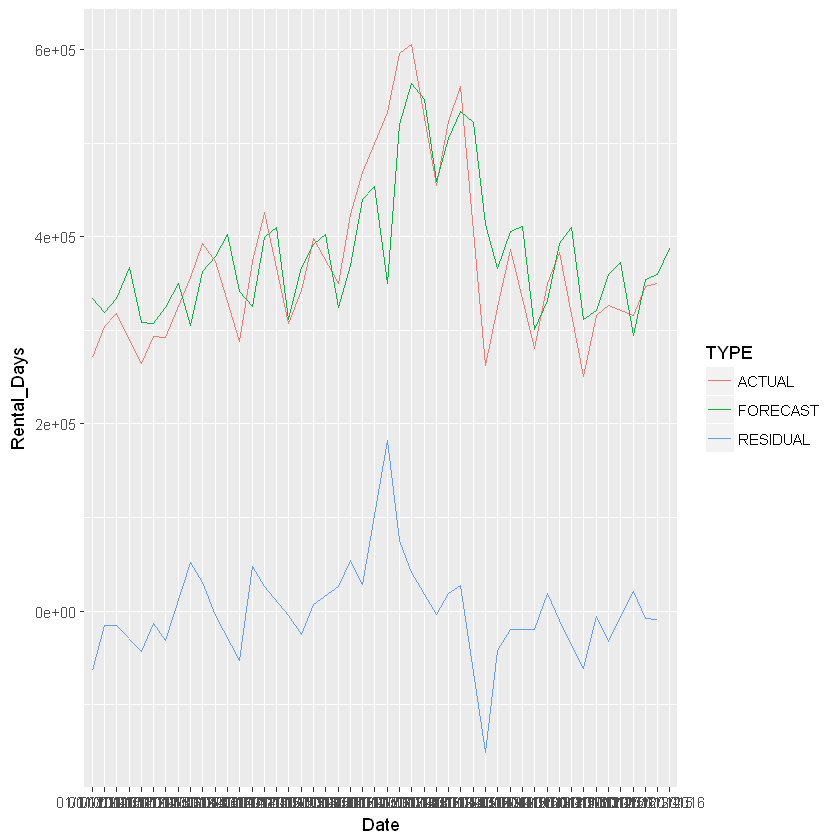

In [285]:
forecast_data$date <- as.Date(forecast_data$Date,"%d/%m/%Y")
forecast_mape<-subset(forecast_data, date > as.Date("2016-03-01") )
uni_seg <- unique(forecast_mape$Forecast_Segment)
uni_brand <- unique(forecast_mape$Brand)
for (i in uni_brand){
    if (i == "AVIS"){
        for (j in uni_seg){
            pred_avis <-subset(pred,Brand==i & Forecast_Segment==j)
            pred_avis1 <-subset(pred_avis, TYPE=="ACTUAL" | TYPE =="FORECAST" | TYPE =="RESIDUAL")
            df <- pred_avis1[,c(1,2,3,4,8)]
            print(ggplot(df,aes(x=Date,y=Rental_Days,colour=TYPE,group=TYPE)) + geom_line())
            pred_avis <-subset(forecast_mape,Brand==i & Forecast_Segment==j)
            print (i)
            print (j)
            print (mean(sum(abs(pred_avis$Rental_Days -pred_avis$Rental_Days.FORECAST) / abs(pred_avis$Rental_Days))))
            }
        
    }
    else {
        subuni_seg <- uni_seg[-c(6,8,12)]
        for (j in subuni_seg){
            pred_avis <-subset(pred,Brand==i & Forecast_Segment==j)
            pred_avis1 <-subset(pred_avis, TYPE=="ACTUAL" | TYPE =="FORECAST" | TYPE =="RESIDUAL")
            df <- pred_avis1[,c(1,2,3,4,8)]
            print(ggplot(df,aes(x=Date,y=Rental_Days,colour=TYPE,group=TYPE)) + geom_line())
            pred_avis <-subset(forecast_mape,Brand==i & Forecast_Segment==j)
            print (i)
            print (j)
            print (mean(sum(abs(pred_avis$Rental_Days -pred_avis$Rental_Days.FORECAST) / abs(pred_avis$Rental_Days))))
        }
    }
}

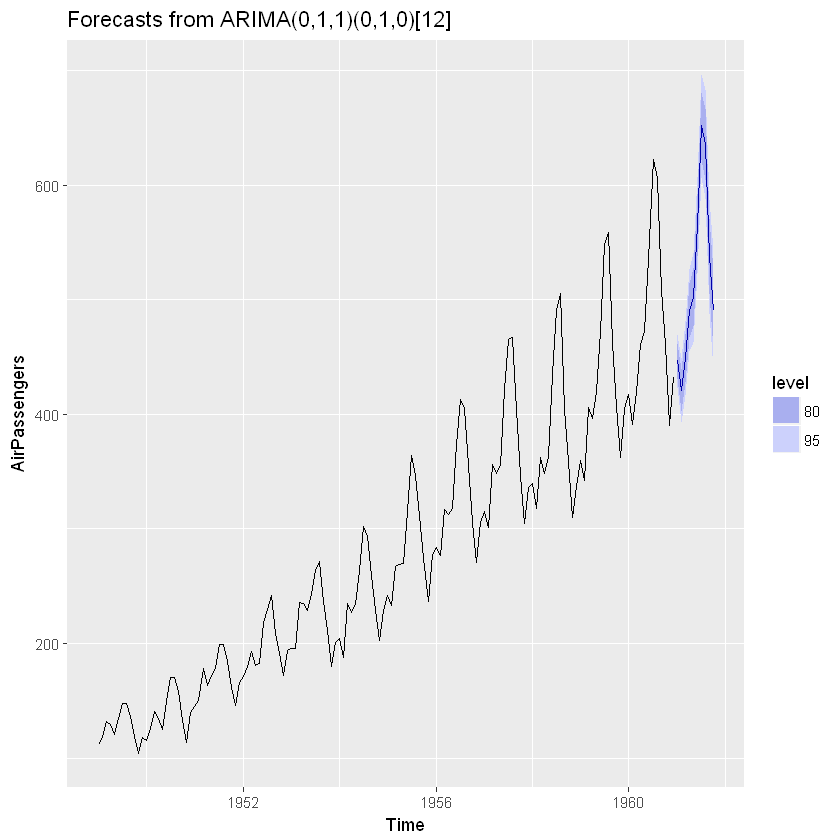

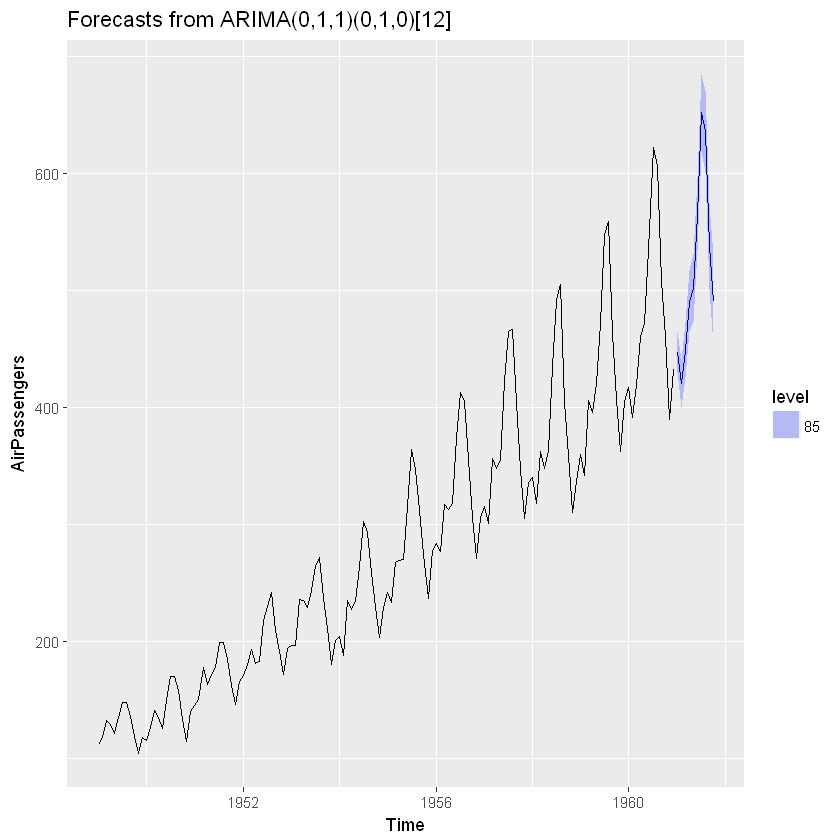

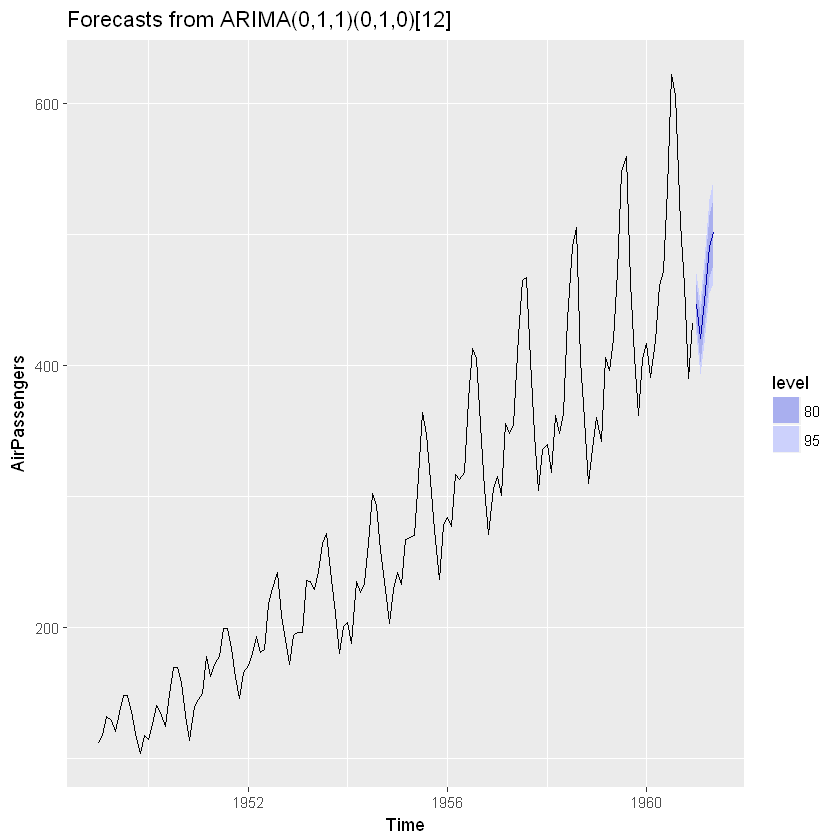

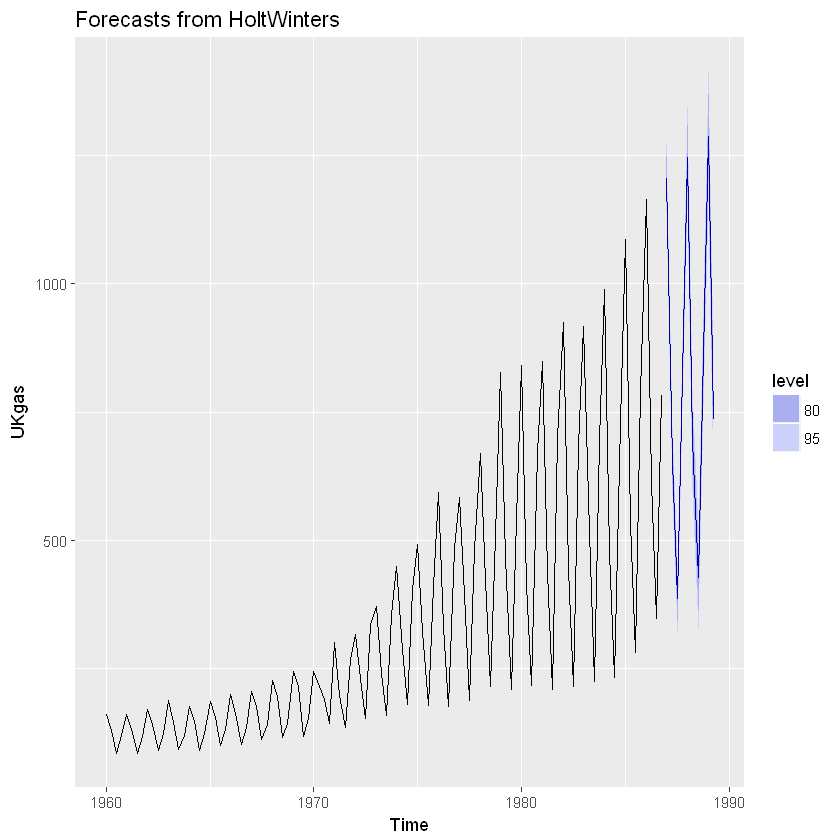

In [37]:
d.arima <- forecast::auto.arima(AirPassengers)
autoplot(forecast::forecast(d.arima, h = 10))
autoplot(forecast::forecast(d.arima, level = c(85), h = 10))
autoplot(forecast::forecast(d.arima, h = 5), conf.int = FALSE, is.date = FALSE)
autoplot(forecast::forecast(stats::HoltWinters(UKgas), h = 10))

In [175]:
d.arima

Series: AirPassengers 
ARIMA(0,1,1)(0,1,0)[12]                    

Coefficients:
          ma1
      -0.3184
s.e.   0.0877

sigma^2 estimated as 138.3:  log likelihood=-508.32
AIC=1020.64   AICc=1020.73   BIC=1026.39

#### Sample code

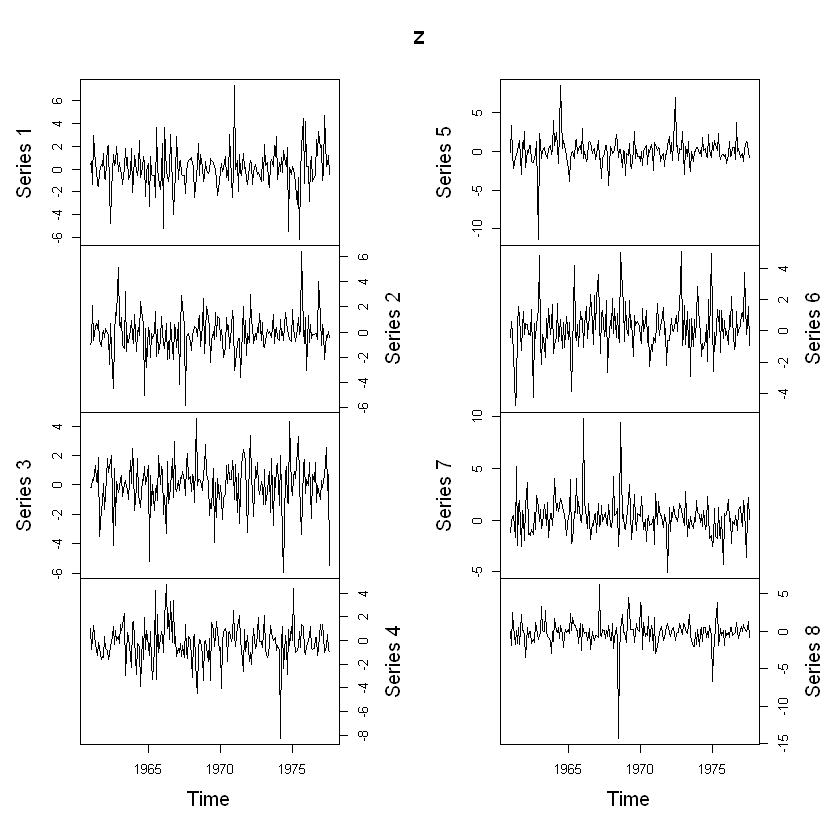

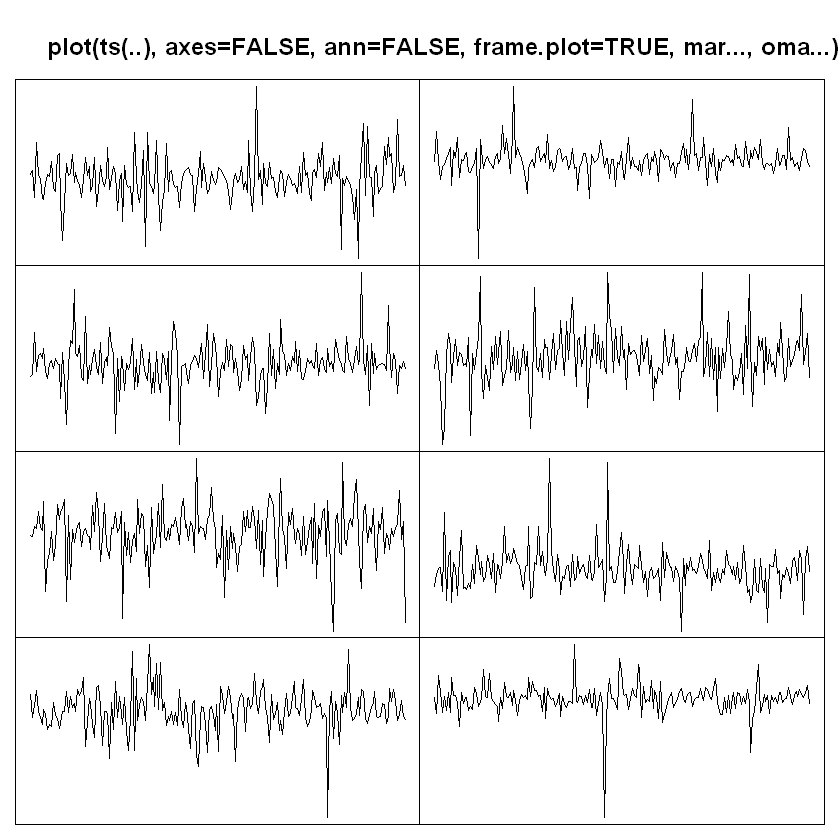

In [219]:
z <- ts(matrix(rt(200 * 8, df = 3), 200, 8),
        start = c(1961, 1), frequency = 12)
plot(z, yax.flip = TRUE)
plot(z, axes = FALSE, ann = FALSE, frame.plot = TRUE,
     mar.multi = c(0,0,0,0), oma.multi = c(1,1,5,1))
title("plot(ts(..), axes=FALSE, ann=FALSE, frame.plot=TRUE, mar..., oma...)")


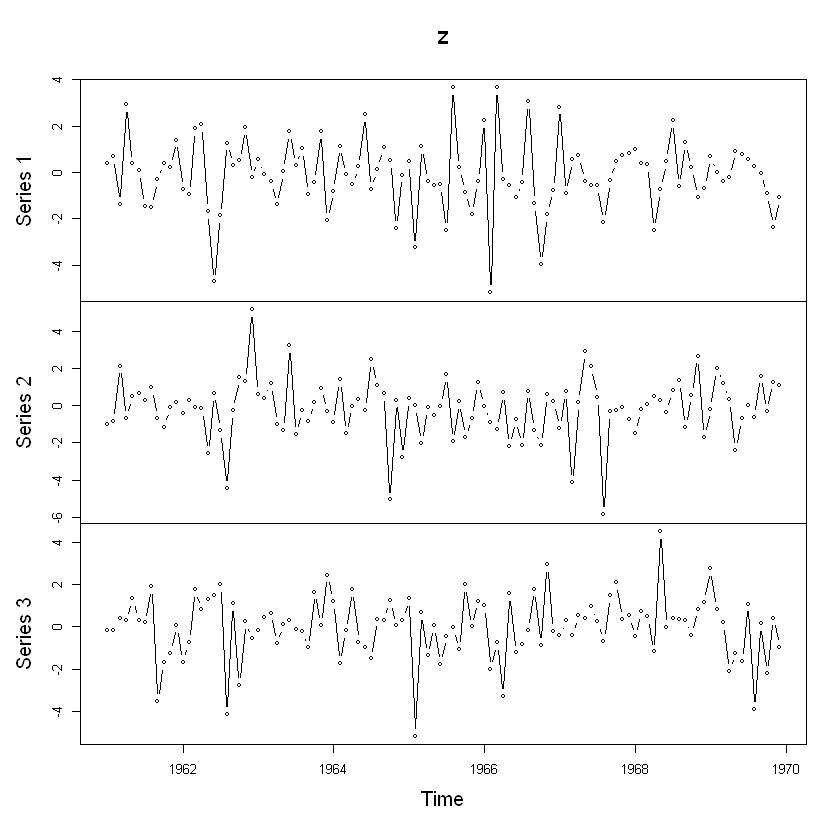

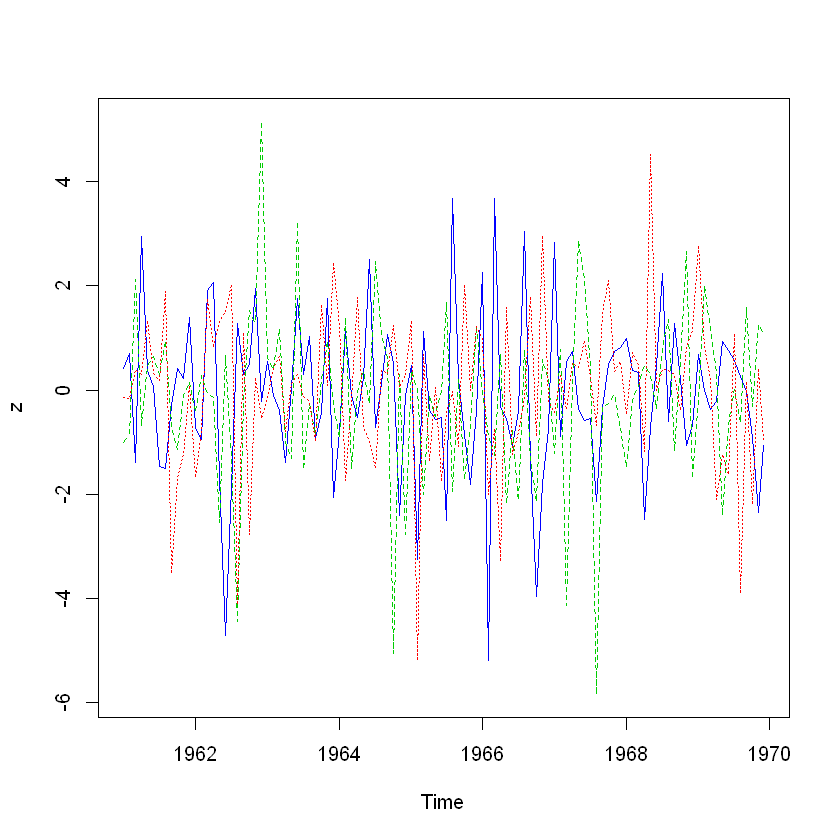

In [220]:
z <- window(z[,1:3], end = c(1969,12))
plot(z, type = "b")    # multiple
plot(z, plot.type = "single", lty = 1:3, col = 4:2)

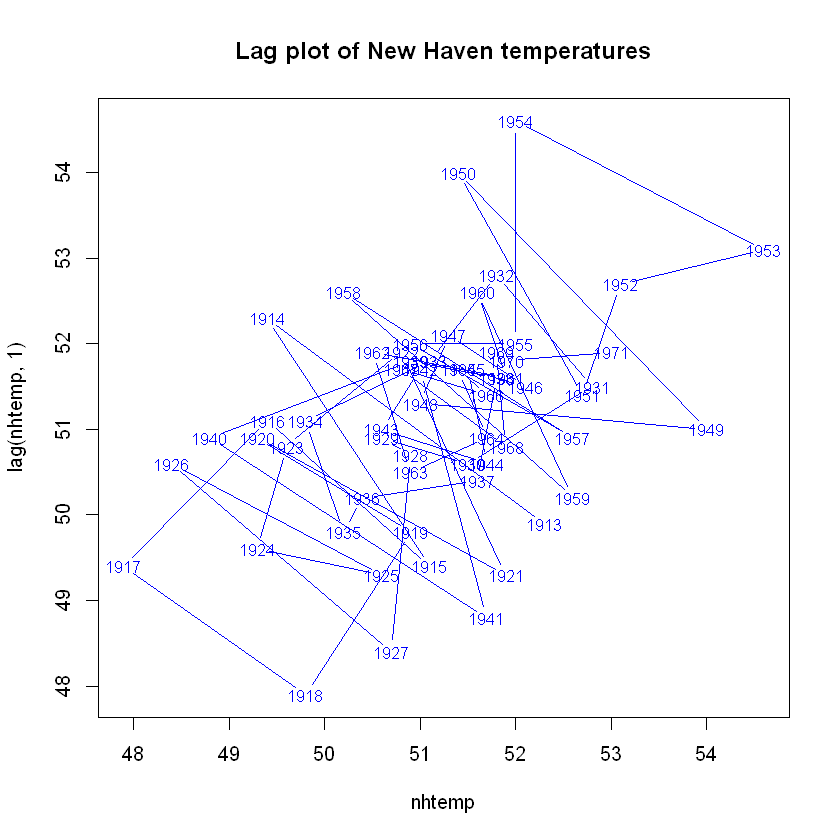

In [173]:
plot(nhtemp, lag(nhtemp, 1), cex = .8, col = "blue",
     main = "Lag plot of New Haven temperatures")


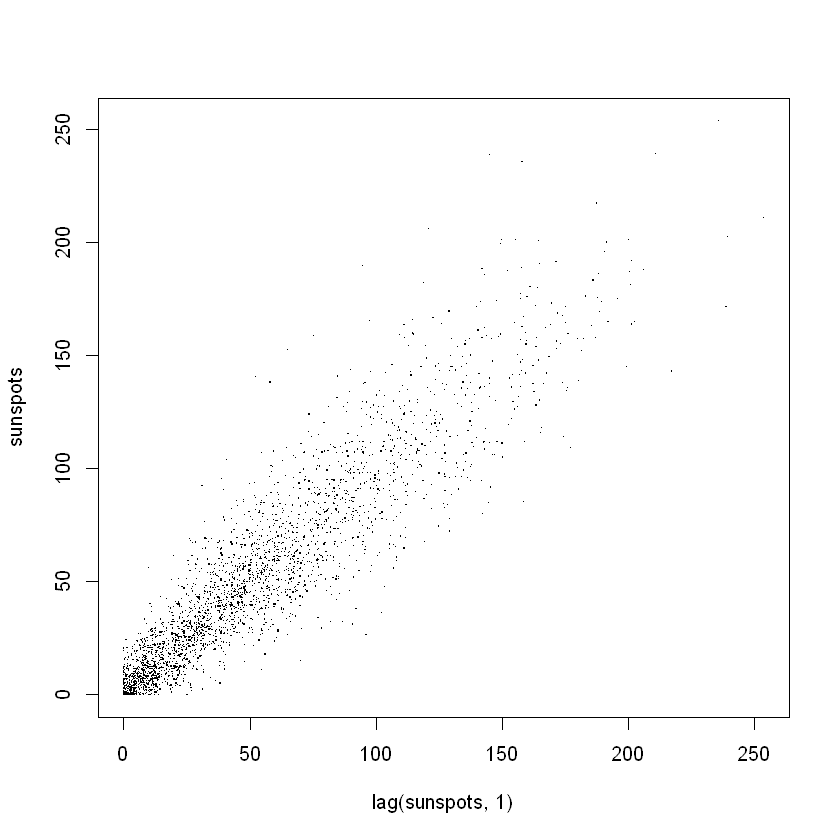

In [174]:
plot(lag(sunspots, 1), sunspots, pch = ".")

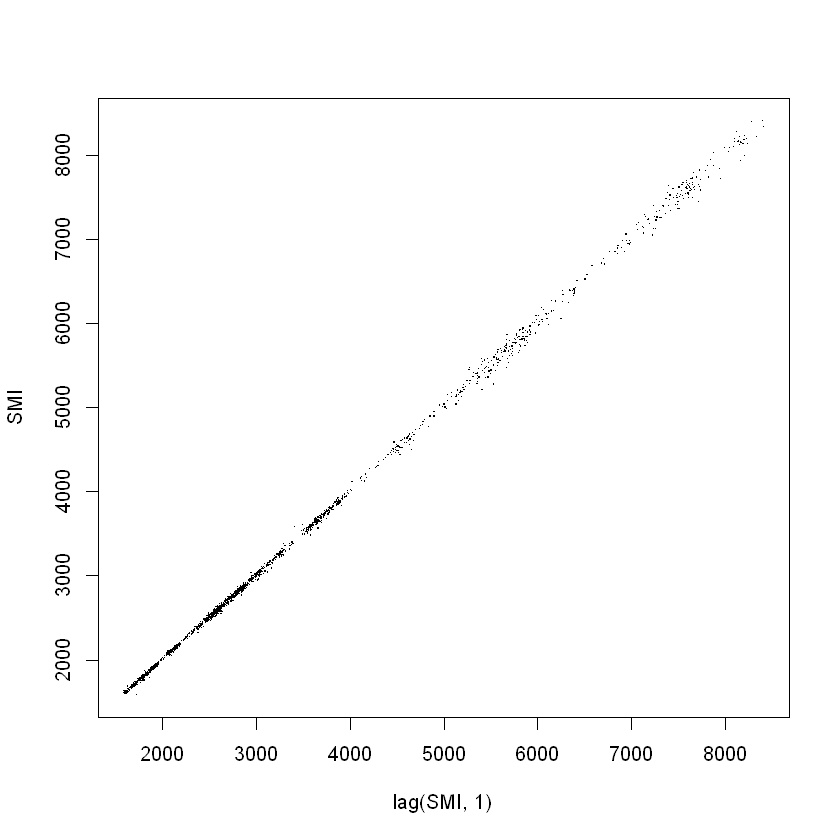

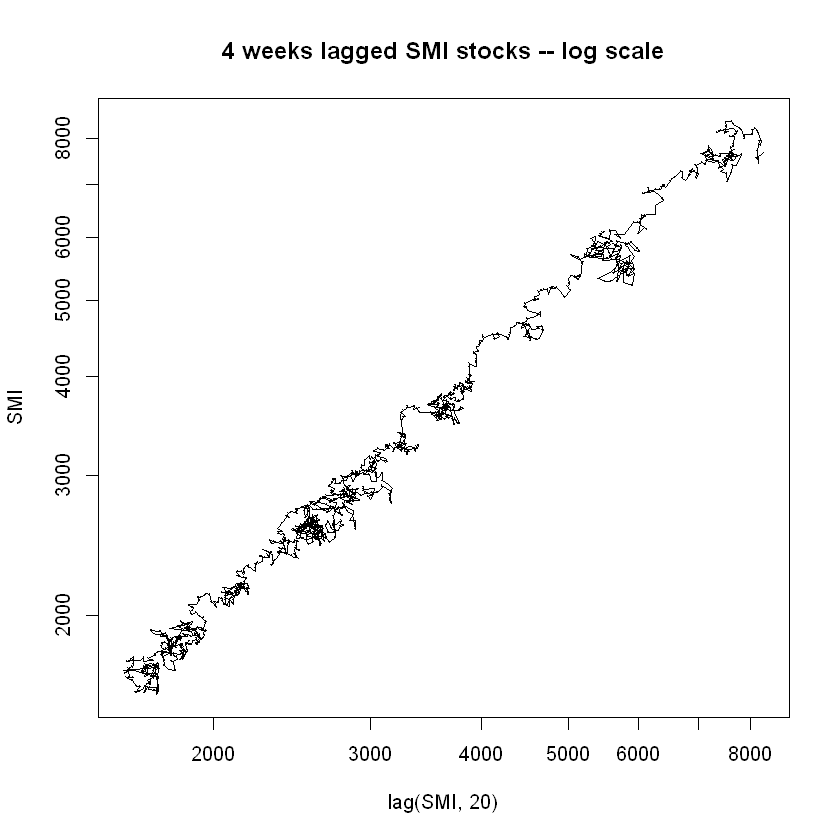

In [175]:
SMI <- EuStockMarkets[, "SMI"]
plot(lag(SMI,  1), SMI, pch = ".")
plot(lag(SMI, 20), SMI, pch = ".", log = "xy",
     main = "4 weeks lagged SMI stocks -- log scale", xy.lines =  TRUE)